In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from cohd_helpers.cohd_requests import *
from cohd_helpers.cohd_temporal_analysis import *

### Options

In [2]:
# Pandas display options
pd.options.display.max_colwidth = 255
pd.options.display.max_rows = 50

# Wider notebook display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# View COHD metadata

### Get descriptions of the datasets

In [3]:
_, df = datasets()
display(df)

dataset_description  \
0                  Clinical data from 2013-2017. Each concept's count reflects the use of that specific concept.   
1  Clinical data from all years in the database. Each concept's count reflects the use of that specific concept.   
2       Clinical data from 2013-2017. Each concept's count includes use of that concept and descendant concepts.   
3                                       Beta data set capturing temporal relationships between pairs of concepts   

   dataset_id               dataset_name  temporal  
0           1    5-year non-hierarchical         0  
1           2  Lifetime non-hierarchical         0  
2           3        5-year hierarchical         0  
3           4              Temporal beta         1

### Get the number of concepts in each domain for the 5-year dataset

In [4]:
_, df = domain_counts(dataset_id=1)
display(df)

dataset_id     domain_id  count
0           1     Condition  10159
1           1        Device    170
2           1          Drug  10264
3           1     Ethnicity      2
4           1        Gender      4
5           1   Measurement    188
6           1   Observation    870
7           1     Procedure   8270
8           1          Race     32
9           1  Relationship      5

### Get the number of concepts in each pair of domains for the lifetime dataset

In [5]:
_, df = domain_pair_counts(dataset_id=2)
display(df)

dataset_id  domain_id_1   domain_id_2    count
0            2    Condition     Condition  4558391
1            2    Condition        Device    51651
2            2    Condition          Drug  8384345
3            2    Condition     Ethnicity    17135
4            2    Condition        Gender    20438
5            2    Condition   Measurement   282893
6            2    Condition   Observation   725341
7            2    Condition     Procedure  5359461
8            2    Condition          Race    29851
9            2    Condition  Relationship      134
10           2       Device        Device      588
11           2       Device          Drug    45589
12           2       Device     Ethnicity      263
13           2       Device        Gender      343
14           2       Device   Measurement     1881
15           2       Device   Observation     5672
16           2       Device     Procedure    35631
17           2       Device          Race      316
18           2         Drug          Drug  4465396
19           2         Drug     Ethnicity    16984
20           2         Drug        Gender    20558
21           2         Drug   Measurement   278313
22           2         Drug   Observation   712097
23           2         Drug     Procedure  5223373
24           2         Drug          Race    26680
25           2         Drug  Relationship      132
26           2    Ethnicity        Gender        8
27           2    Ethnicity   Measurement      382
28           2    Ethnicity   Observation     1305
29           2    Ethnicity     Procedure    13121
30           2    Ethnicity          Race       44
31           2    Ethnicity  Relationship        3
32           2       Gender   Measurement      407
33           2       Gender   Observation     1613
34           2       Gender     Procedure    17049
35           2       Gender          Race       58
36           2       Gender  Relationship        8
37           2  Measurement   Measurement     5421
38           2  Measurement   Observation    24619
39           2  Measurement     Procedure   174390
40           2  Measurement          Race      901
41           2  Measurement  Relationship       15
42           2  Observation   Observation    34883
43           2  Observation     Procedure   466832
44           2  Observation          Race     2383
45           2  Observation  Relationship       57
46           2    Procedure     Procedure  1761248
47           2    Procedure          Race    20606
48           2    Procedure  Relationship       89
49           2         Race  Relationship        3

### Get the number of patients in the default dataset (5-year dataset)

In [6]:
_, df = patient_count()
display(df)

dataset_id    count
0           1  1790431

# OMOP Functions

### Look up the definitions of a few concepts

In [7]:
concept_id_1 = 313217 # Atrial fibrillation
concept_id_2 = 192855 # Cancer in situ of urinary bladder
concept_id_3 = 2008271 # Injection or infusion of cancer chemotherapeutic substance
concept_ids = [concept_id_1, concept_id_2, concept_id_3]
_, df = concept(concept_ids)
display(df)

concept_id                                                concept_name  \
0      192855                           Cancer in situ of urinary bladder   
1      313217                                         Atrial fibrillation   
2     2008271  Injection or infusion of cancer chemotherapeutic substance   

   domain_id    concept_class_id vocabulary_id concept_code  
0  Condition    Clinical Finding        SNOMED     92546004  
1  Condition    Clinical Finding        SNOMED     49436004  
2  Procedure  4-dig billing code      ICD9Proc        99.25

### Find concepts

Find ibuprofen drug concepts that have at least 1 count in the 5-year hierarchical dataset

In [8]:
_, df = find_concept('ibuprofen', domain='Drug', min_count=1, dataset_id=3)
display(df)

concept_id  \
0     21604049   
1      1177480   
2     21603980   
3     40054158   
4     19081499   
5     19019073   
6     19019072   
7      1177740   
8     40054148   
9     19019050   
10    19081495   
11    19081500   
12    19019074   
13    19081496   
14    19078461   
15    19033921   
16    19026061   
17    19033719   
18    19033893   
19    19016761   
20    40054144   
21    19078440   
22    19033925   
23     1177822   
24    19027494   
..         ...   
51    40173381   
52    40164717   
53    40164707   
54    19081498   
55     1177844   
56    42628868   
57    35604183   
58    40161246   
59    19080093   
60    40161247   
61     1177831   
62    40164704   
63    40161248   
64    40232568   
65    42800825   
66    40164692   
67    19081497   
68    19033824   
69    19019071   
70    40163128   
71    40053094   
72    42800824   
73    40169180   
74    19131976   
75    40053091   

                                                                                  concept_name  \
0                                                                                    ibuprofen   
1                                                                                    Ibuprofen   
2                                                                                 dexibuprofen   
3                                                                        Ibuprofen Oral Tablet   
4                                                                             Ibuprofen 600 MG   
5                                                                 Ibuprofen 600 MG Oral Tablet   
6                                                                 Ibuprofen 400 MG Oral Tablet   
7                                                                             Ibuprofen 400 MG   
8                                                                    Ibuprofen Oral Suspension   
9                                                           Ibuprofen 20 MG/ML Oral Suspension   
10                                                                          Ibuprofen 20 MG/ML   
11                                                                            Ibuprofen 800 MG   
12                                                                Ibuprofen 800 MG Oral Tablet   
13                                                                            Ibuprofen 200 MG   
14                                                                Ibuprofen 200 MG Oral Tablet   
15                                                          Ibuprofen 600 MG Oral Tablet [Ibu]   
16                                                       Ibuprofen 800 MG Oral Tablet [Motrin]   
17                                                  Ibuprofen 20 MG/ML Oral Suspension [Advil]   
18                                                          Ibuprofen 400 MG Oral Tablet [Ibu]   
19                                                        Ibuprofen 200 MG Oral Tablet [Advil]   
20                                                                      Ibuprofen Oral Capsule   
21                                                               Ibuprofen 200 MG Oral Capsule   
22                                                          Ibuprofen 800 MG Oral Tablet [Ibu]   
23                                                 Ibuprofen 20 MG/ML Oral Suspension [Motrin]   
24                                                          Ibuprofen 40 MG/ML Oral Suspension   
..                                                                                         ...   
51   Diphenhydramine Hydrochloride 25 MG / Ibuprofen 200 MG Oral Capsule [Advil PM Liqui Gels]   
52                   Hydrocodone Bitartrate 7.5 MG / Ibuprofen 200 MG Oral Tablet [Vicoprofen]   
53                                  Hydrocodone Bitartrate 5 MG / Ibuprofen 200 MG Oral Tablet   
54                                                                             Ibuprofen 50 MG   
55                           

Find all concepts with 'carcinoma' in the name

In [9]:
_, df = find_concept('carcinoma', min_count=0, dataset_id=3)
display(df)

concept_id  \
0      36716620   
1       4112752   
2       4299417   
3      40486161   
4       4300118   
5       4111921   
6        433435   
7      37396745   
8       4297667   
9       4297668   
10      4298026   
11      4299418   
12       138996   
13      4298028   
14      4291454   
15     40492932   
16        81250   
17      4300557   
18      4294416   
19      4297666   
20      4301427   
21       192577   
22       194611   
23       192581   
24      4252535   
..          ...   
975    35740768   
976    36672302   
977    44501705   
978    44501900   
979    44502921   
980     4120590   
981    44500017   
982      788129   
983    44502262   
984    40485978   
985    44500352   
986     4093956   
987    44801571   
988    36672610   
989    36715788   
990    44499808   
991    44502574   
992     4198862   
993    35740920   
994    36617515   
995    44500975   
996    36673560   
997    43054618   
998     4242674   
999     4245573   

                                                                     concept_name  \
0                                                                       Carcinoma   
1                                                    Basal cell carcinoma of skin   
2                                                    Basal cell carcinoma of face   
3                                                               Carcinoma of face   
4                                                         Squamous cell carcinoma   
5                                                 Squamous cell carcinoma of skin   
6                                                               Carcinoma in situ   
7                                        Squamous cell carcinoma of head and neck   
8                                         Basal cell carcinoma of upper extremity   
9                                            Basal cell carcinoma of truncal skin   
10                                        Squamous cell carcinoma of skin of face   
11                                        Basal cell carcinoma of lower extremity   
12                                                      Carcinoma in situ of skin   
13                             Squamous cell carcinoma of skin of lower extremity   
14                                                   Basal cell carcinoma of nose   
15                                                              Carcinoma of nose   
16                                                    Carcinoma in situ of breast   
17                                       Squamous cell carcinoma of skin of trunk   
18                                                    Basal cell carcinoma of ear   
19                                                   Basal cell carcinoma of neck   
20                                     Squamous cell carcinoma of upper extremity   
21                                      Carcinoma in situ of female genital organ   
22                                            Carcinoma in situ of uterine cervix   
23                                                    Carcinoma in situ of uterus   
24                                                        Adenocarcinoma of liver   
..                                                                            ...   
975                                 Esophageal adenocarcinoma abdominal stage III   
976                                       Urothelial carcinoma urethra metastatic   
977  Papillary squamous cell carcinoma, non-invasive of Posterior wall of bladder   
978                                       Adenosquamous carcinoma of Supraglottis   
979                    Squamous cell carcinoma, keratinizing of Middle lobe, lung   
980                                                    Carcinoma of genital organ   
981                Cribriform carcinoma in situ of Upper-outer quadrant of breast   
982                           Adenoid cystic carcinoma of external auditory canal   
983                                      

### Find concepts using OMOP hierarchy

Find ancestors of atrial fibrillation

In [10]:
concept_id = 313217  # Atrial fibrillation
_, df = concept_ancestors(concept_id, dataset_id=3)
display(df)

ancestor_concept_id  \
0                313217   
1               4226399   
2               4068155   
3               4248028   
4              35202455   
5              44784217   
6              35202454   
7                321588   
8                440142   
9               4103183   
10             37203779   
11              4115390   
12             37202319   
13              4043346   
14             43531056   
15             35202457   
16               134057   
17             37604009   
18             37604032   
19             37602356   
20              4185503   
21             37602360   
22             43531057   
23              4023995   
24             37600000   
25              4227253   
26             37200000   
27             35202051   
28             35200000   
29              4028071   
30              4117930   
31              4180628   
32              4047779   
33              4199402   
34              4274025   
35              4042140   
36             36300000   
37               441840   
38             36302170   
39             36303153   

                                                       concept_name  \
0                                               Atrial fibrillation   
1                                                      Fibrillation   
2                                                 Atrial arrhythmia   
3                                       Supraventricular arrhythmia   
4                                      Supraventricular arrhythmias   
5                                                Cardiac arrhythmia   
6                                     Rate and rhythm disorders NEC   
7                                                     Heart disease   
8                                           Disorder of mediastinum   
9                                                   Cardiac finding   
10                                            Mediastinal disorders   
11                                              Mediastinal finding   
12                        Thoracic disorders (excl lung and pleura)   
13                                               Disorder of thorax   
14                            Disorder of thoracic segment of trunk   
15                                            Cardiac disorders NEC   
16                                Disorder of cardiovascular system   
17        Non-site specific necrosis and vascular insufficiency NEC   
18                         Non-site specific vascular disorders NEC   
19  Arteriosclerosis, stenosis, vascular insufficiency and necrosis   
20                                      Finding of region of thorax   
21                                           Vascular disorders NEC   
22                                           Finding of upper trunk   
23                                           Cardiovascular finding   
24                                               Vascular disorders   
25                                         Viscus structure finding   
26                  Respiratory, thoracic and mediastinal disorders   
27                              Cardiac disorder signs and symptoms   
28                                                Cardiac disorders   
29                                                Disorder of trunk   
30                                       Finding of trunk structure   
31                                          Disorder of body system   
32                                            Disorder by body site   
33                                           Finding of body region   
34                                                          Disease   
35                                                  Finding by site   
36                                                   Investigations   
37                                                 Clinical finding   
38        Investigations, imaging and histopathology procedures NEC   
39                                               Investi

Find the ingredient concept for a drug

In [11]:
concept_id = 19019073  # Ibuprofen 600 MG Oral Tablet
_, df = concept_ancestors(concept_id, concept_class_id='Ingredient', dataset_id=3)
display(df)

ancestor_concept_id concept_name domain_id vocabulary_id concept_class_id  \
0              1177480    Ibuprofen      Drug        RxNorm       Ingredient   

  concept_code standard_concept  concept_count  max_levels_of_separation  \
0         5640                S         233514                         2   

   min_levels_of_separation  
0                         2

Find motor neuron diseases

In [12]:
concept_id = 36703510  # Motor neurone diseases (MedDRA)
_, df = concept_descendants(concept_id, dataset_id=3)
display(df)

descendant_concept_id                     concept_name  domain_id  \
0                  374631             Motor neuron disease  Condition   
1                36703510           Motor neurone diseases  Condition   
2                  373182    Amyotrophic lateral sclerosis  Condition   
3                 4223843       Lower motor neuron disease  Condition   
4                 4172436  Hereditary motor neuron disease  Condition   
5                  372605          Spinal muscular atrophy  Condition   
6                  376679     Progressive muscular atrophy  Condition   
7                 4317965       Upper motor neuron disease  Condition   
8                  381275       Anterior horn cell disease  Condition   
9                  374634       Kugelberg-Welander disease  Condition   
10                 436684         Progressive bulbar palsy  Condition   
11                 372616         Werdnig-Hoffmann disease  Condition   
12                4150511      Post poliomyelitis syndrome  Condition   
13                 381003        Primary lateral sclerosis  Condition   
14                 373190               Pseudobulbar palsy  Condition   

   vocabulary_id  concept_class_id concept_code standard_concept  \
0         SNOMED  Clinical Finding     37340000                S   
1         MedDRA               HLT     10028004                C   
2         SNOMED  Clinical Finding     86044005                S   
3         SNOMED  Clinical Finding     84590007                S   
4         SNOMED  Clinical Finding     49793008                S   
5         SNOMED  Clinical Finding      5262007                S   
6         SNOMED  Clinical Finding     88923002                S   
7         SNOMED  Clinical Finding     95647008                S   
8         SNOMED  Clinical Finding     85672005                S   
9         SNOMED  Clinical Finding     54280009                S   
10        SNOMED  Clinical Finding     54304004                S   
11        SNOMED  Clinical Finding     64383006                S   
12        SNOMED  Clinical Finding     31097004                S   
13        SNOMED  Clinical Finding     81211007                S   
14        SNOMED  Clinical Finding      7379000                S   

    concept_count  max_levels_of_separation  min_levels_of_separation  
0            2572                         1                         1  
1            2440                         0                         0  
2            1361                         2                         1  
3             453                         2                         2  
4             437                         2                         2  
5             386                         3                         1  
6             189                         2                         1  
7             150                         2                         2  
8             137                         3                         1  
9             124                         4                         2  
10             94                         3                         1  
11             94                         4                         2  
12             93                         3                         2  
13             59                         3                         3  
14             12                         3                         3

### Get the list of the vocabularies included in the OMOP database

In [13]:
_, df = vocabularies()
display(df)

vocabulary_id
0               ABMS
1                AMT
2                APC
3                ATC
4               BDPM
5                CDT
6               CIEL
7             Cohort
8      Concept Class
9     Condition Type
10         Cost Type
11              CPT4
12          Currency
13               CVX
14        Death Type
15       Device Type
16              dm+d
17            Domain
18               DPD
19               DRG
20         Drug Type
21        EphMRA ATC
22         Ethnicity
23         GCN_SEQNO
24            Gender
..               ...
48   Obs Period Type
49  Observation Type
50             OPCS4
51             OXMIS
52           PCORNet
53  Place of Service
54               PPI
55    Procedure Type
56              Race
57              Read
58      Relationship
59      Revenue Code
60            RxNorm
61  RxNorm Extension
62               SMQ
63            SNOMED
64         Specialty
65     Specimen Type
66               SPL
67              UCUM
68          VA Class
69        VA Product
70             Visit
71        Visit Type
72        Vocabulary

[73 rows x 1 columns]

### Map a vocabulary concept code (ICD9CM 715.3) to the OMOP standard concept ID
http://www.icd9data.com/2012/Volume1/710-739/710-719/715/715.3.htm

In [14]:
_, df = map_to_standard_concept_id(concept_code='715.3', vocabulary_id='ICD9CM')
display(df)

source_concept_code  source_concept_id  \
0               715.3           44834979   

                                                     source_concept_name  \
0  Osteoarthrosis, localized, not specified whether primary or secondary   

  source_vocabulary_id standard_concept_code  standard_concept_id  \
0               ICD9CM              90860001                72990   

                                        standard_concept_name  \
0  Localized osteoarthrosis uncertain if primary OR secondary   

  standard_domain_id standard_vocabulary_id  
0          Condition                 SNOMED

### Reverse-map from an OMOP standard concept ID to the other vocabularies in OMOP

In [15]:
concept_id = 72990 # Localized osteoarthrosis uncertain if primary OR secondary
_, df = map_from_standard_concept_id(concept_id)
display(df)

concept_id  \
0     45930832   
1     44834979   
2     44828036   
3     44821125   
4     44829196   
5     44828037   
6     44825680   
7     44826869   
8     44836174   
9     44833812   
10    44837335   
11       72990   

                                                                                      concept_name  \
0                                       Localized Osteoarthrosis Uncertain If Primary or Secondary   
1                            Osteoarthrosis, localized, not specified whether primary or secondary   
2          Osteoarthrosis, localized, not specified whether primary or secondary, site unspecified   
3           Osteoarthrosis, localized, not specified whether primary or secondary, shoulder region   
4                 Osteoarthrosis, localized, not specified whether primary or secondary, upper arm   
5                   Osteoarthrosis, localized, not specified whether primary or secondary, forearm   
6                      Osteoarthrosis, localized, not specified whether primary or secondary, hand   
7   Osteoarthrosis, localized, not specified whether primary or secondary, pelvic region and thigh   
8                 Osteoarthrosis, localized, not specified whether primary or secondary, lower leg   
9            Osteoarthrosis, localized, not specified whether primary or secondary, ankle and foot   
10    Osteoarthrosis, localized, not specified whether primary or secondary, other specified sites   
11                                      Localized osteoarthrosis uncertain if primary OR secondary   

    domain_id    concept_class_id vocabulary_id concept_code standard_concept  
0   Condition           Diagnosis          CIEL       116253             None  
1   Condition  4-dig nonbill code        ICD9CM        715.3             None  
2   Condition  5-dig billing code        ICD9CM       715.30             None  
3   Condition  5-dig billing code        ICD9CM       715.31             None  
4   Condition  5-dig billing code        ICD9CM       715.32             None  
5   Condition  5-dig billing code        ICD9CM       715.33             None  
6   Condition  5-dig billing code        ICD9CM       715.34             None  
7   Condition  5-dig billing code        ICD9CM       715.35             None  
8   Condition  5-dig billing code        ICD9CM       715.36             None  
9   Condition  5-dig billing code        ICD9CM       715.37             None  
10  Condition  5-dig billing code        ICD9CM       715.38             None  
11  Condition    Clinical Finding        SNOMED     90860001                S

### Cross-reference a concept from an external ontology to OMOP standard concept IDs using OxO
http://disease-ontology.org/term/DOID%3A8398/

In [16]:
curie = 'DOID:8398' # osteoarthritis
_, df = xref_to_omop(curie, distance=2)
display(df)

source_oxo_id source_oxo_label intermediate_oxo_id  \
0      DOID:8398   osteoarthritis  SNOMEDCT:396275006   
1      DOID:8398   osteoarthritis       UMLS:C0157946   
2      DOID:8398   osteoarthritis        ICD9CM:715.3   
3      DOID:8398   osteoarthritis        MeSH:D010003   
4      DOID:8398   osteoarthritis         ICD10CM:M15   
5      DOID:8398   osteoarthritis       UMLS:C0086743   
6      DOID:8398   osteoarthritis       UMLS:C0086743   
7      DOID:8398   osteoarthritis       UMLS:C0029408   
8      DOID:8398   osteoarthritis       UMLS:C0029408   
9      DOID:8398   osteoarthritis       UMLS:C0029408   
10     DOID:8398   osteoarthritis       UMLS:C0029408   
11     DOID:8398   osteoarthritis         ICD10CM:M19   
12     DOID:8398   osteoarthritis       UMLS:C0409959   
13     DOID:8398   osteoarthritis       UMLS:C0409959   
14     DOID:8398   osteoarthritis       UMLS:C0409959   

                                                   intermediate_oxo_label  \
0                                                          Osteoarthritis   
1   Osteoarthrosis, localized, not specified whether primary or secondary   
2                                                                           
3                                                          Osteoarthritis   
4                                                                           
5                                                Osteoarthrosis Deformans   
6                                                Osteoarthrosis Deformans   
7                                                          Osteoarthritis   
8                                                          Osteoarthritis   
9                                                          Osteoarthritis   
10                                                         Osteoarthritis   
11                                                                          
12                                                   Osteoarthritis, Knee   
13                                                   Osteoarthritis, Knee   
14                                                   Osteoarthritis, Knee   

    omop_standard_concept_id  \
0                      80180   
1                   36569338   
2                      72990   
3                    4025957   
4                      80180   
5                   36569386   
6                    4110738   
7                   36516824   
8                    4344441   
9                      80180   
10                  45884766   
11                     80180   
12                  36569323   
13                   4268196   
14                   4079750   

                                                        omop_concept_name  \
0                                                          Osteoarthritis   
1   Osteoarthrosis, localized, not specified whether primary or secondary   
2              Localized osteoarthrosis uncertain if primary OR secondary   
3                                              Degenerative polyarthritis   
4                                                          Osteoarthritis   
5                                                Osteoarthritis deformans   
6                                                Osteoarthritis deformans   
7                                                          Osteoarthritis   
8                                                          Osteoarthritis   
9                                                          Osteoarthritis   
10                                                         Osteoarthritis   
11                                                         Osteoarthritis   
12                                                   Osteoarthritis knees   
13                                                   Osteoarthritis, Knee   
14                                                 Osteoarthritis of knee   

   omop_domain_id  omop_distance  total_distance  
0       Condition              0               2  
1       C

### Cross-reference from OMOP standard concept IDs to external ontologies using OxO

Cross-reference only to Disease Ontology

In [17]:
concept_id = 72990 # Localized osteoarthrosis uncertain if primary OR secondary
_, df = xref_from_omop(concept_id, mapping_targets='DOID', distance=2)
display(df)

source_omop_concept_id  \
0                   72990   

                                     source_omop_concept_name  \
0  Localized osteoarthrosis uncertain if primary OR secondary   

  source_omop_vocabulary_id source_omop_concept_code  \
0                    SNOMED                 90860001   

   intermediate_omop_concept_id  \
0                      44834979   

                                          intermediate_omop_concept_name  \
0  Osteoarthrosis, localized, not specified whether primary or secondary   

  intermediate_omop_vocabulary_id intermediate_omop_concept_code  \
0                          ICD9CM                          715.3   

  intermediate_oxo_curie intermediate_oxo_label target_curie    target_label  \
0           ICD9CM:715.3                           DOID:8398  osteoarthritis   

   omop_distance  oxo_distance  total_distance  
0              1             1               2

Cross-reference to all available ontologies

In [18]:
concept_id = 72990 # Localized osteoarthrosis uncertain if primary OR secondary
_, df = xref_from_omop(concept_id, mapping_targets=None, distance=2)
display(df)

source_omop_concept_id  \
0                    72990   
1                    72990   
2                    72990   
3                    72990   
4                    72990   
5                    72990   
6                    72990   
7                    72990   
8                    72990   
9                    72990   
10                   72990   
11                   72990   
12                   72990   
13                   72990   
14                   72990   
15                   72990   
16                   72990   
17                   72990   
18                   72990   
19                   72990   
20                   72990   
21                   72990   
22                   72990   
23                   72990   
24                   72990   
25                   72990   
26                   72990   
27                   72990   
28                   72990   
29                   72990   
30                   72990   
31                   72990   
32                   72990   
33                   72990   
34                   72990   
35                   72990   
36                   72990   
37                   72990   
38                   72990   

                                      source_omop_concept_name  \
0   Localized osteoarthrosis uncertain if primary OR secondary   
1   Localized osteoarthrosis uncertain if primary OR secondary   
2   Localized osteoarthrosis uncertain if primary OR secondary   
3   Localized osteoarthrosis uncertain if primary OR secondary   
4   Localized osteoarthrosis uncertain if primary OR secondary   
5   Localized osteoarthrosis uncertain if primary OR secondary   
6   Localized osteoarthrosis uncertain if primary OR secondary   
7   Localized osteoarthrosis uncertain if primary OR secondary   
8   Localized osteoarthrosis uncertain if primary OR secondary   
9   Localized osteoarthrosis uncertain if primary OR secondary   
10  Localized osteoarthrosis uncertain if primary OR secondary   
11  Localized osteoarthrosis uncertain if primary OR secondary   
12  Localized osteoarthrosis uncertain if primary OR secondary   
13  Localized osteoarthrosis uncertain if primary OR secondary   
14  Localized osteoarthrosis uncertain if primary OR secondary   
15  Localized osteoarthrosis uncertain if primary OR secondary   
16  Localized osteoarthrosis uncertain if primary OR secondary   
17  Localized osteoarthrosis uncertain if primary OR secondary   
18  Localized osteoarthrosis uncertain if primary OR secondary   
19  Localized osteoarthrosis uncertain if primary OR secondary   
20  Localized osteoarthrosis uncertain if primary OR secondary   
21  Localized osteoarthrosis uncertain if primary OR secondary   
22  Localized osteoarthrosis uncertain if primary OR secondary   
23  Localized osteoarthrosis uncertain if primary OR secondary   
24  Localized osteoarthrosis uncertain if primary OR secondary   
25  Localized osteoarthrosis uncertain if primary OR secondary   
26  Localized osteoarthrosis uncertain if primary OR secondary   
27  Localized osteoarthrosis uncertain if primary OR secondary   
28  Localized osteoarthrosis uncertain if primary OR secondary   
29  Localized osteoarthrosis uncertain if primary OR secondary   
30  Localized osteoarthrosis uncertain if primary OR secondary   
31  Localized osteoarthrosis uncertain if primary OR secondary   
32  Localized osteoarthrosis uncertain if primary OR secondary   
33  Localized osteoarthrosis uncertain if primary OR secondary   
34  Localized osteoarthrosis uncertain if primary OR secondary   
35  Localized osteoarthrosis uncertain if primary OR secondary   
36  Localized osteoarthrosis uncertain if primary OR secondary   
37  Localized osteoarthrosis uncertain if primary OR secondary   
38  Localized osteoarthrosis uncertain if primary OR secondary   

   source_omop_vocabulary_id source_omop_concept_code  \
0                     SNOMED                 90860001   
1                     SNOMED                 908

# Clinical Frequencies

### Get the count and prevalence for atrial fibrillation

In [19]:
concept_id_1 = 313217 # Atrial fibrillation
_, df = concept_frequency([concept_id_1])
display(df)

dataset_id  concept_id  concept_count  concept_frequency
0           1      313217          49452            0.02762

### Get the co-occurrence frequency of *Cancer in situ of urinary bladder* and *Injection or infusion of cancer chemotherapeutic substance*

In [20]:
concept_id_1 = 192855  # Cancer in situ of urinary bladder
concept_id_2 = 2008271 # Injection or infusion of cancer chemotherapeutic substance
_, df = paired_concepts_frequency(concept_id_1, concept_id_2)
display(df)

dataset_id  concept_id_1  concept_id_2  concept_count  concept_frequency
0           1        192855       2008271             10           0.000006

### Get the top 10 most frequent conditions in the 5-year dataset

In [21]:
_, df = most_frequent_concepts(limit=10, domain_id='Condition')
display(df)

concept_class_id  concept_count  concept_frequency  concept_id  \
0  Clinical Finding         233790           0.130577      320128   
1  Clinical Finding         152005           0.084899       77670   
2  Clinical Finding         145367           0.081191      432867   
3  Clinical Finding         124820           0.069715      200219   
4  Clinical Finding         103718           0.057929      312437   
5  Clinical Finding          96902           0.054122    40483107   
6  Clinical Finding          94453           0.052754      254761   
7  Clinical Finding          85041           0.047498      135777   
8  Clinical Finding          80244           0.044818    42872402   
9  Clinical Finding          75524           0.042182      320536   

                                 concept_name  dataset_id  domain_id  \
0                      Essential hypertension           1  Condition   
1                                  Chest pain           1  Condition   
2                              Hyperlipidemia           1  Condition   
3                              Abdominal pain           1  Condition   
4                                     Dyspnea           1  Condition   
5               Inflamed seborrheic keratosis           1  Condition   
6                                       Cough           1  Condition   
7      Neoplasm of uncertain behavior of skin           1  Condition   
8  Coronary arteriosclerosis in native artery           1  Condition   
9                  Electrocardiogram abnormal           1  Condition   

  vocabulary_id  
0        SNOMED  
1        SNOMED  
2        SNOMED  
3        SNOMED  
4        SNOMED  
5        SNOMED  
6        SNOMED  
7        SNOMED  
8        SNOMED  
9        SNOMED

### Get co-occurrence frequencies for all concepts associated with *Cancer in situ of urinary bladder*

In [22]:
concept_id = 192855  # Cancer in situ of urinary bladder
_, df = associated_concepts_freq(concept_id)
display(df)

dataset_id  concept_id  associated_concept_id  \
0             1      192855                2213216   
1             1      192855                4214956   
2             1      192855                 197508   
3             1      192855                2213283   
4             1      192855               40231925   
5             1      192855               19041324   
6             1      192855                2101897   
7             1      192855               35603428   
8             1      192855                2211361   
9             1      192855               19135374   
10            1      192855                2313816   
11            1      192855                2108550   
12            1      192855                   8507   
13            1      192855                   8527   
14            1      192855               35605482   
15            1      192855                2414398   
16            1      192855                2212167   
17            1      192855                 320128   
18            1      192855                2414397   
19            1      192855                2617827   
20            1      192855               38003564   
21            1      192855                2213300   
22            1      192855                2617820   
23            1      192855                2109766   
24            1      192855                2101061   
..          ...         ...                    ...   
743           1      192855               40231805   
744           1      192855                1309992   
745           1      192855                 321319   
746           1      192855                2211351   
747           1      192855                2780477   
748           1      192855                4119971   
749           1      192855               40163535   
750           1      192855               40479553   
751           1      192855                1351153   
752           1      192855               19078344   
753           1      192855                 715940   
754           1      192855                2211516   
755           1      192855                4027342   
756           1      192855               35604694   
757           1      192855                 436096   
758           1      192855                 997899   
759           1      192855               40234553   
760           1      192855                 441408   
761           1      192855                 904549   
762           1      192855               19068781   
763           1      192855                 375545   
764           1      192855               40234727   
765           1      192855                 201633   
766           1      192855               42873441   
767           1      192855               40167261   

                                                                                                                                                                                                                                            associated_concept_name  \
0                                                                                                               Cytopathology, selective cellular enhancement technique with interpretation (eg, liquid based slide preparation method), except cervical or vaginal   
1                                                                                                                                                                                                                            History of clinical finding in subject   
2                                                                                                                                                                                                                                Malignant tumor of urinary bladder   
3    Level IV - Surgical pathology, gross and microscopic examination Abortion - spontaneous/missed Artery, biopsy Bone marrow, biopsy Bone exos

### Get co-occurrence frequencies for all drugs associated with *Atrial fibrillation*

In [23]:
concept_id = 313217  # Atrial Fibrillation
_, df = associated_concept_domain_freq(concept_id, 'Drug')
display(df)

dataset_id  concept_id  associated_concept_id  \
0              1      313217               19041324   
1              1      313217               46275349   
2              1      313217               40240688   
3              1      313217               40220357   
4              1      313217                 938330   
5              1      313217               19073712   
6              1      313217               43011850   
7              1      313217               19059056   
8              1      313217               35605482   
9              1      313217               40231925   
10             1      313217               40167213   
11             1      313217               19077652   
12             1      313217               40231041   
13             1      313217               36249718   
14             1      313217               19077546   
15             1      313217               36249643   
16             1      313217               19123989   
17             1      313217                 957136   
18             1      313217               35603428   
19             1      313217               19072321   
20             1      313217               46275280   
21             1      313217                1113076   
22             1      313217                 968477   
23             1      313217               35603226   
24             1      313217               19073777   
...          ...         ...                    ...   
5101           1      313217                1154080   
5102           1      313217               19004691   
5103           1      313217               40228941   
5104           1      313217               19034074   
5105           1      313217               40243958   
5106           1      313217               19061670   
5107           1      313217               44506604   
5108           1      313217                 718123   
5109           1      313217               40223766   
5110           1      313217                1745073   
5111           1      313217               36250072   
5112           1      313217               40244132   
5113           1      313217               19134063   
5114           1      313217               40171515   
5115           1      313217               40227525   
5116           1      313217                 993601   
5117           1      313217               40228842   
5118           1      313217                1337070   
5119           1      313217               40163990   
5120           1      313217               42902446   
5121           1      313217                1718700   
5122           1      313217                 966706   
5123           1      313217                 712621   
5124           1      313217                 755734   
5125           1      313217                 740910   

                                                                                                                                                                                                                                             associated_concept_name  \
0                                                                                                                                                                                                                         Acetaminophen 325 MG Oral Tablet [Tylenol]   
1     0.5 ML pneumococcal capsular polysaccharide type 1 vaccine 0.05 MG/ML / pneumococcal capsular polysaccharide type 10A vaccine 0.05 MG/ML / pneumococcal capsular polysaccharide type 11A vaccine 0.05 MG/ML / pneumococcal capsular polysaccharide type 12F...   
2                                                                                                                                                                                                                                Docusate Sodium 100 MG Oral Capsule   
3                                                                                        

# Concept Associations

### Chi-square analysis

Chi-square between *Cancer in situ of urinary bladder* and *Chronic cystitis*

In [24]:
concept_id_1 = 192855 # Cancer in situ of urinary bladder
concept_id_2 = 201621 # Chronic cystitis 
_, df = chi_square(concept_id_1, concept_id_2)
display(df)

chi_square  concept_id_1  concept_id_2  dataset_id        n  n_c1  \
0  69175.79029        192855        201621           1  1790431   368   

   n_c1_c2  n_c1_~c2  n_c2  n_~c1_c2  n_~c1_~c2  p-value  
0      135       233  1278      1143    1788920      0.0

Chi-square between *Cancer in situ of urinary bladder* and all co-occurring procedures

In [25]:
concept_id_1 = 192855 # Cancer in situ of urinary bladder
_, df = chi_square(concept_id_1, concept_id_2=None, domain_id='Procedure')
display(df)

chi_square concept_2_domain  \
0    276369.928372        Procedure   
1    260662.771610        Procedure   
2    228508.393671        Procedure   
3    224853.205932        Procedure   
4    147630.739632        Procedure   
5    146901.390972        Procedure   
6    113626.369982        Procedure   
7     81575.593320        Procedure   
8     80380.363497        Procedure   
9     54012.500725        Procedure   
10    53477.321028        Procedure   
11    49853.554570        Procedure   
12    47253.060892        Procedure   
13    36702.767755        Procedure   
14    35266.323165        Procedure   
15    30970.788773        Procedure   
16    28516.829735        Procedure   
17    24178.599268        Procedure   
18    19843.268591        Procedure   
19    16579.013591        Procedure   
20    14885.916012        Procedure   
21    14478.254278        Procedure   
22    13475.178215        Procedure   
23    12936.609828        Procedure   
24    12697.398284        Procedure   
..             ...              ...   
134      17.474344        Procedure   
135      17.240728        Procedure   
136      14.959901        Procedure   
137      14.148457        Procedure   
138      13.297247        Procedure   
139      12.225526        Procedure   
140       9.912132        Procedure   
141       8.204388        Procedure   
142       7.255857        Procedure   
143       6.974037        Procedure   
144       5.779652        Procedure   
145       5.347532        Procedure   
146       5.300279        Procedure   
147       4.734129        Procedure   
148       1.544322        Procedure   
149       1.240108        Procedure   
150       1.125351        Procedure   
151       0.578208        Procedure   
152       0.379199        Procedure   
153       0.236309        Procedure   
154       0.185507        Procedure   
155       0.090269        Procedure   
156       0.090111        Procedure   
157       0.078443        Procedure   
158       0.044850        Procedure   

                                                                                                                                                                                                                                                     concept_2_name  \
0                                                                                                                                                                                         Bladder instillation of anticarcinogenic agent (including retention time)   
1                                                                                                                                                Anesthesia for transurethral procedures (including urethrocystoscopy); transurethral resection of bladder tumor(s)   
2                                                                                                            Cystourethroscopy, with fulguration (including cryosurgery or laser surgery) or treatment of MINOR (less than 0.5 cm) lesion(s) with or without biopsy   
3                                                                                                                                                                                                                          Closed [transurethral] biopsy of bladder   
4                                                                                                                                                                                        Other transurethral excision or destruction of lesion or tissue of bladder   
5                                                                                                                         Cystourethroscopy, with fulguration (including cryosurgery or laser surgery) and/or resection of; MEDIUM bladder tumor(s) (2.0 to 5.0 cm)   
6                                                                                                                                         

### Observed-Expected Ratio

Observed-expected ratio between *Cancer in situ of urinary bladder* and *Chronic cystitis*

In [26]:
concept_id_1 = 192855  # Cancer in situ of urinary bladder
concept_id_2 = 201621 # Chronic cystitis 
_, df = obs_exp_ratio(concept_id_1, concept_id_2)
display(df)

dataset_id  concept_id_1  concept_id_2  observed_count  expected_count  \
0           1        192855        201621             135        0.262676   

   ln_ratio  
0  6.242107

Observed-expected ratio between *Cancer in situ of urinary bladder* and all co-occurring procedures

In [27]:
concept_id_1 = 192855  # Cancer in situ of urinary bladder
_, df = obs_exp_ratio(concept_id_1, concept_id_2=None, domain_id='Procedure')
display(df)

dataset_id  concept_id_1  concept_id_2  \
0             1        192855       2003784   
1             1        192855       2003805   
2             1        192855       2109736   
3             1        192855       2003703   
4             1        192855       2109723   
5             1        192855       2776775   
6             1        192855       2109724   
7             1        192855       2110037   
8             1        192855       2109773   
9             1        192855       2109775   
10            1        192855       2101020   
11            1        192855       2003684   
12            1        192855       2101062   
13            1        192855       2003789   
14            1        192855       2109774   
15            1        192855       2109639   
16            1        192855       2109818   
17            1        192855       2109776   
18            1        192855       2109823   
19            1        192855       2108489   
20            1        192855       2780477   
21            1        192855       2109771   
22            1        192855       2109815   
23            1        192855       2211561   
24            1        192855       2101061   
..          ...           ...           ...   
134           1        192855       2514406   
135           1        192855       4175226   
136           1        192855       4145333   
137           1        192855       2313879   
138           1        192855       4064522   
139           1        192855       2414391   
140           1        192855       2514437   
141           1        192855       2213282   
142           1        192855       2314213   
143           1        192855       2514417   
144           1        192855       2314215   
145           1        192855       2514414   
146           1        192855       2211351   
147           1        192855       2414392   
148           1        192855       2211327   
149           1        192855       2213418   
150           1        192855       2514413   
151           1        192855       2617289   
152           1        192855       2313881   
153           1        192855       4147961   
154           1        192855       2211740   
155           1        192855       2002178   
156           1        192855       2008285   
157           1        192855       2514436   
158           1        192855       2514435   

                                                                                                                                                                                                                                                     concept_2_name  \
0                                                                                                                                                                                                                          Closed [transurethral] biopsy of bladder   
1                                                                                                                                                                                                                                                Radical cystectomy   
2                                                                                                                                                                                         Bladder instillation of anticarcinogenic agent (including retention time)   
3                                                                                                                                                                                                                          Formation of cutaneous uretero-ileostomy   
4                                                            Cystectomy, complete, with ureteroileal conduit or sigmoid bladder, including intestine anastomosis; with bilateral pelvic lymphadenectomy, including external iliac, hypogastric, and o

### Relative Frequency

Drugs where atrial fibrillation has high conditional probability, given the drug. 

In [28]:
concept_id_1 = 313217 # Atrial fibrillation
_, df = relative_frequency(concept_id_1, concept_id_2=None, domain_id='Drug')
display(df)

dataset_id  concept_id_1  concept_id_2  \
0              1        313217      35602988   
1              1        313217      40163617   
2              1        313217      40228161   
3              1        313217      35606572   
4              1        313217      40169055   
5              1        313217      46234258   
6              1        313217      19102896   
7              1        313217       1328556   
8              1        313217       1310149   
9              1        313217       1594704   
10             1        313217      40165145   
11             1        313217      19133832   
12             1        313217      19003514   
13             1        313217      19076704   
14             1        313217      42629595   
15             1        313217      19037567   
16             1        313217       1594702   
17             1        313217      19133981   
18             1        313217      19071455   
19             1        313217      42629597   
20             1        313217      42629599   
21             1        313217      40163992   
22             1        313217       1310038   
23             1        313217      40228154   
24             1        313217       1719039   
...          ...           ...           ...   
5101           1        313217      40243299   
5102           1        313217      40222954   
5103           1        313217      42902232   
5104           1        313217      19128022   
5105           1        313217      43531984   
5106           1        313217      19123605   
5107           1        313217      19041196   
5108           1        313217      40222483   
5109           1        313217       1760056   
5110           1        313217      19070310   
5111           1        313217      19133478   
5112           1        313217      19127938   
5113           1        313217      40232436   
5114           1        313217      19041658   
5115           1        313217      40228203   
5116           1        313217      19129472   
5117           1        313217      42902170   
5118           1        313217      46275242   
5119           1        313217      42709097   
5120           1        313217      19019050   
5121           1        313217      19044785   
5122           1        313217      19073186   
5123           1        313217       1796475   
5124           1        313217      40228842   
5125           1        313217      19044757   

                                                                                                                                                                                                                                                      concept_2_name  \
0                                                                                                                                                                                                                   50 ML idarucizumab 50 MG/ML Injection [Praxbind]   
1                                                                                                                                                                                                                                     dronedarone 400 MG Oral Tablet   
2                                                                                                                                                                                                                            dabigatran etexilate 75 MG Oral Capsule   
3                                                                                                                                                                                                                     5 ML Dopamine Hydrochloride 80 MG/ML Injection   
4                                                                                                                                                                                            

Conditions where albuterol has high conditional probability, given the condition. 

In [29]:
concept_id_1 = 19123989 # Albuterol 0.83 MG/ML Inhalant Solution
_, df = relative_frequency(concept_id_1, concept_id_2=None, domain_id='Condition')
display(df)

dataset_id  concept_id_1  concept_id_2  \
0              1      19123989      45757247   
1              1      19123989        432830   
2              1      19123989       4055640   
3              1      19123989      45769443   
4              1      19123989       4112521   
5              1      19123989       4055481   
6              1      19123989        196271   
7              1      19123989       4308589   
8              1      19123989       4221119   
9              1      19123989      45769352   
10             1      19123989        201441   
11             1      19123989      37116369   
12             1      19123989      45773005   
13             1      19123989        439836   
14             1      19123989        380688   
15             1      19123989      40493415   
16             1      19123989       4055650   
17             1      19123989      40481763   
18             1      19123989      45769351   
19             1      19123989        439857   
20             1      19123989        258180   
21             1      19123989      46271074   
22             1      19123989        260754   
23             1      19123989       4195014   
24             1      19123989       4138760   
...          ...           ...           ...   
6108           1      19123989       4162993   
6109           1      19123989        201909   
6110           1      19123989       4299417   
6111           1      19123989       4297666   
6112           1      19123989        138389   
6113           1      19123989        140966   
6114           1      19123989       4291454   
6115           1      19123989       4221679   
6116           1      19123989        444445   
6117           1      19123989        137813   
6118           1      19123989       4299418   
6119           1      19123989        133713   
6120           1      19123989       4294416   
6121           1      19123989       4297668   
6122           1      19123989       4115282   
6123           1      19123989        138181   
6124           1      19123989       4297667   
6125           1      19123989       4335883   
6126           1      19123989      40483107   
6127           1      19123989        136057   
6128           1      19123989        434896   
6129           1      19123989       4031763   
6130           1      19123989       4033837   
6131           1      19123989       4033839   
6132           1      19123989        133726   

                                                             concept_2_name  \
0                                                    Gastrostomy hemorrhage   
1                                                               Zygomycosis   
2                            Lung disease with systemic lupus erythematosus   
3                             Acute severe exacerbation of intrinsic asthma   
4                                        Acute bronchitis due to rhinovirus   
5                  Acute pulmonary insufficiency following thoracic surgery   
6        Injury of retroperitoneum without open wound into abdominal cavity   
7                                                 Leakage of cardiac device   
8                                                   Tracheostomy hemorrhage   
9                       Acute severe exacerbation of mild persistent asthma   
10                      Traumatic hemothorax without open wound into thorax   
11    Acute lung injury during and/or after administration of blood product   
12                                   Acute exacerbation of intrinsic asthma   
13                                       Atheromatous embolus of upper limb   
14                                                        Hypoglycemic coma   
15                                                   Sepsis due to Serratia   
16              Acute pulmonary insufficiency following nonthoracic surgery   
17                       Acute exacerbation of chronic asthmatic bronchitis   
18      

### Retrieve concept association scores for a list of pairs of UMLS CUIs

In [30]:
cui_list = [
    ('UMLS:C0085580', 'UMLS:C0020473'),
    ('UMLS:C0008031', 'UMLS:C0013404'),
    ('UMLS:C3472163', 'UMLS:C0494290')
    ]

df_results = pd.DataFrame(columns=['CUI 1', 'UMLS label 1', 'OMOP ID 1', 'OMOP name 1', 'CUI 2', 'UMLS label 2', 'OMOP ID 2', 'OMOP name 2', 'observed count', 'expected count', 'ln ratio'])
for i in range(len(cui_list)):
    # Map from UMLS CUI to OMOP
    cui_1 = cui_list[i][0]
    cui_2 = cui_list[i][1]
    _, df_xref_results_1 = xref_to_omop(cui_1, distance=2, local=True, recommend=True)
    _, df_xref_results_2 = xref_to_omop(cui_2, distance=2, local=True, recommend=True)
    omop_id_1 = df_xref_results_1.loc[0, 'omop_standard_concept_id']
    omop_id_2 = df_xref_results_2.loc[0, 'omop_standard_concept_id']
    
    # Get info on concepts
    results = {
        'CUI 1': cui_1,
        'UMLS label 1': df_xref_results_1['source_oxo_label'][0], 
        'OMOP ID 1': omop_id_1, 
        'OMOP name 1': df_xref_results_1['omop_concept_name'][0], 
        'CUI 2': cui_2, 
        'UMLS label 2': df_xref_results_2['source_oxo_label'][0], 
        'OMOP ID 2': omop_id_2, 
        'OMOP name 2': df_xref_results_2['omop_concept_name'][0], 
        'observed count': np.nan,
        'expected count': np.nan,
        'ln ratio': np.nan,
    }
    
    # Get observed-expected frequency ratio from hierarchical data set (dataset_id=3)
    _, df_oer = obs_exp_ratio(omop_id_1, omop_id_2, dataset_id=3)
    observed_count = np.nan
    expected_count = np.nan
    ln_ratio = np.nan
    if len(df_oer) > 0:
        results['observed count'] = df_oer['observed_count'][0]
        results['expected count'] = df_oer['expected_count'][0]
        results['ln ratio'] = df_oer['ln_ratio'][0]
    
    # Add to results table
    df_results = df_results.append(results, ignore_index=True)
    
display(df_results)

CUI 1                                UMLS label 1 OMOP ID 1  \
0  UMLS:C0085580           Essential hypertension (disorder)    320128   
1  UMLS:C0008031                                  Chest Pain     77670   
2  UMLS:C3472163  Coronary arteriosclerosis in native artery  42872402   

                                  OMOP name 1          CUI 2  \
0                      Essential hypertension  UMLS:C0020473   
1                                  Chest pain  UMLS:C0013404   
2  Coronary arteriosclerosis in native artery  UMLS:C0494290   

                                                UMLS label 2 OMOP ID 2  \
0                                  Hyperlipidemia (disorder)    432867   
1                                                    Dyspnea    312437   
2  Type II diabetes mellitus without complication (disorder)   4193704   

                                     OMOP name 2 observed count  \
0                                 Hyperlipidemia         121984   
1                                        Dyspnea          50429   
2  Type 2 diabetes mellitus without complication          20490   

   expected count  ln ratio  
0    23393.061042  1.651450  
1     9938.447933  1.624156  
2     3061.927248  1.900892

# Temporal Clinical Data

## Concept-Age Distributions

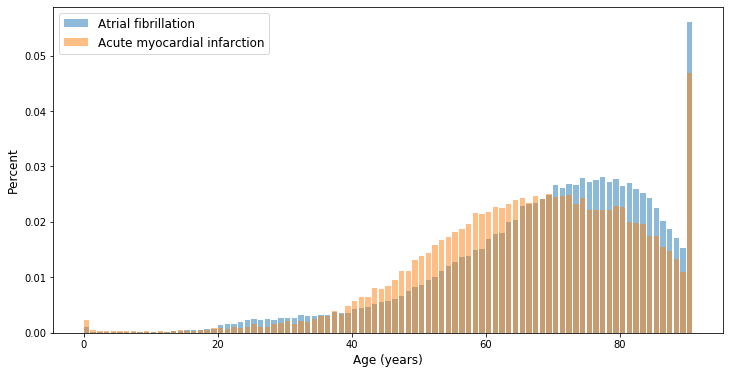

In [7]:
cad_1 = temporal_concept_age_counts(313217)[0]
cad_2 = temporal_concept_age_counts(312327)[0]

plt.figure(figsize=(12,6))
plot_age_counts([cad_1, cad_2], normalize=True, show_error_bars=False)

## Concept Pair Delta Distributions

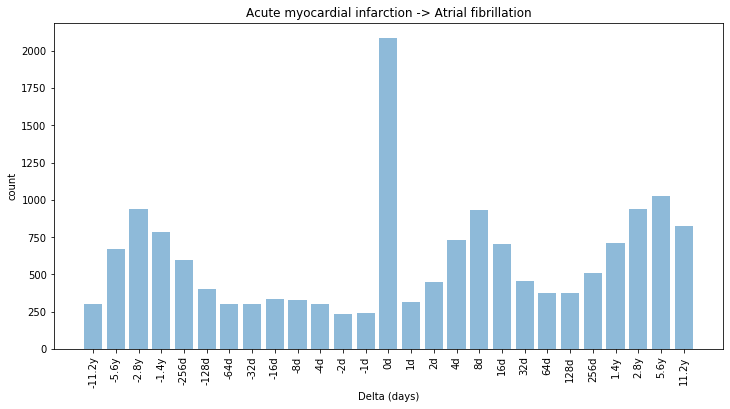

In [6]:
deltas = temporal_pair_delta_counts(312327, 313217)
delta = deltas[0]

plt.figure(figsize=(12,6))
plot_delta(delta, alpha=0.5, show_error_bars=False)

#### Show the delta plot along with its mirror image

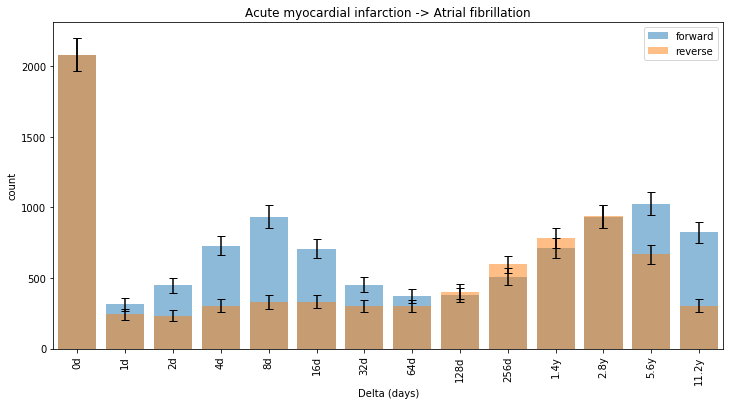

In [22]:
# Create a reversed copy of the delta
delta_mirror = delta.reverse()

# Plot the deltas together but only show the positive x-axis
plt.figure(figsize=(12,6))
plot_delta(delta, alpha=0.5, show_error_bars=True, show_plot=False)
plot_delta(delta_mirror, alpha=0.5, show_error_bars=True, show_plot=False)
plt.xlim((-.5, delta.n + 0.5))
plt.legend(['forward', 'reverse'])
plt.title(f'{delta.source_concept_name} -> {delta.target_concept_name}')
plt.show()

## Find Similar Concept-Age Distributions

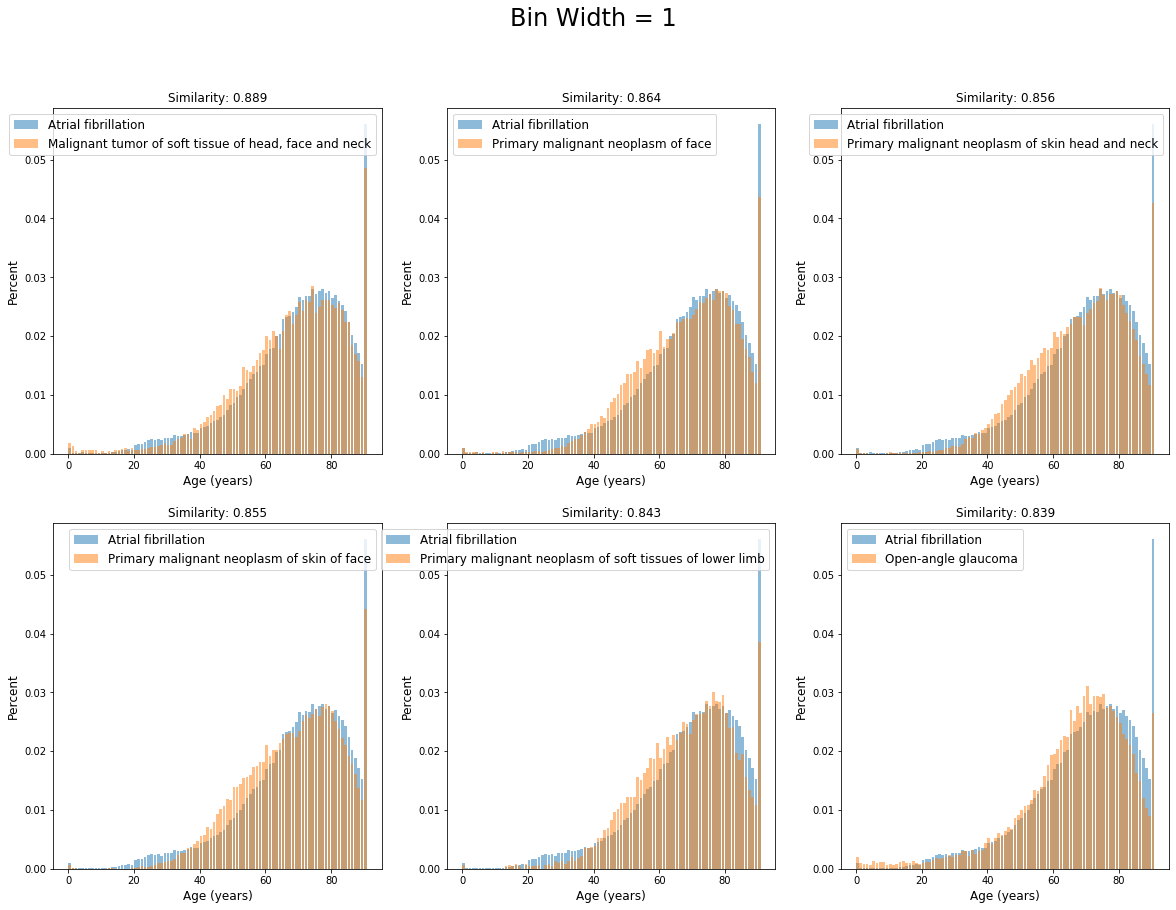

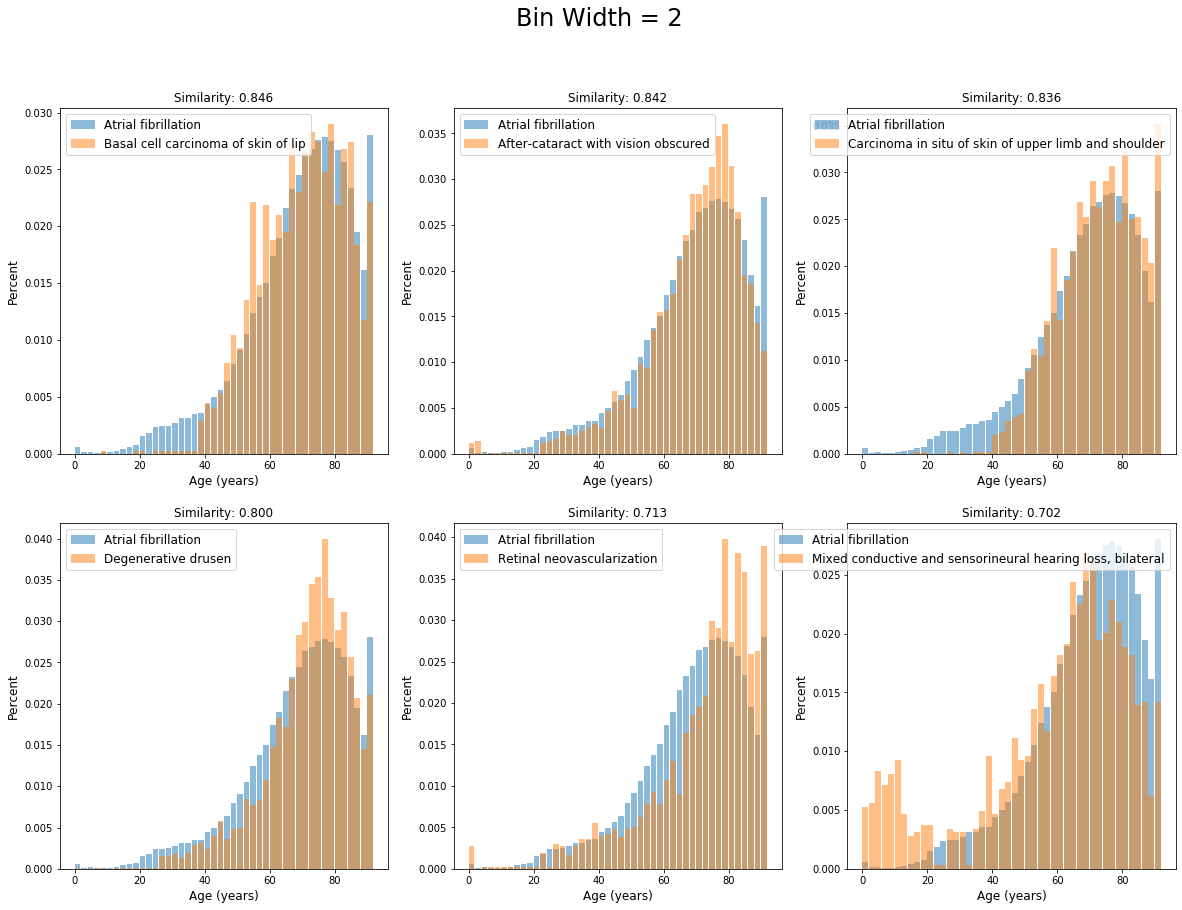

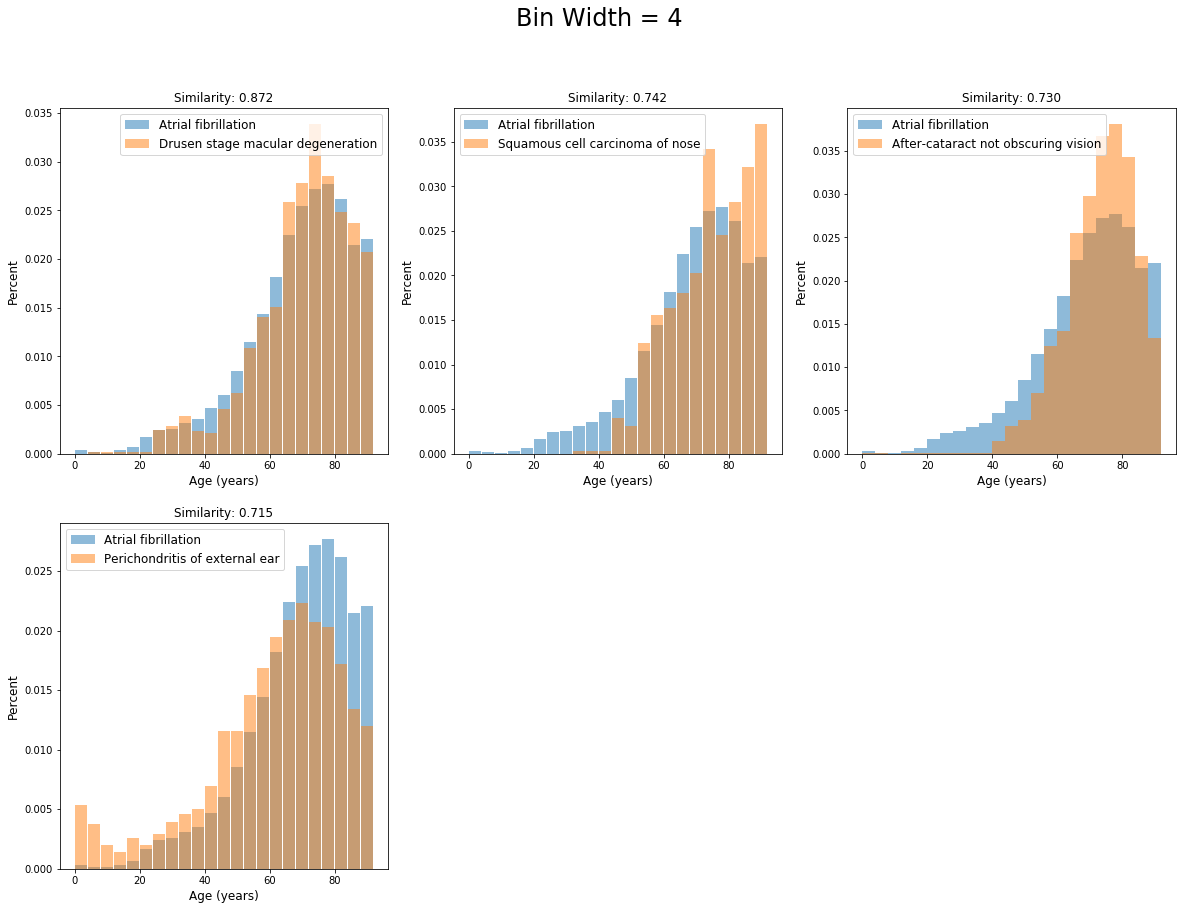

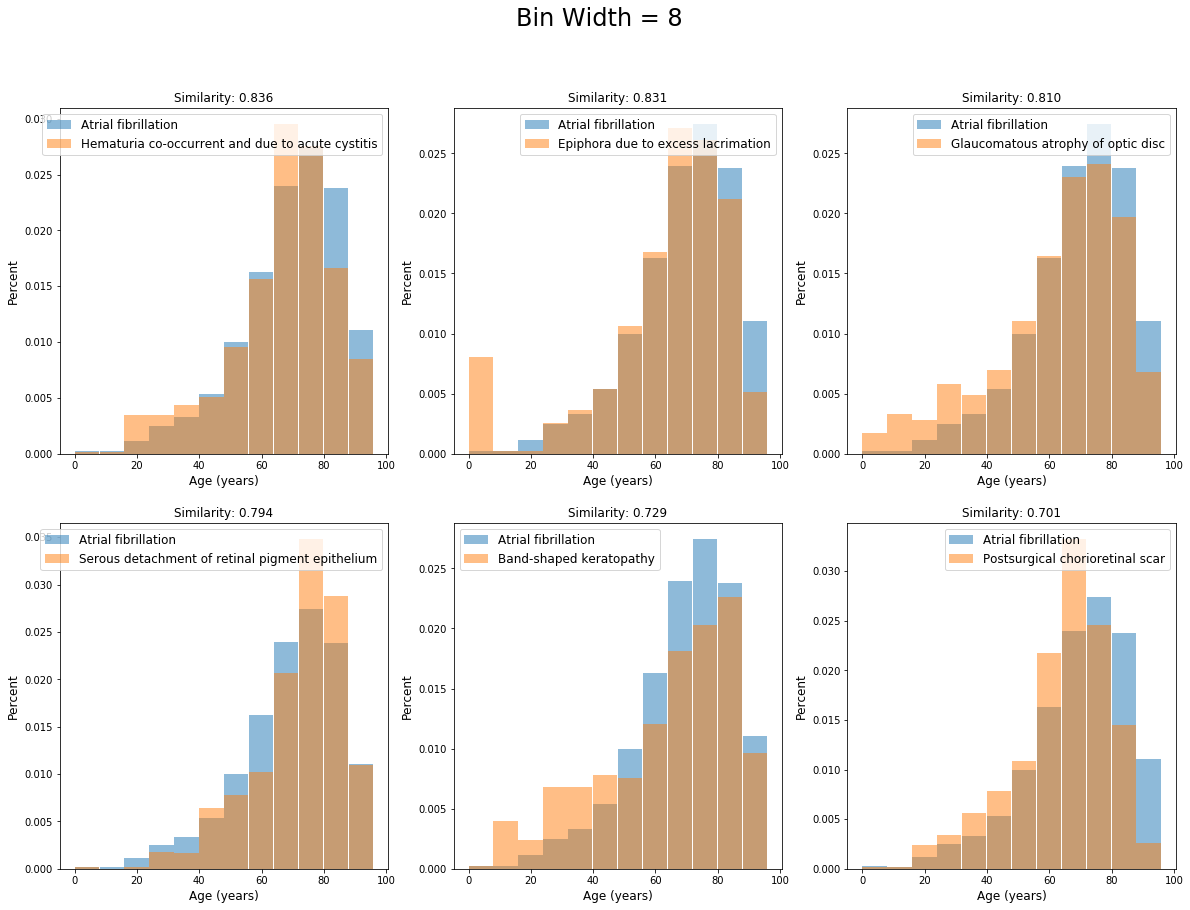

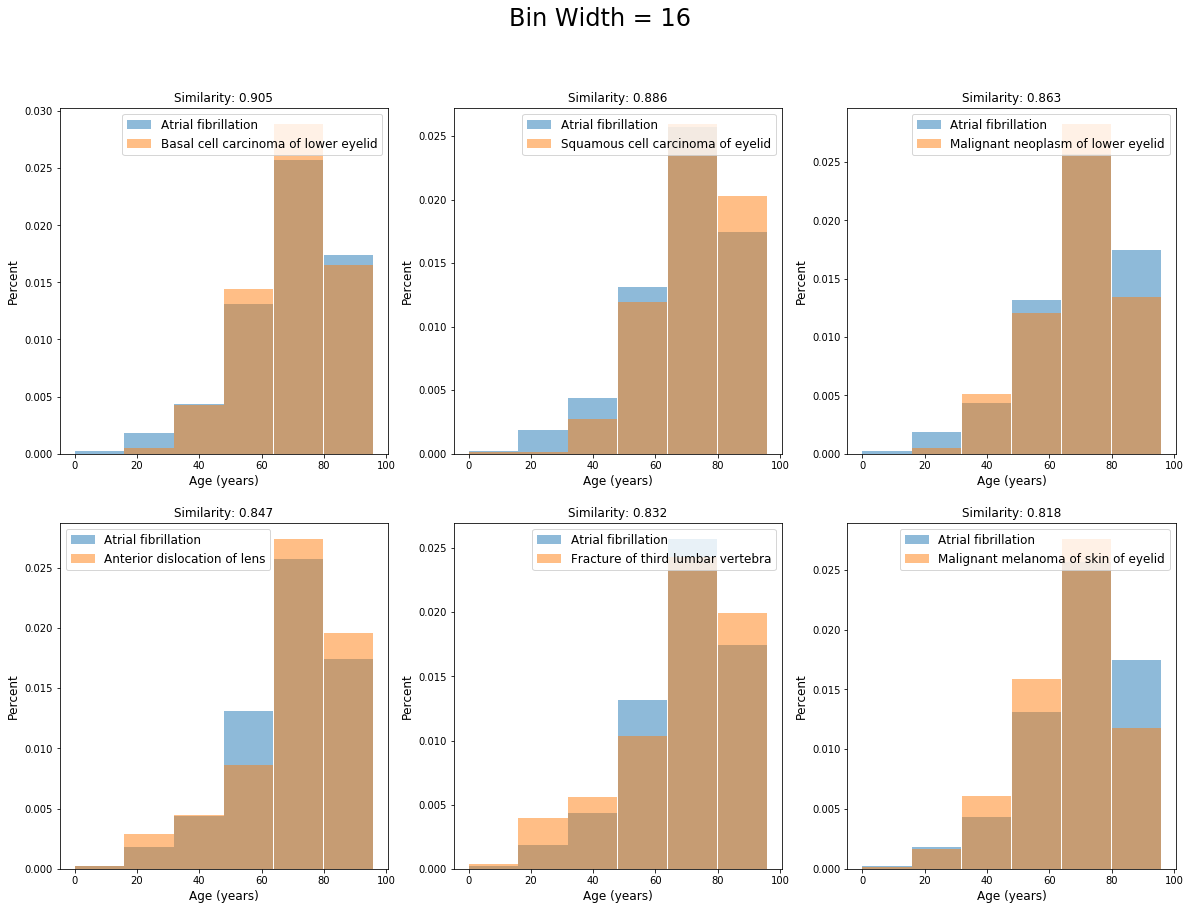

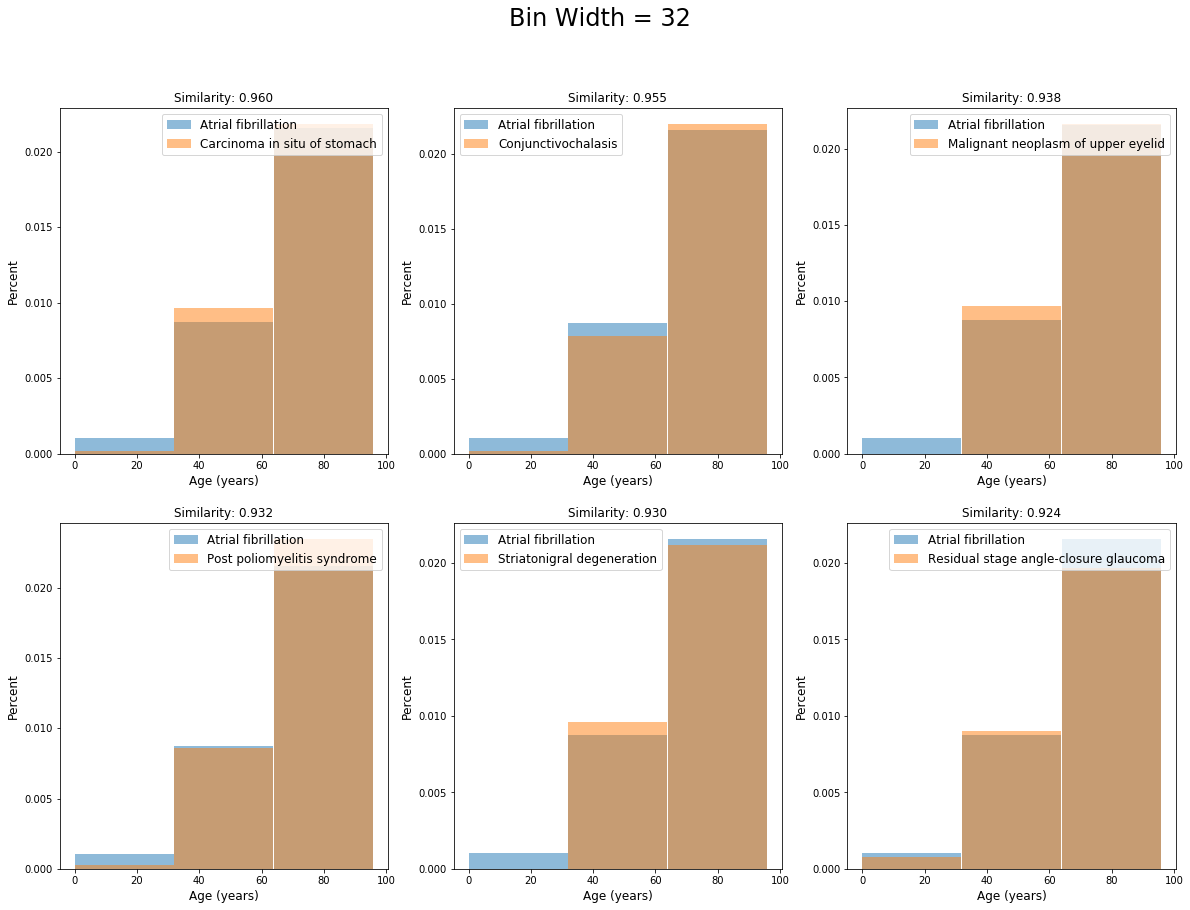

In [6]:
cads_binned, similarities_binned = temporal_find_similar_age_distributions(313217)

# Plot the top 6 results of each bin width
for bin_width, cads in cads_binned.items():
    similarities = similarities_binned[bin_width]
    
    plt.figure(figsize=(20,14))            
    
    # Skipping the first CAD since it's just the queried concept
    for i in range(1, min(7, len(cads))):
        plt.subplot(2, 3, i)
        plot_age_counts([cads[0], cads[i]], normalize=True, show_plot=False)
        plt.title(f'Similarity: {similarities[i]:0.03f}')
    
    plt.suptitle(f'Bin Width = {bin_width}', fontsize=24)
    plt.show()

# Analyze temporal relationship between a pair of source and target concepts

#### Warning: the following cell takes ~30 seconds to run

In [15]:
source_concept_id = 312327  # Acute myocardial infarction
target_concept_id = 313217  # Atrial fibrillation
# source_concept_id = 1309944  # Amiodarone
# target_concept_id = 140673  # Hypothyroidism
queried_pair, source_comparison, target_comparison, combined_comparison = temporal_source_to_target(source_concept_id, target_concept_id, 4)

### Compare the source concept to similar concepts

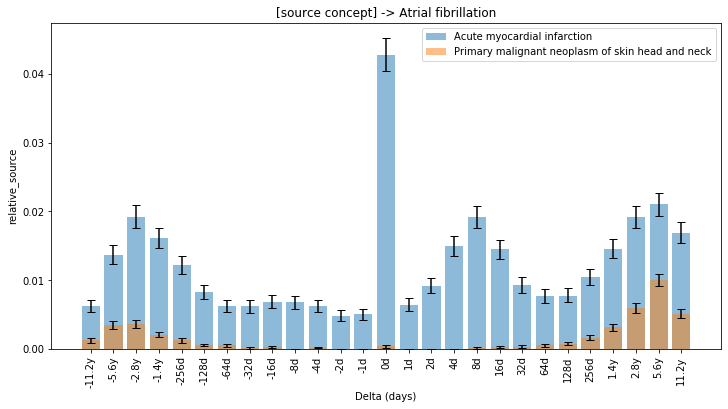

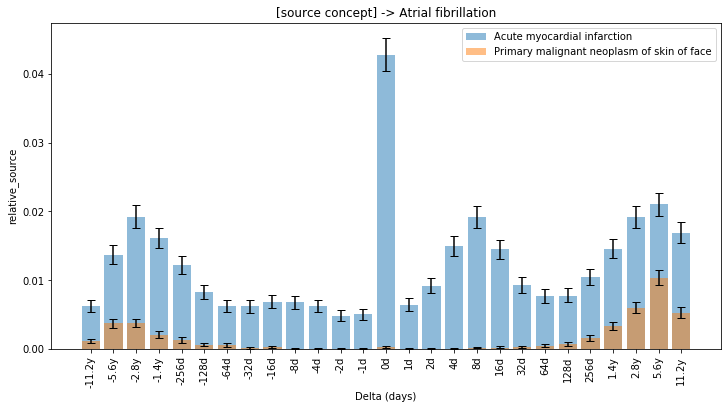

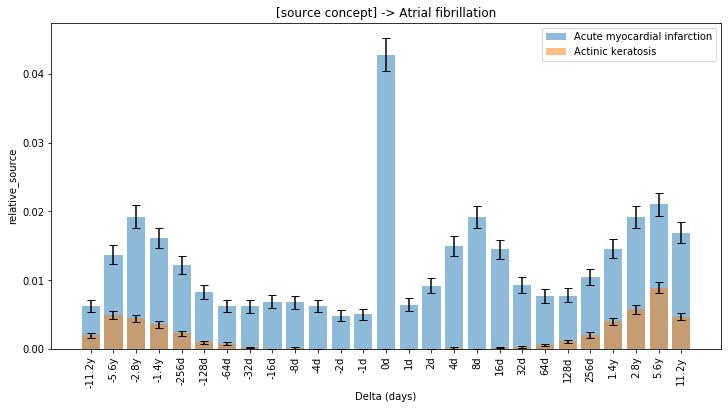

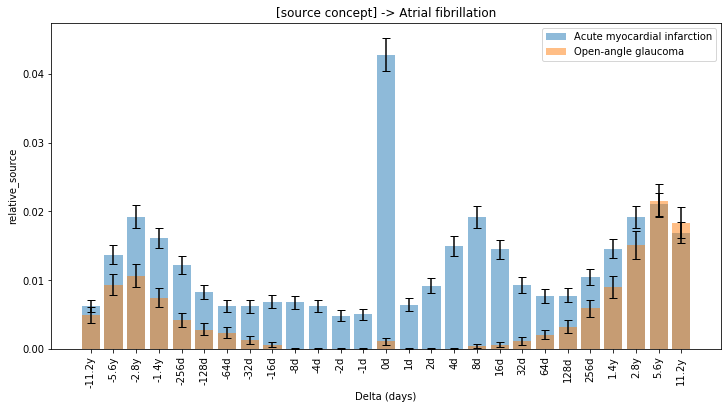

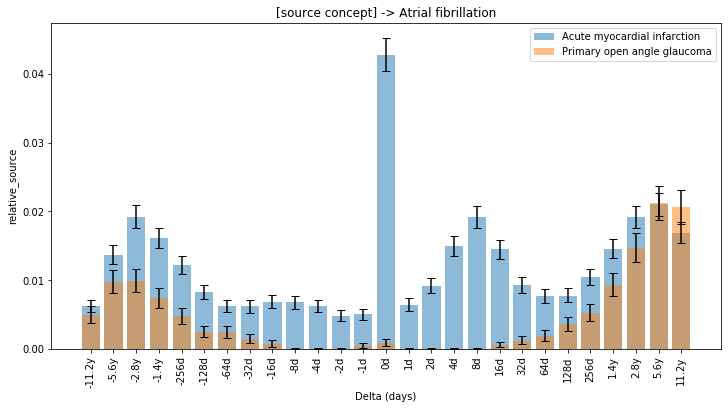

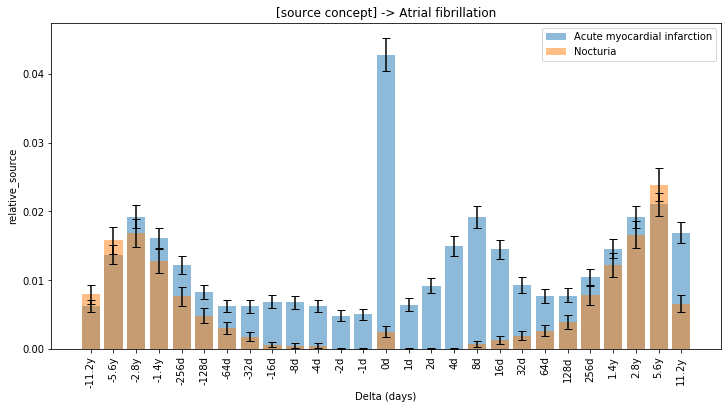

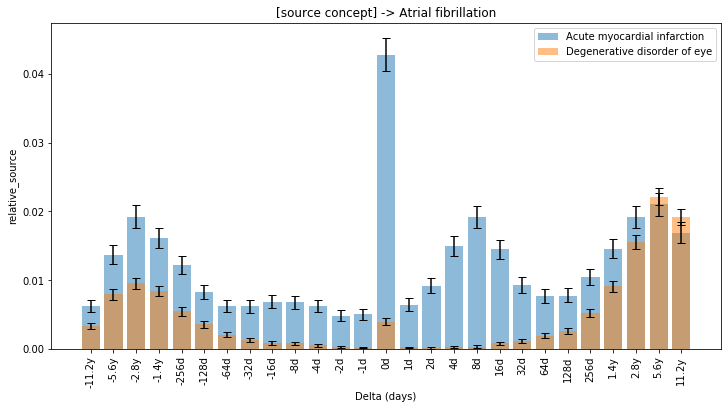

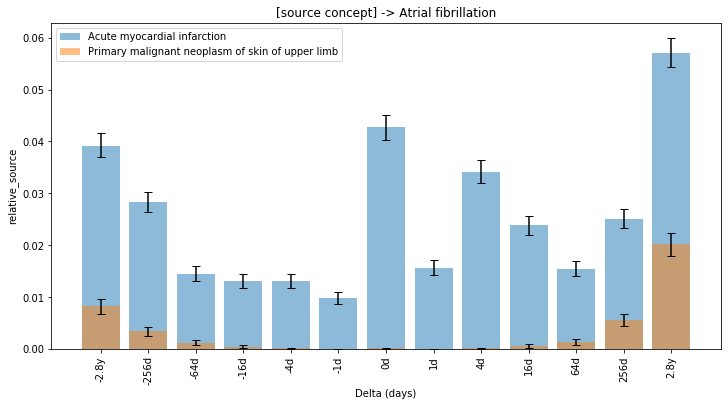

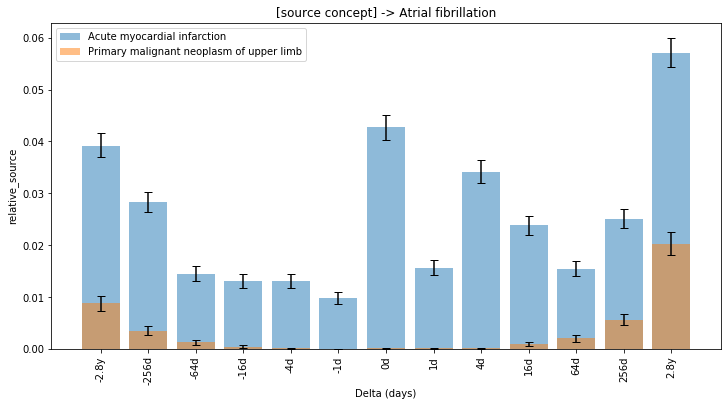

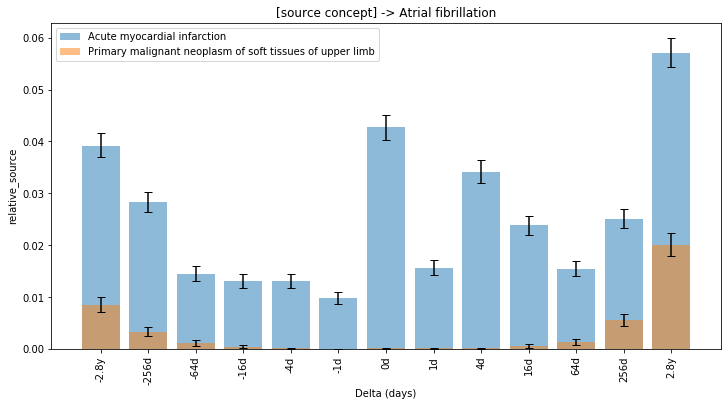

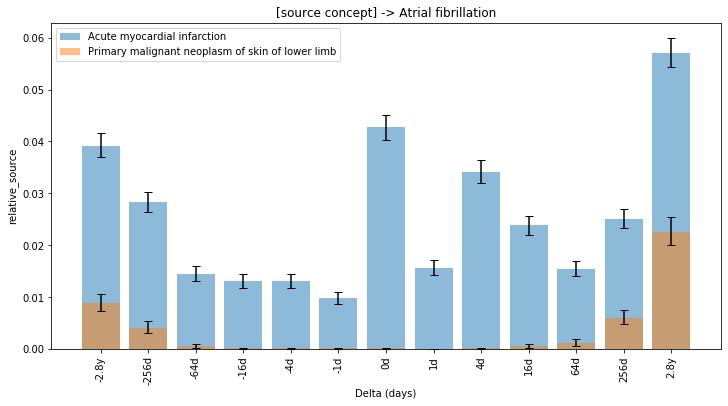

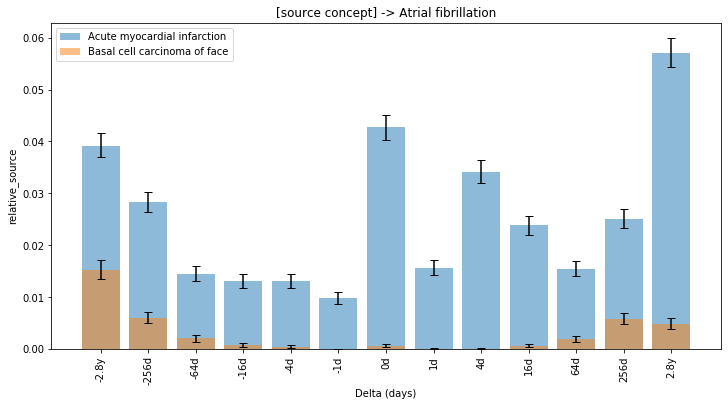

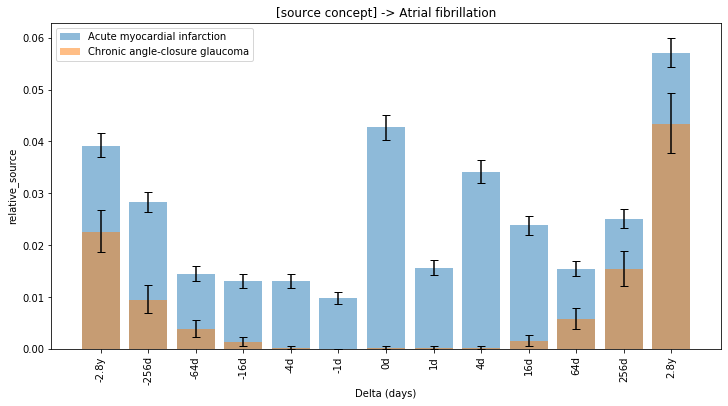

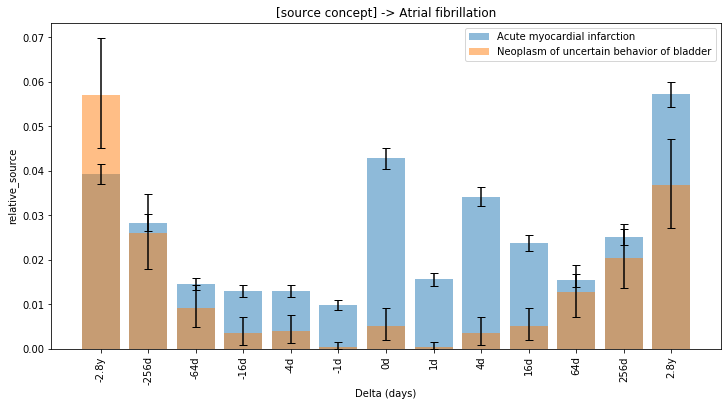

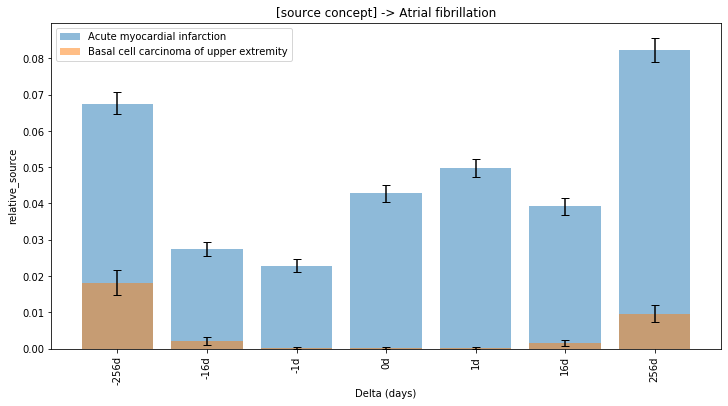

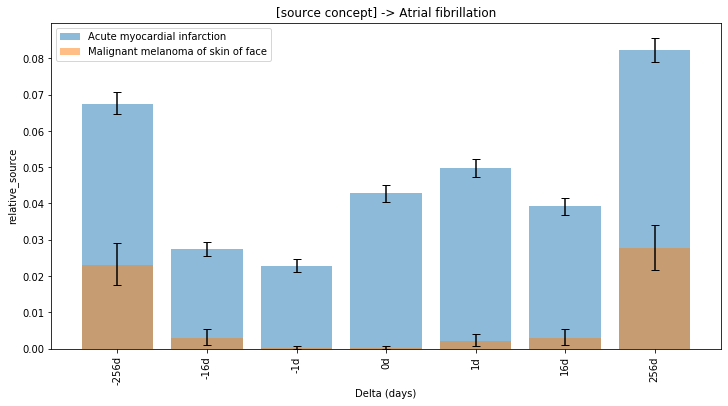

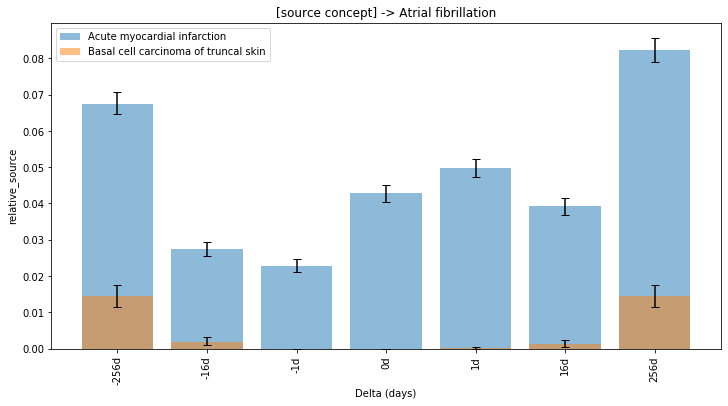

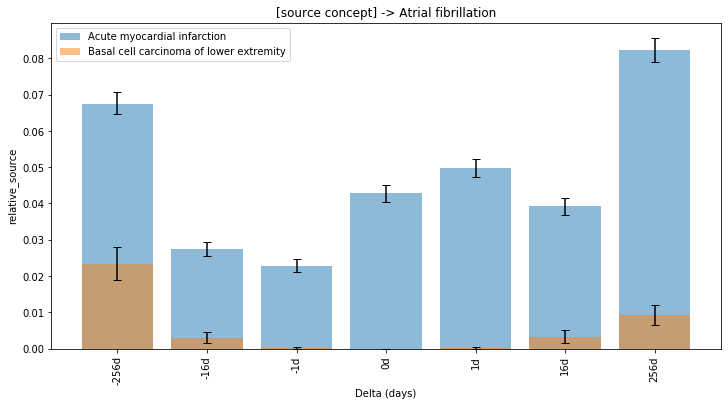

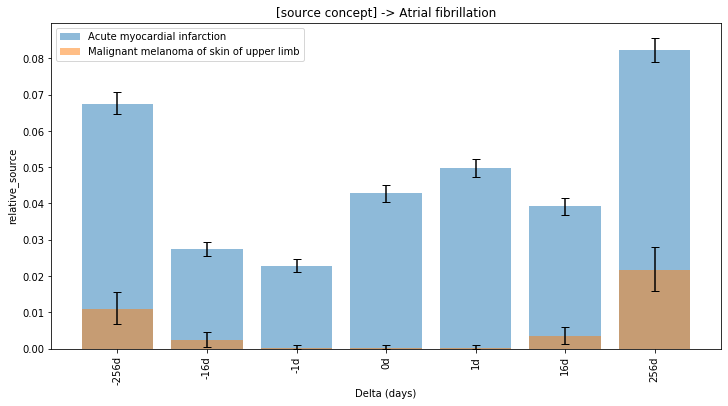

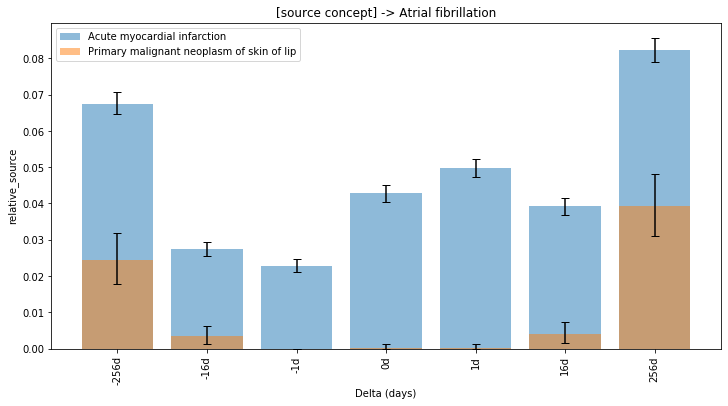

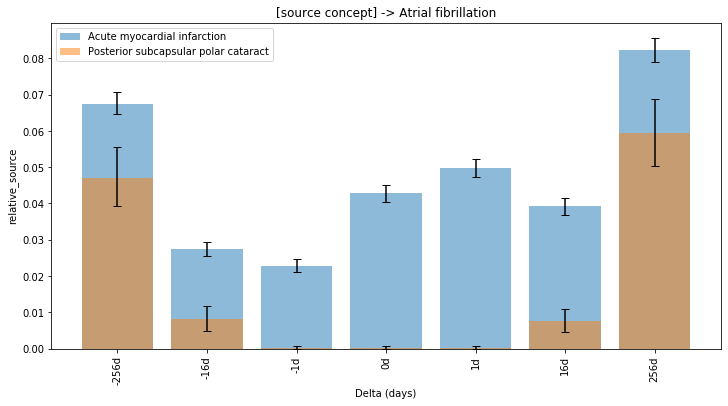

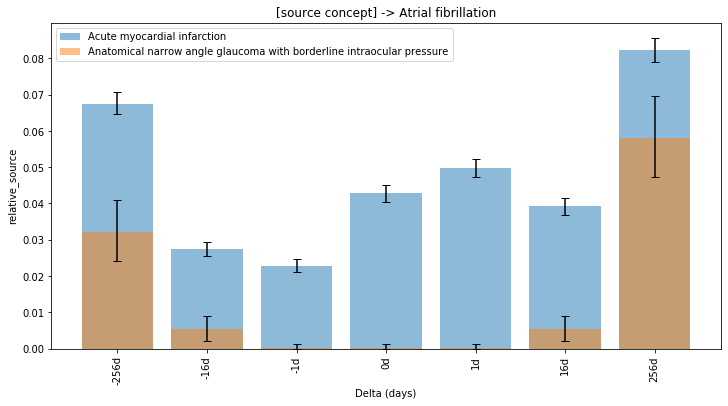

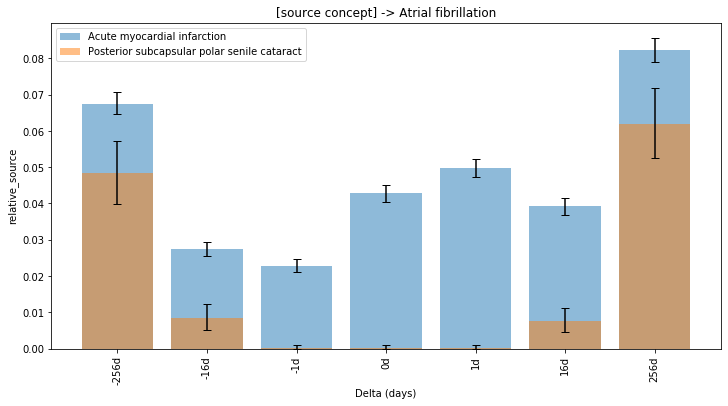

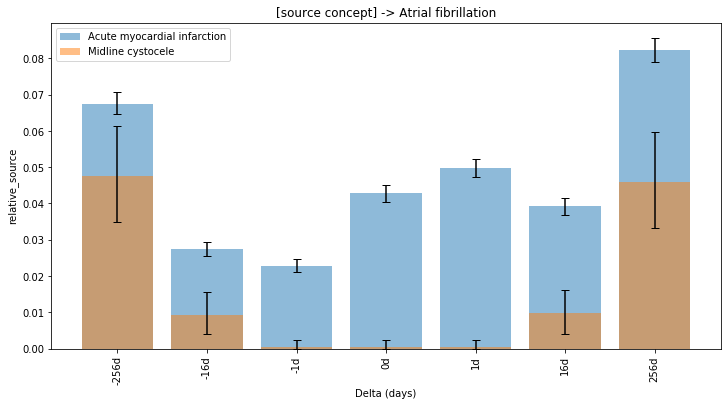

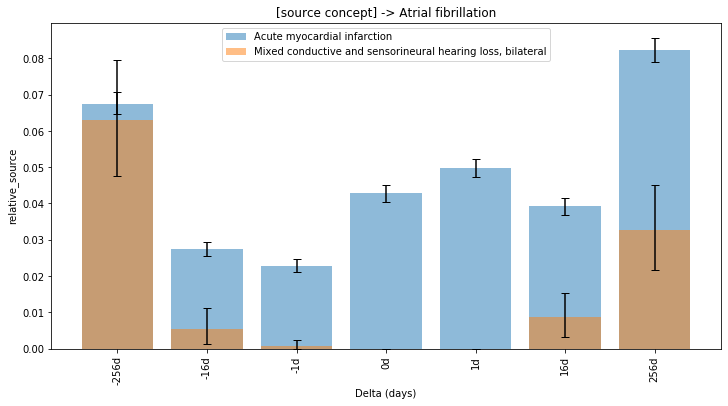

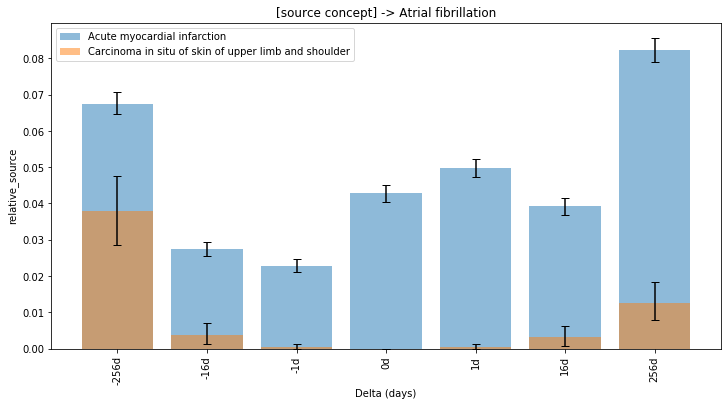

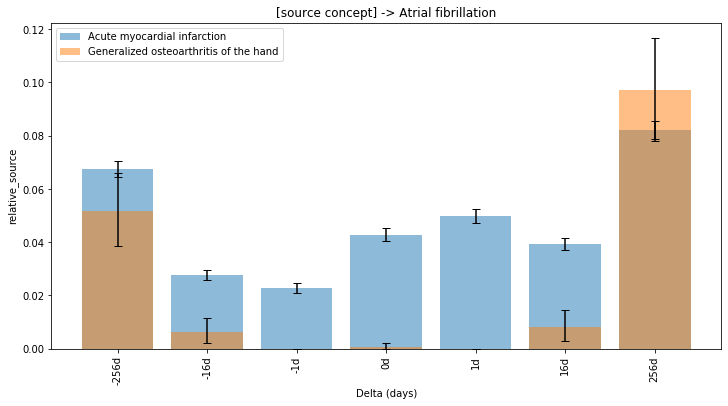

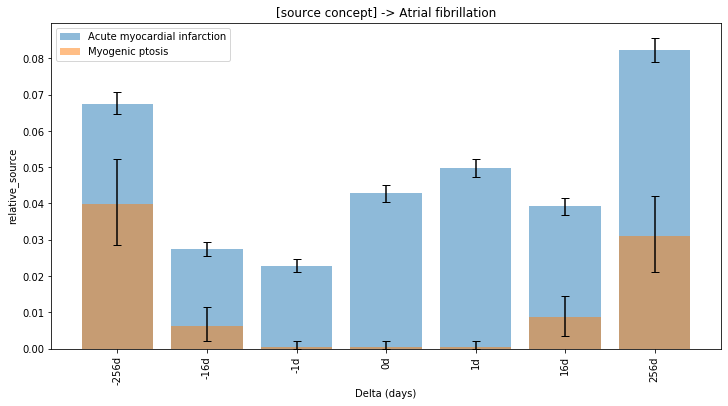

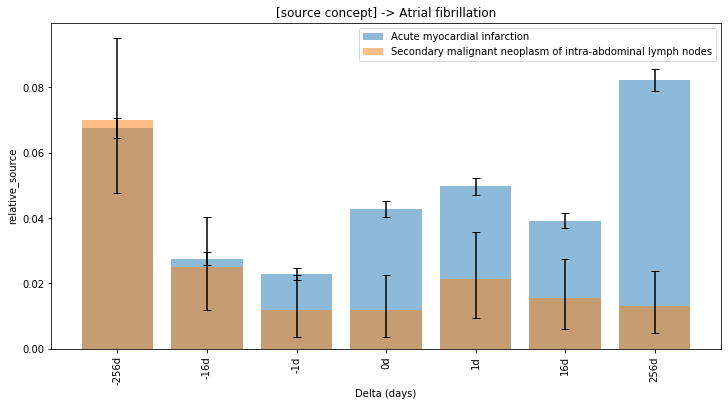

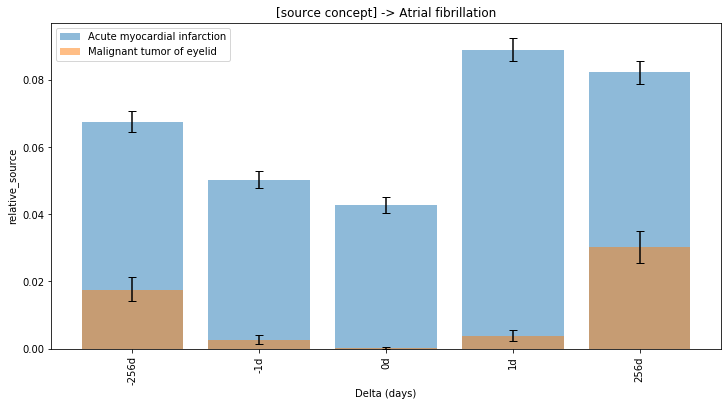

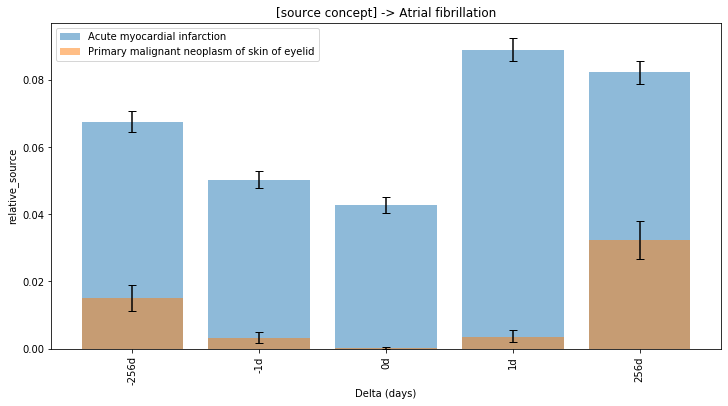

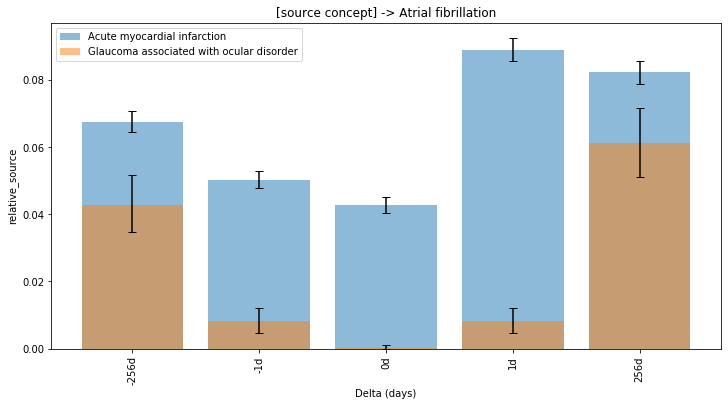

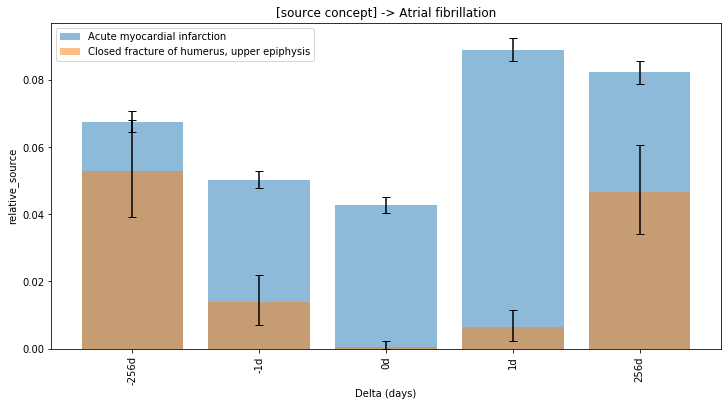

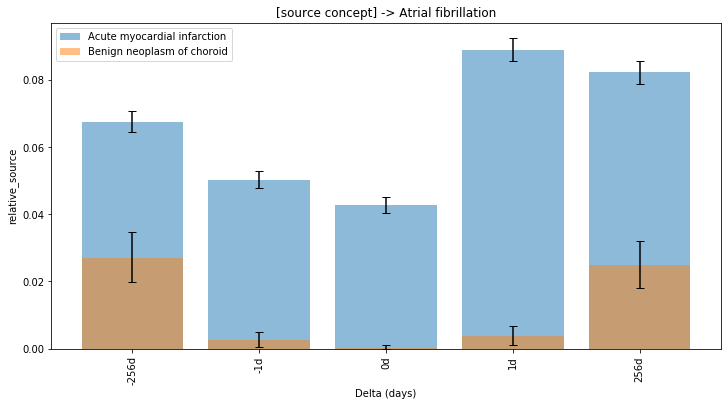

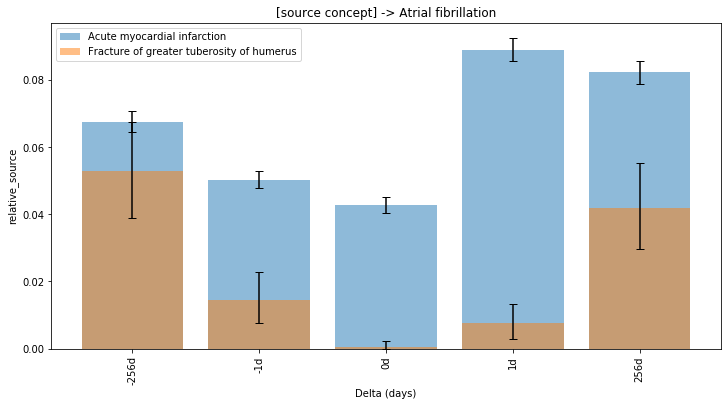

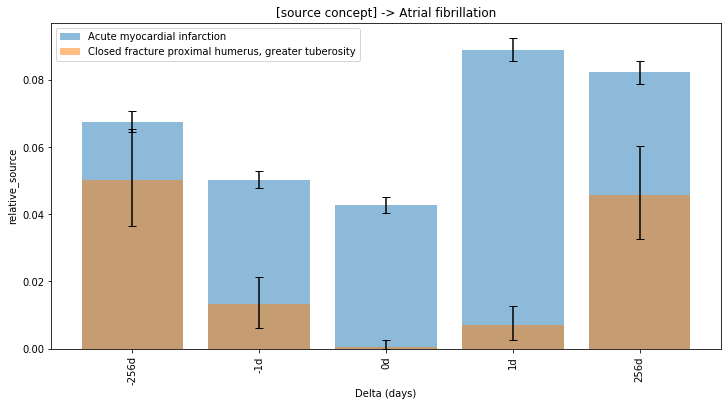

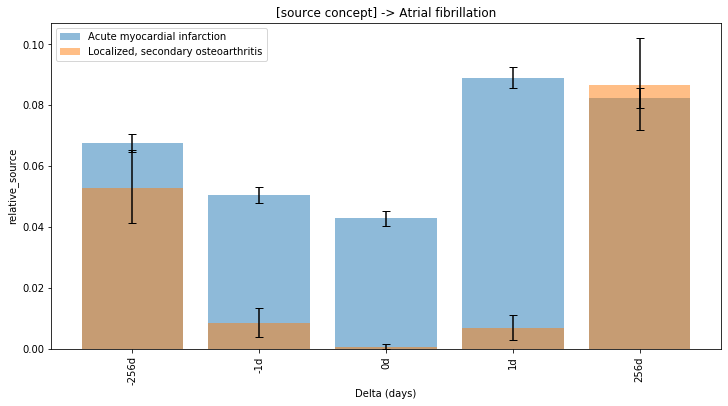

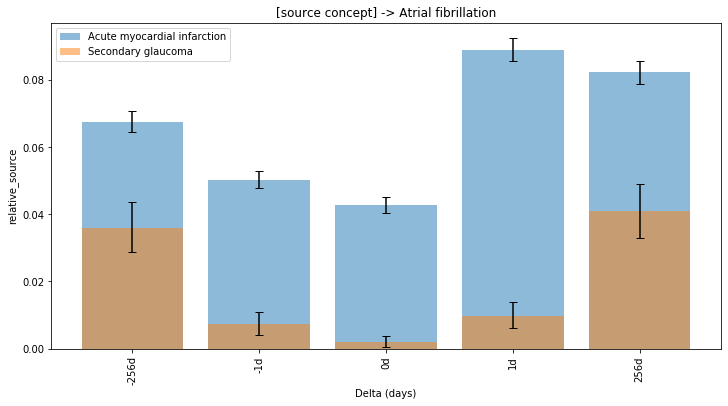

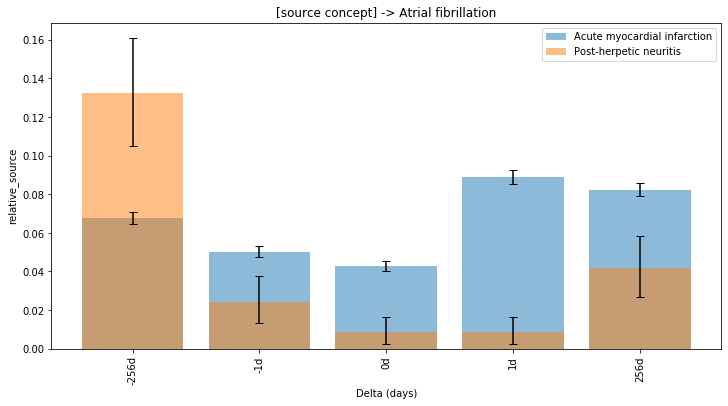

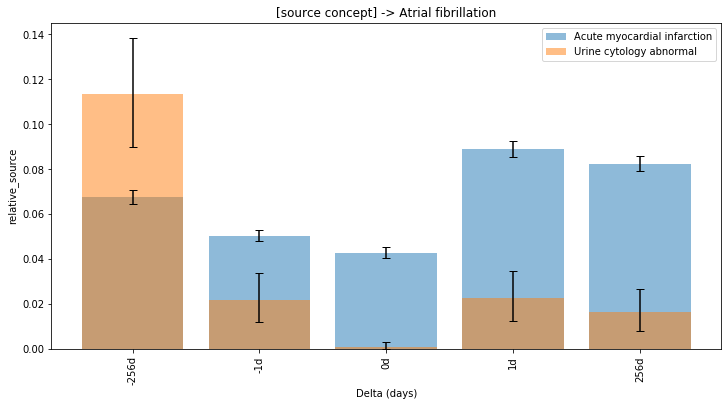

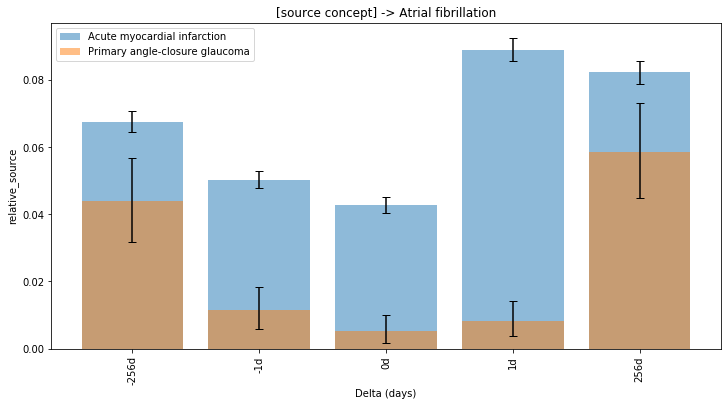

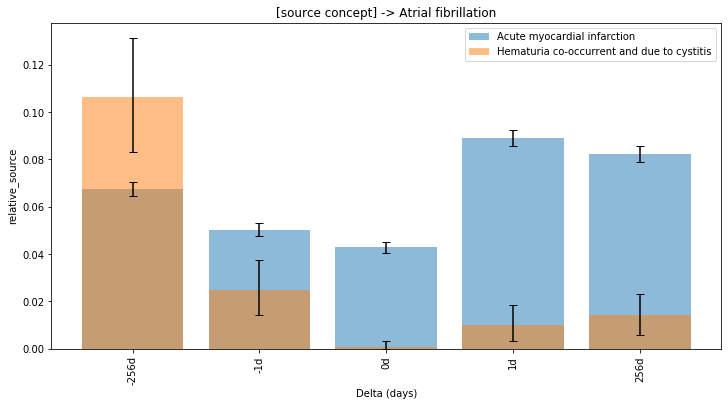

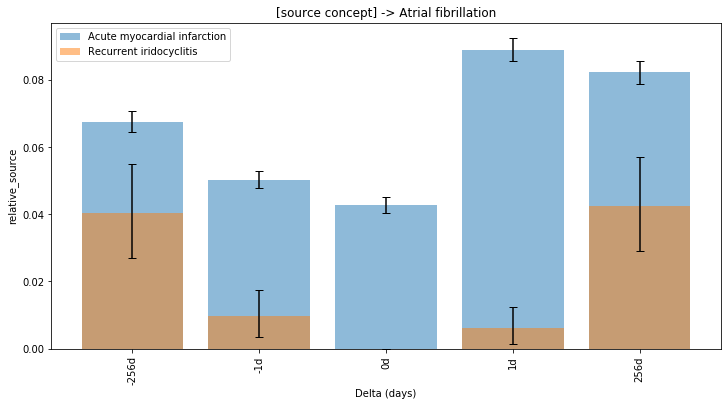

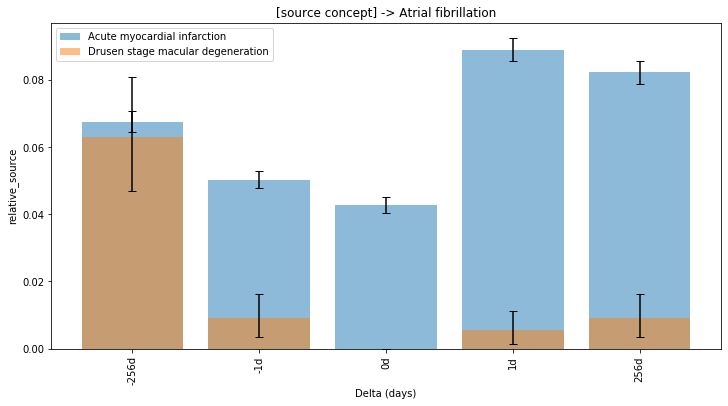

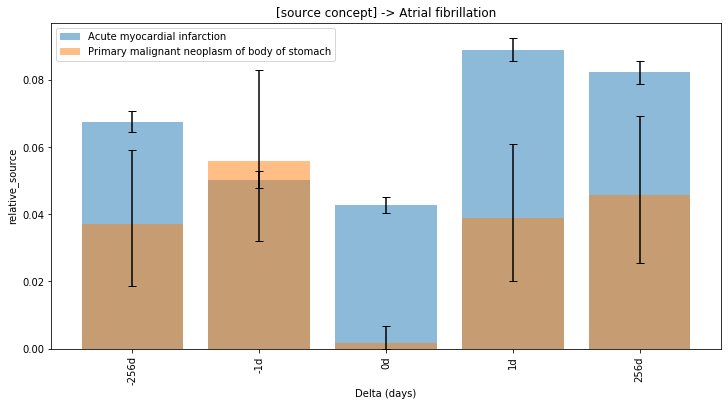

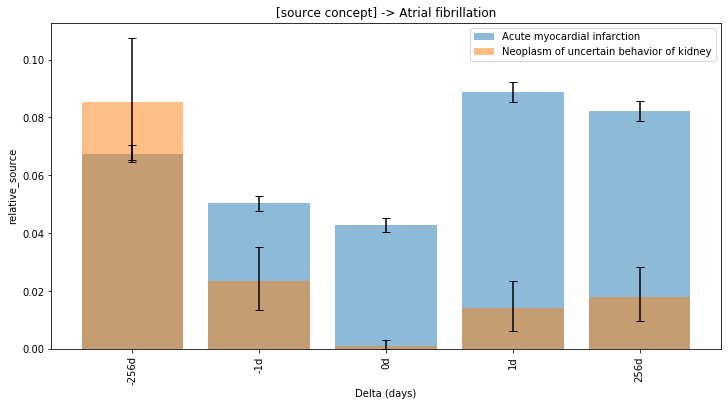

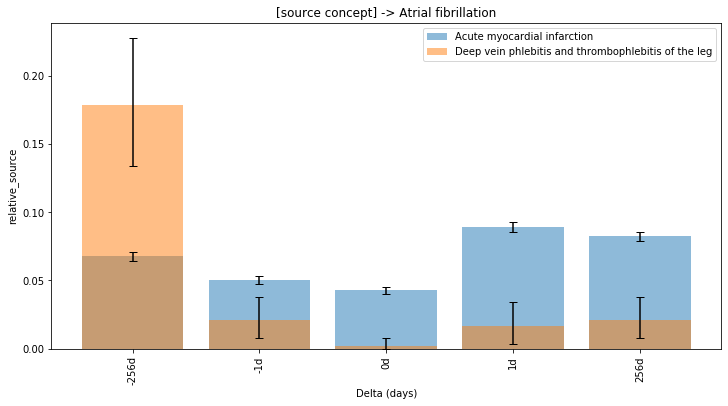

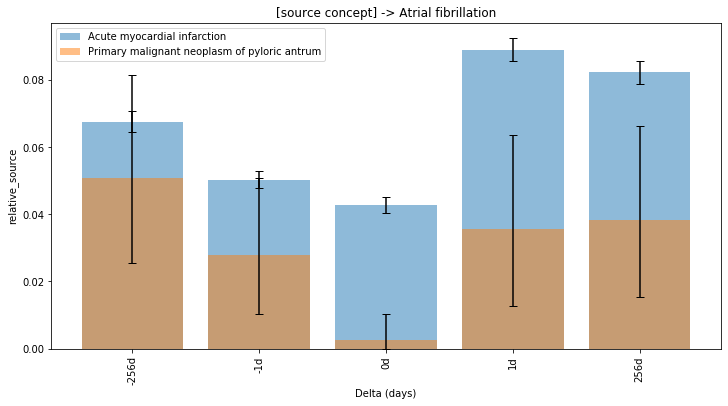

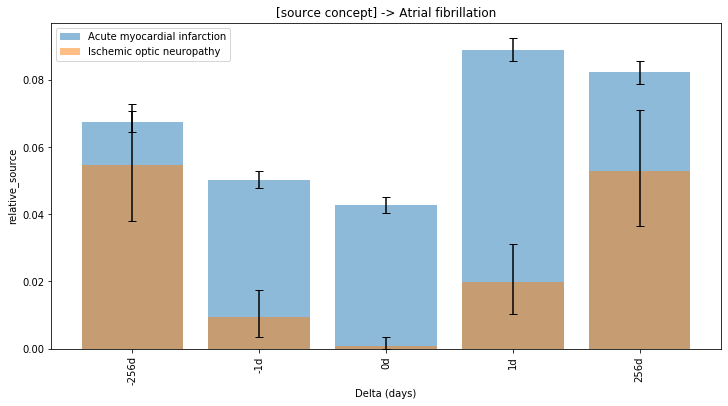

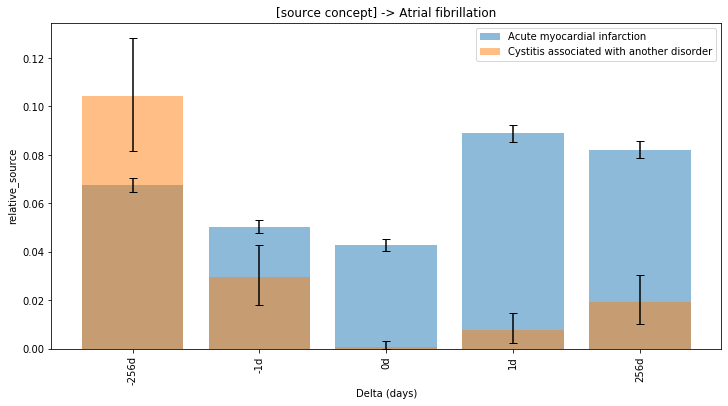

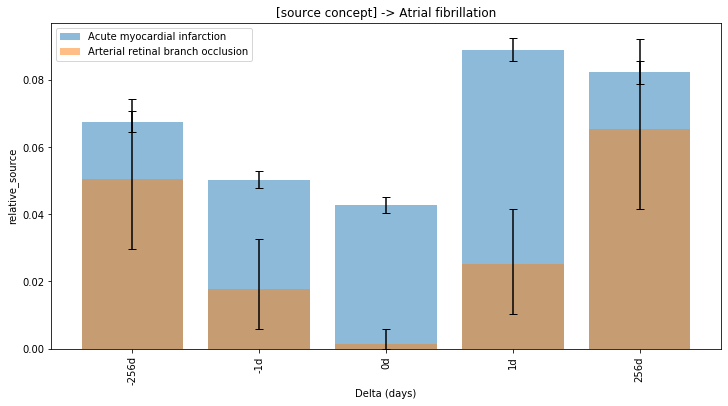

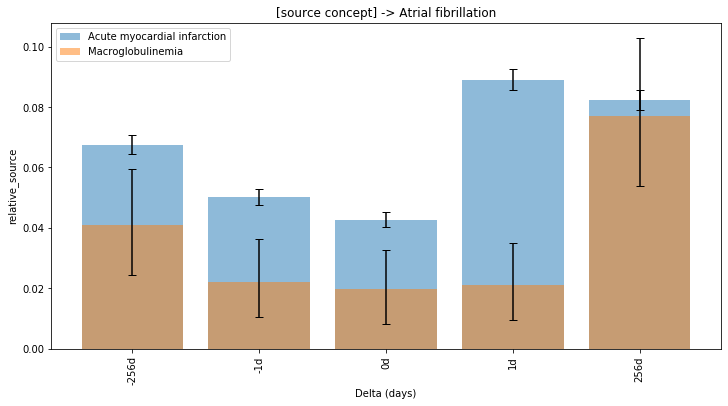

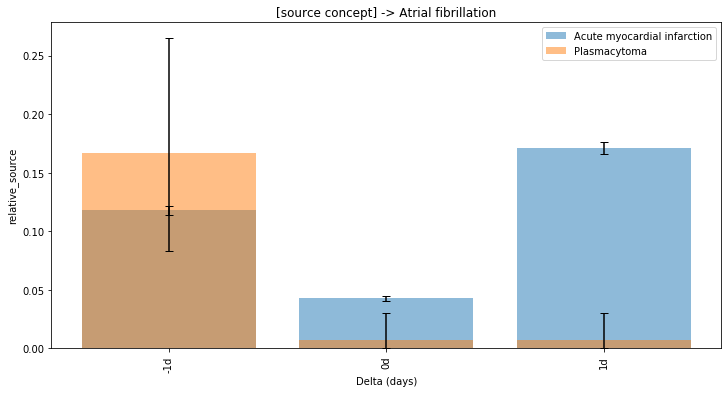

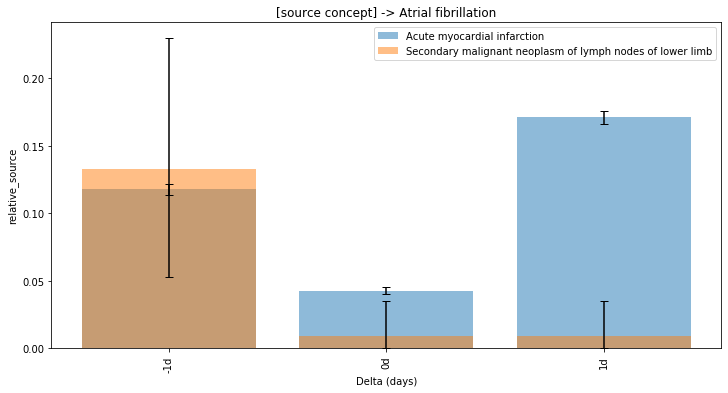

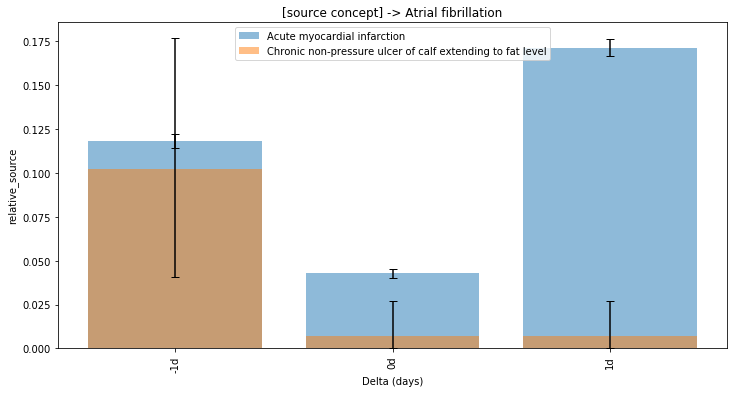

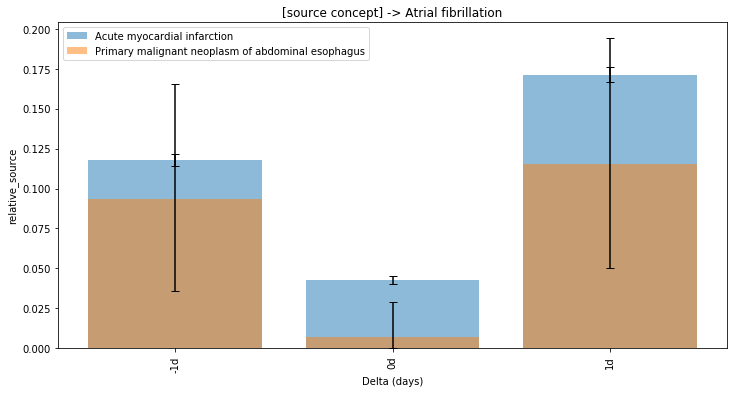

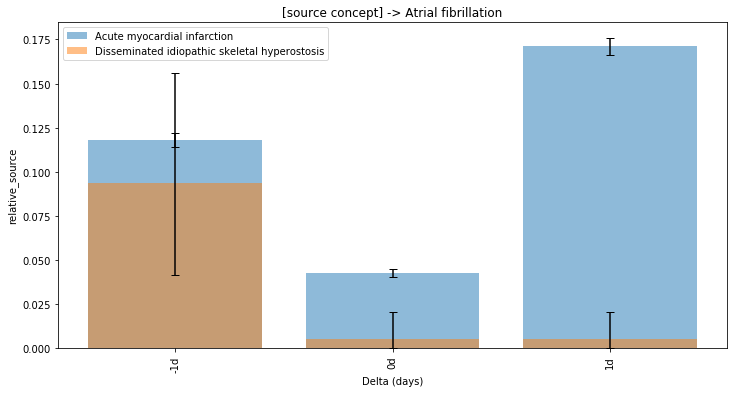

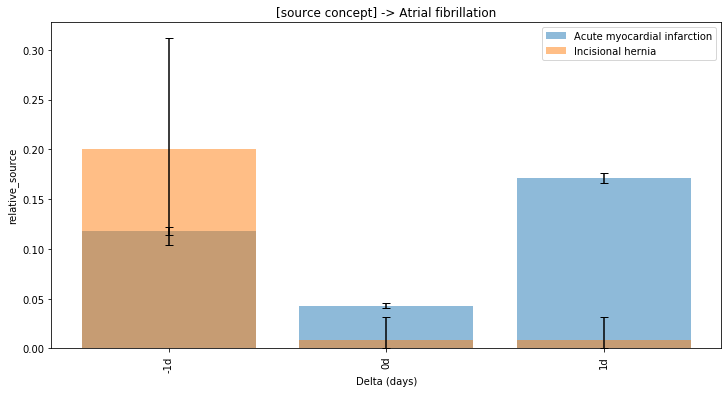

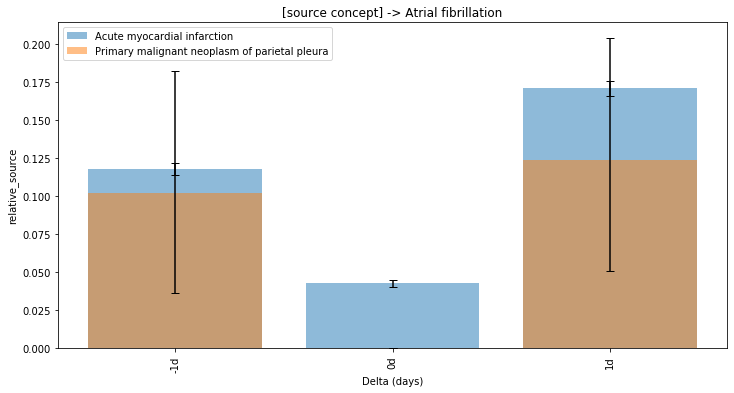

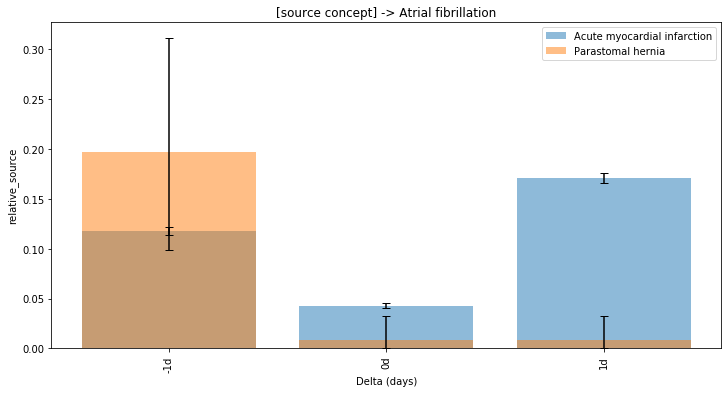

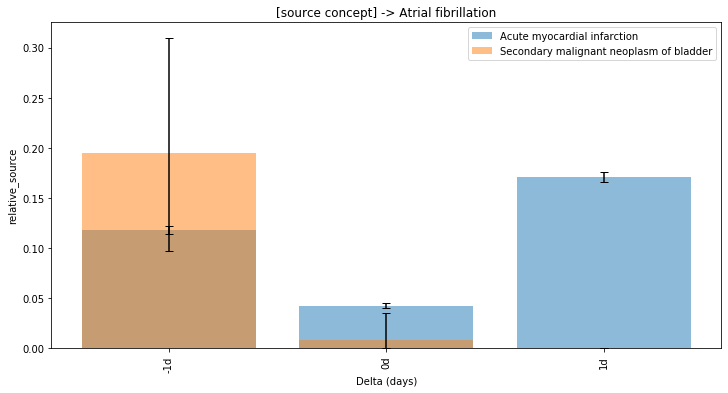

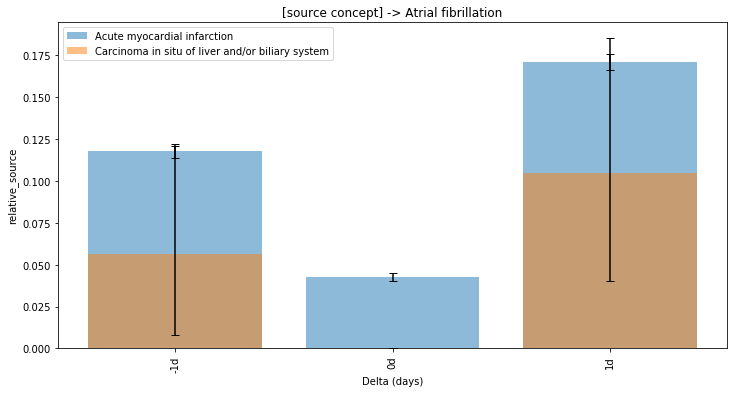

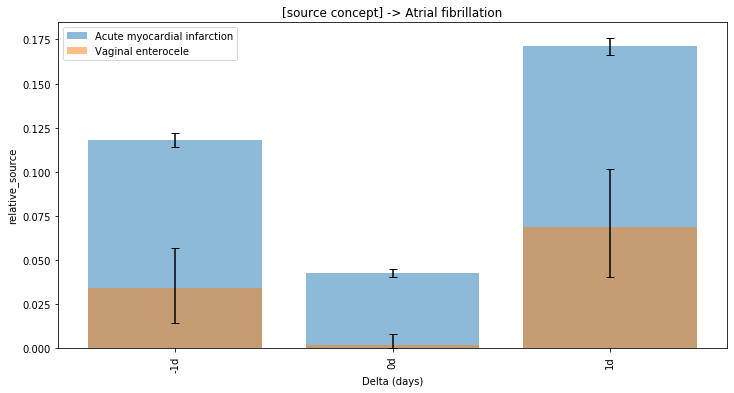

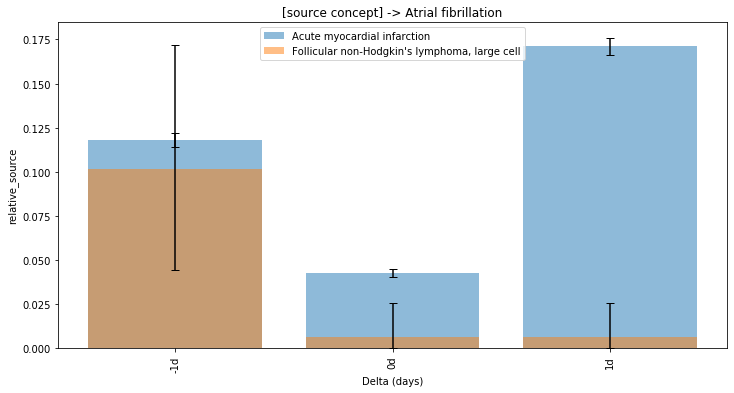

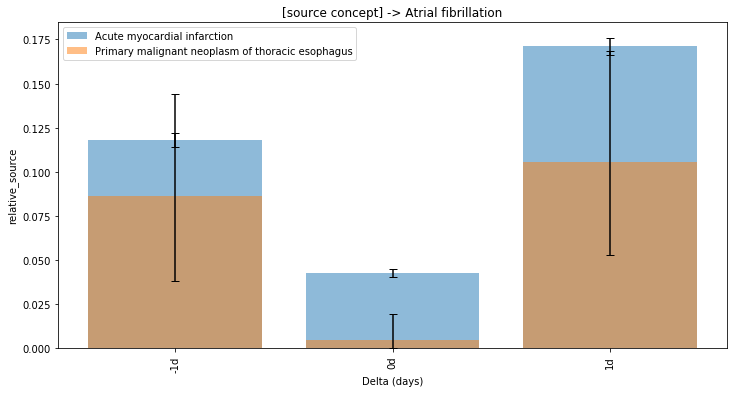

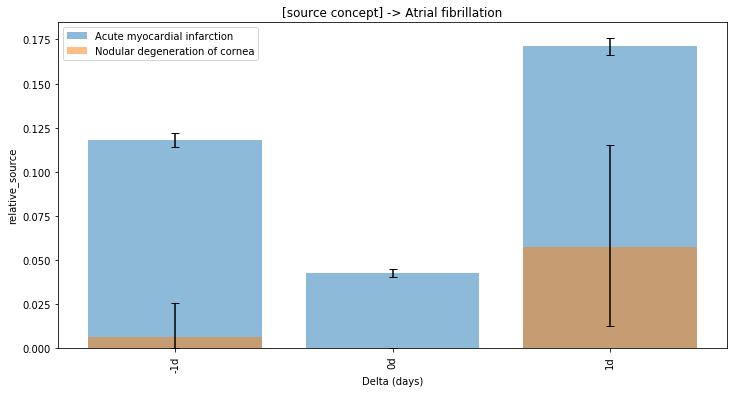

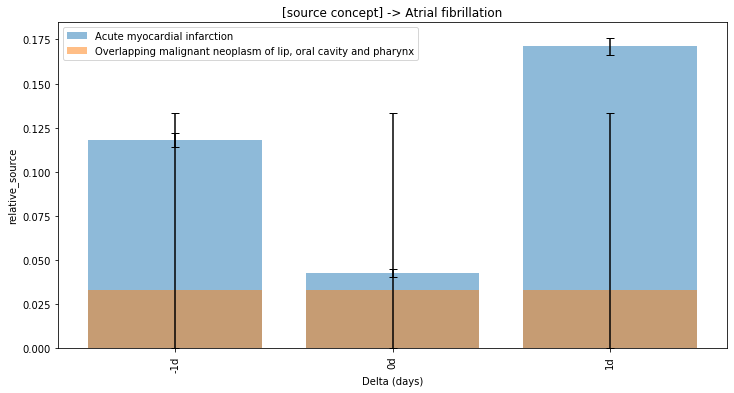

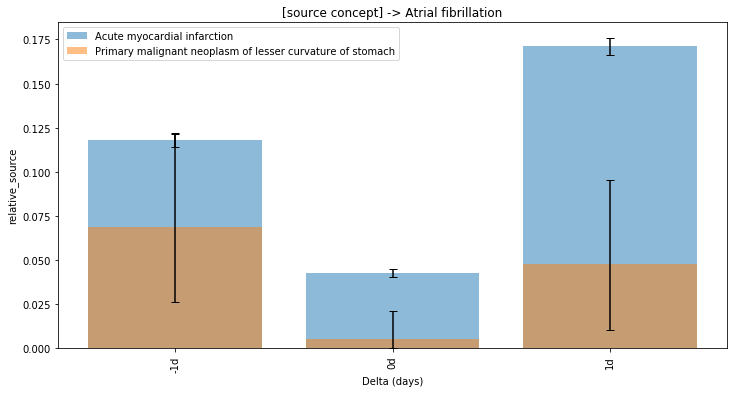

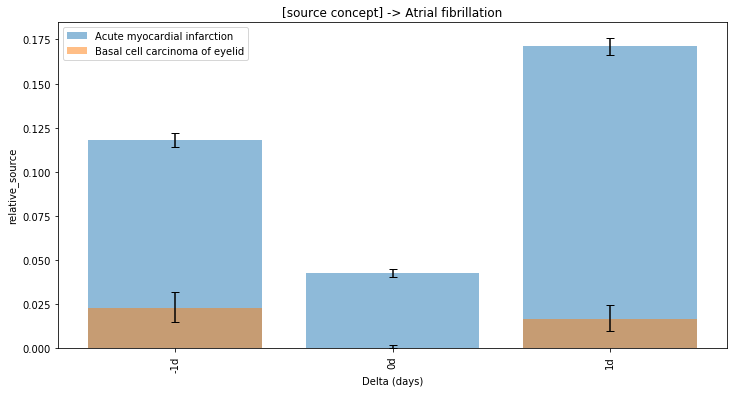

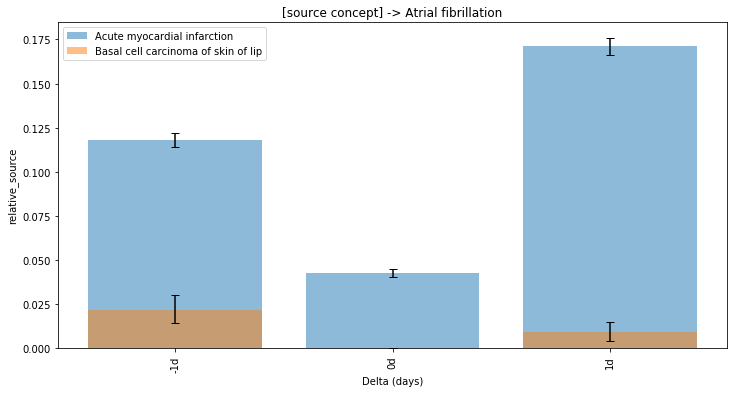

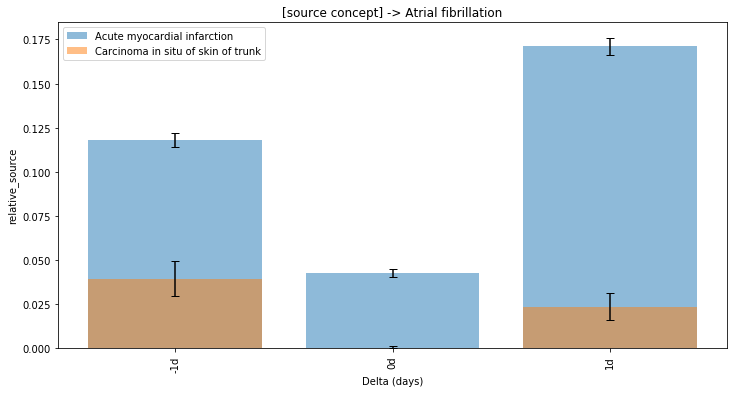

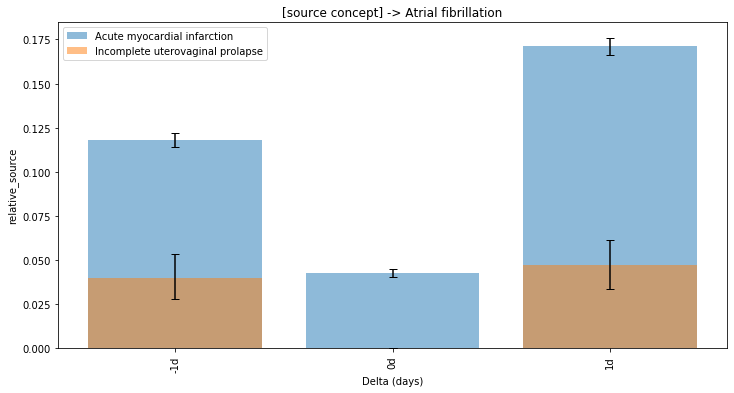

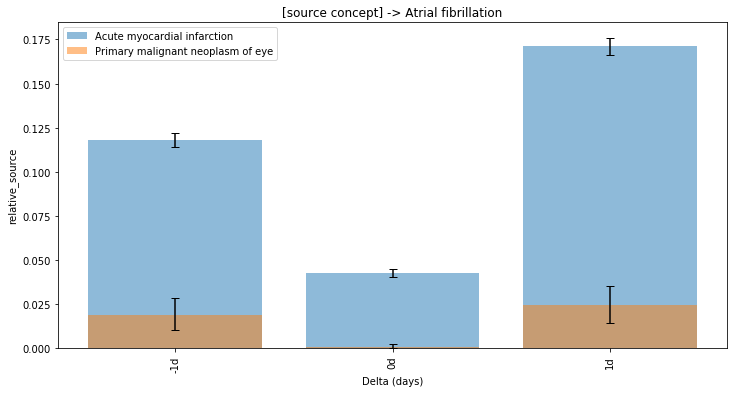

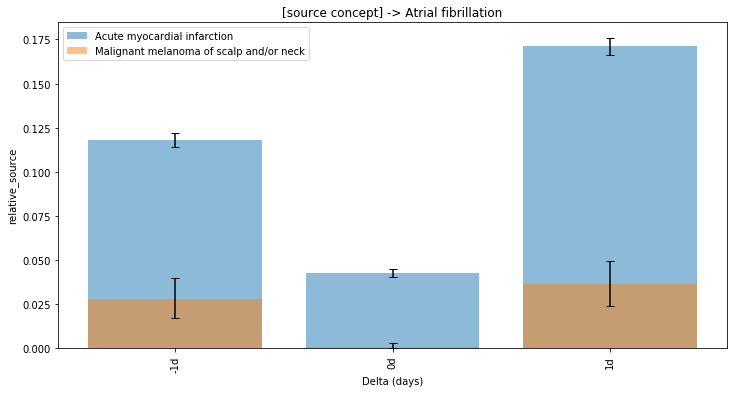

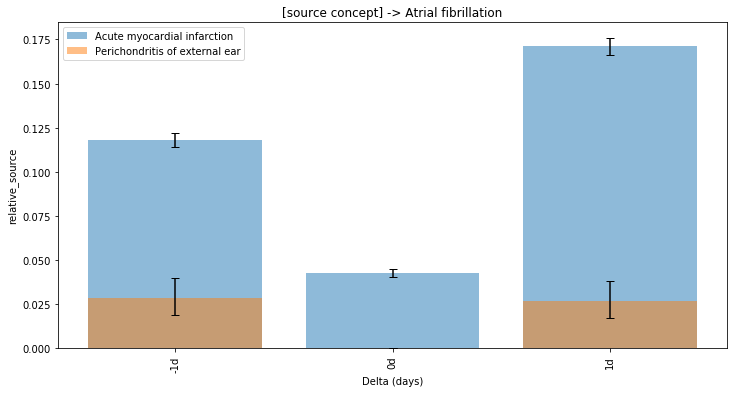

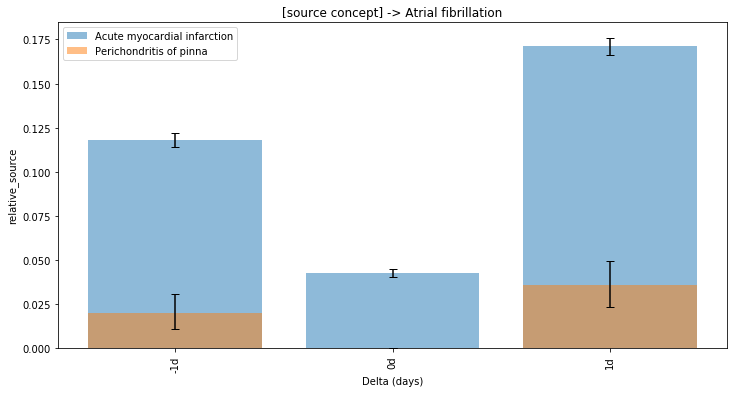

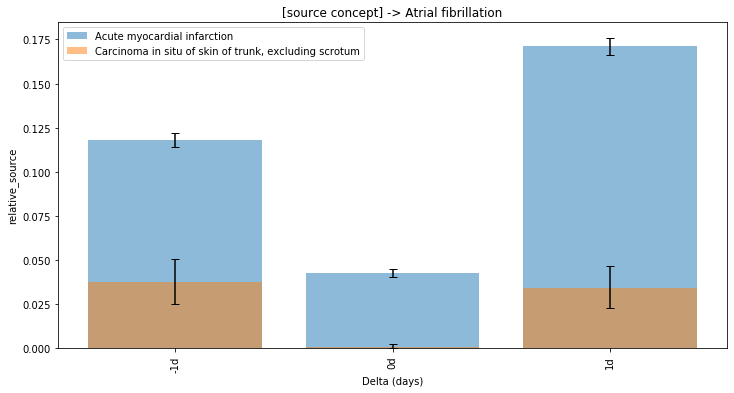

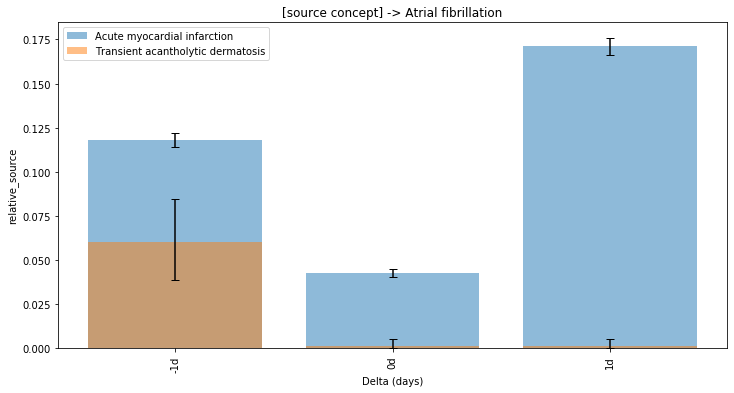

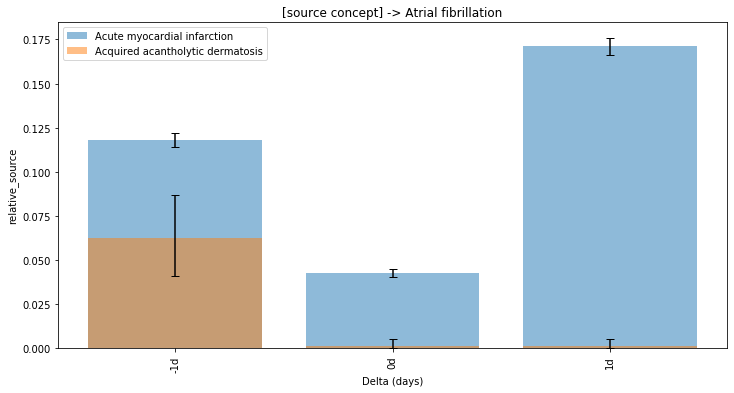

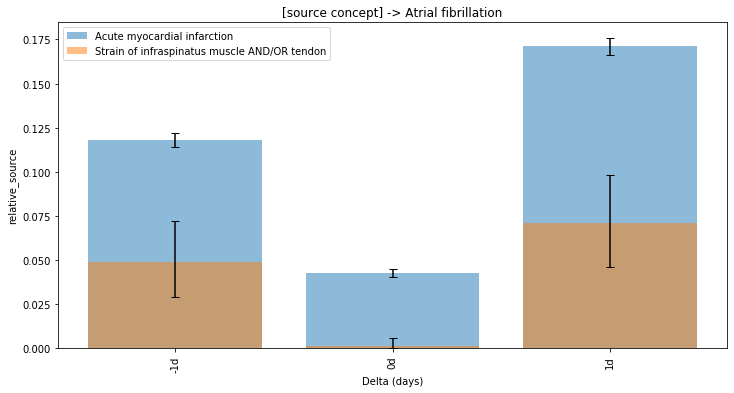

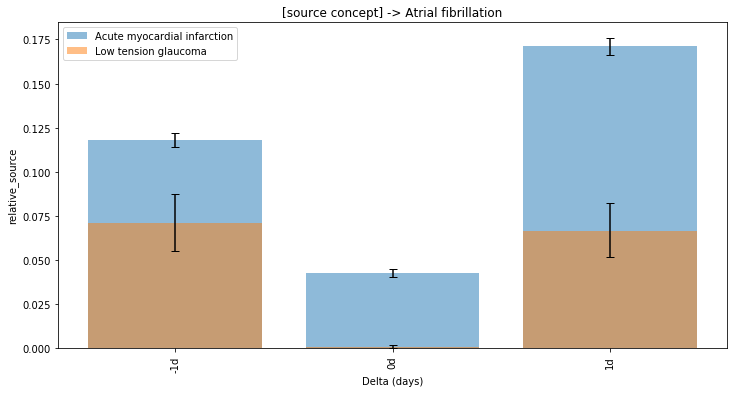

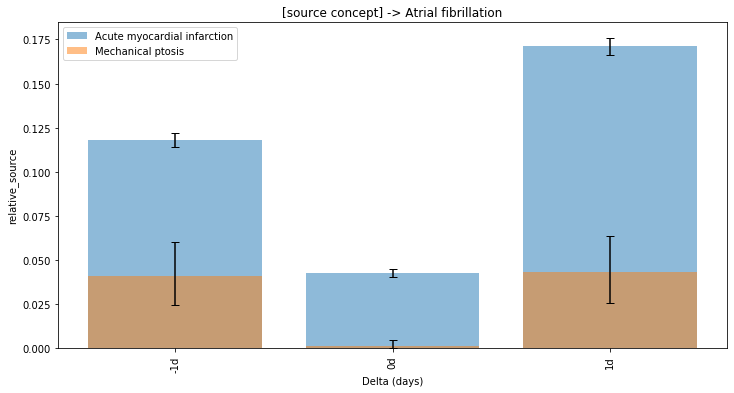

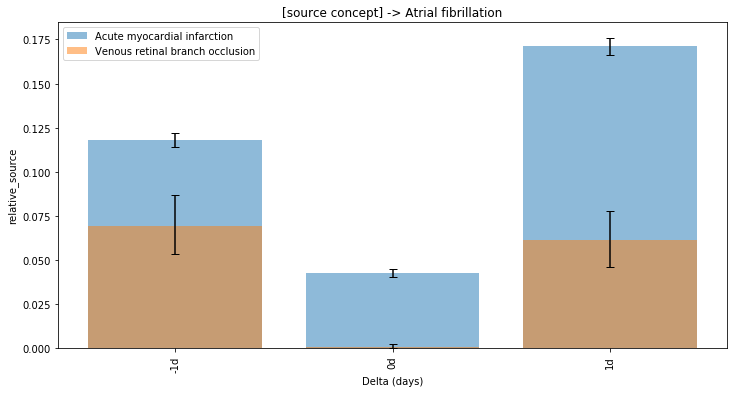

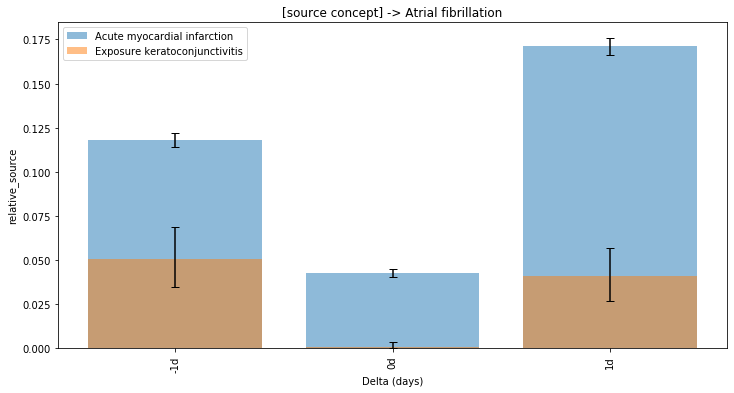

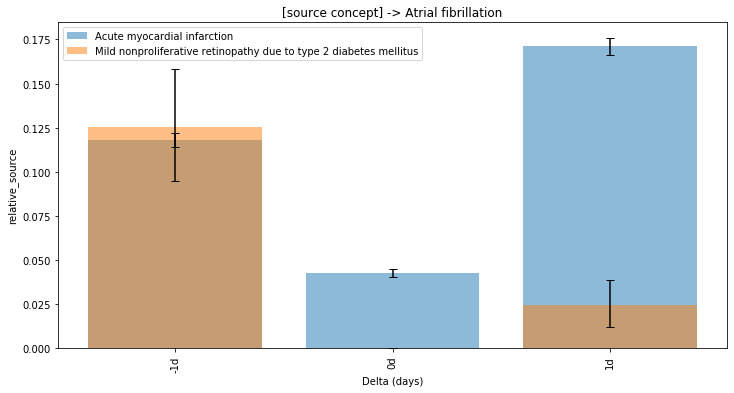

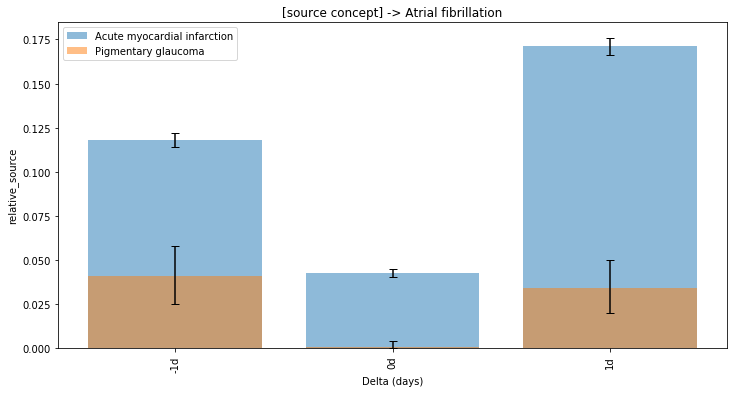

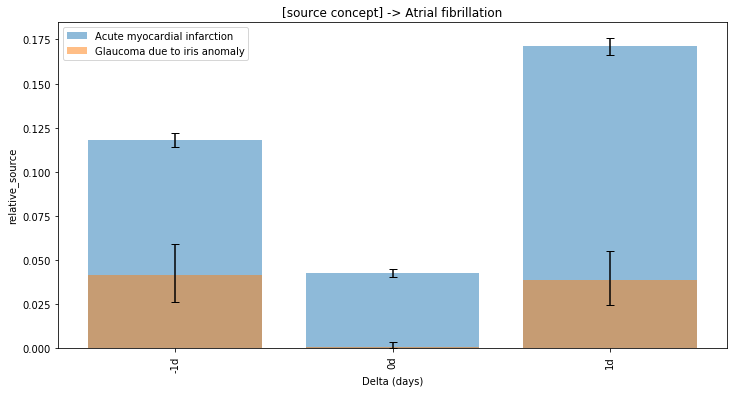

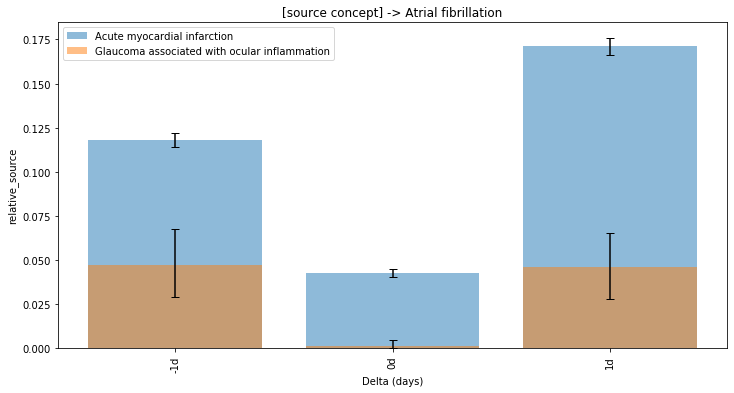

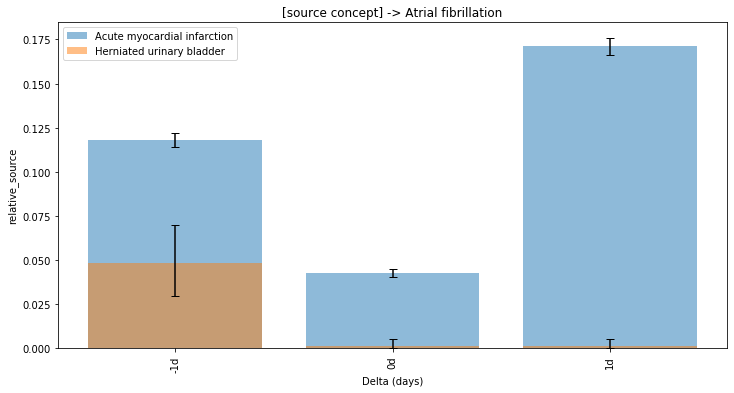

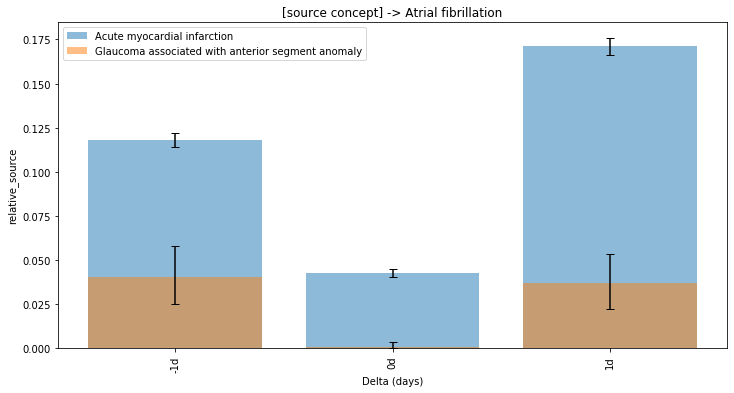

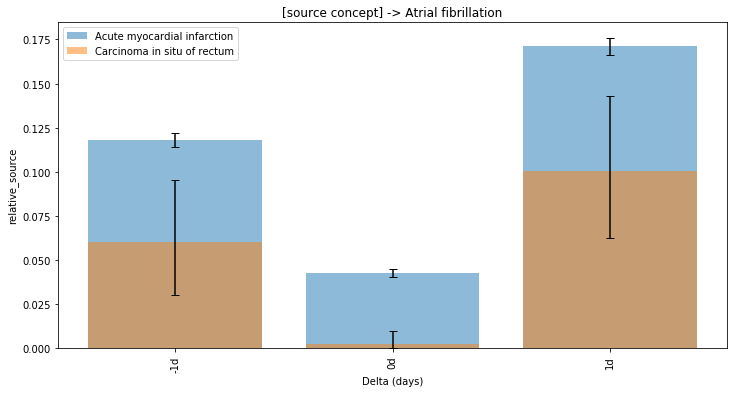

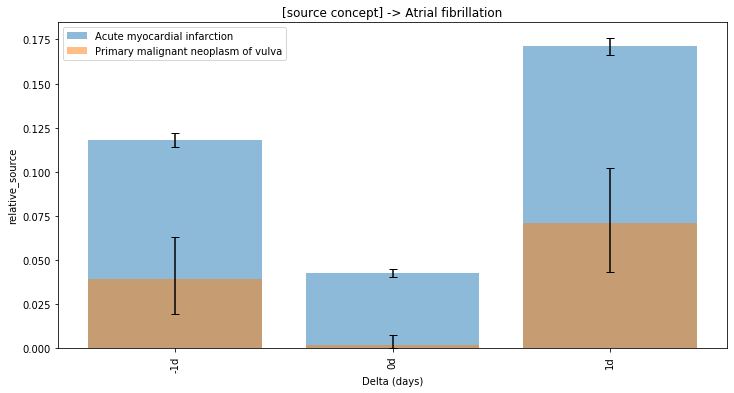

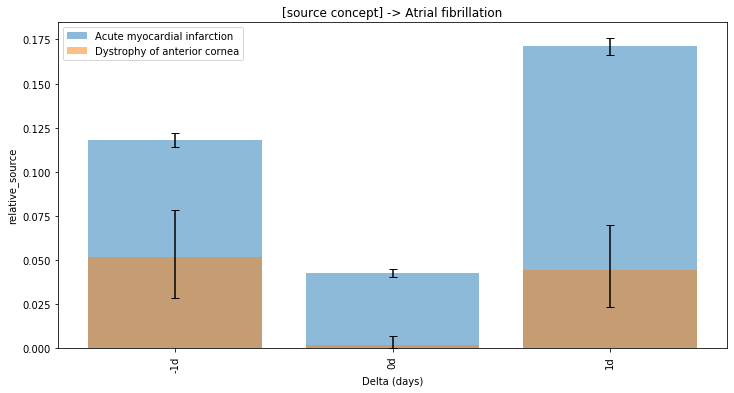

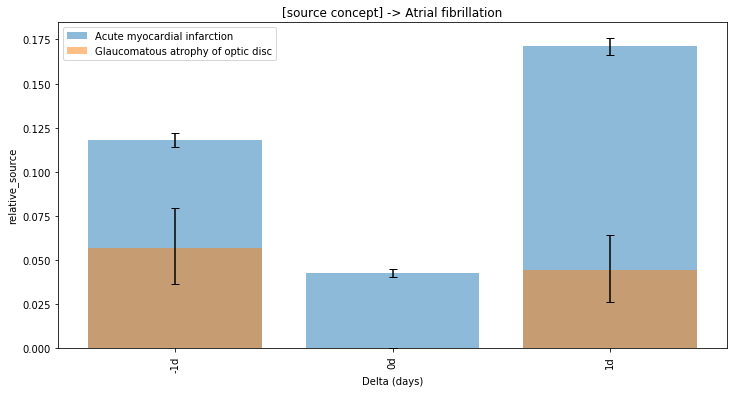

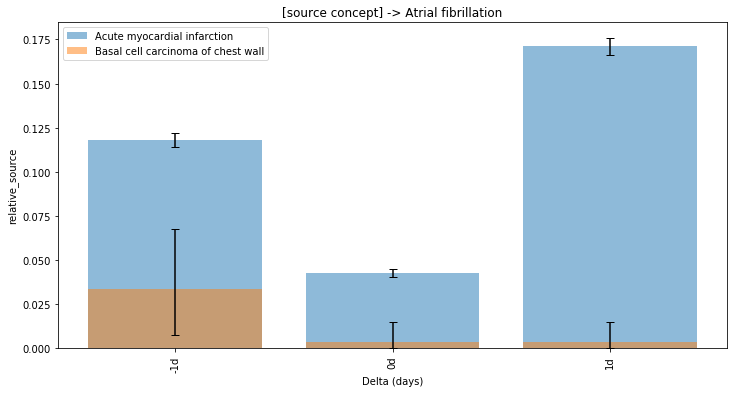

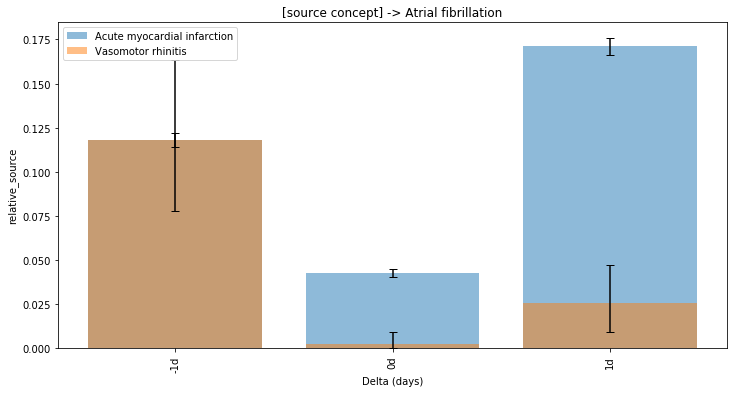

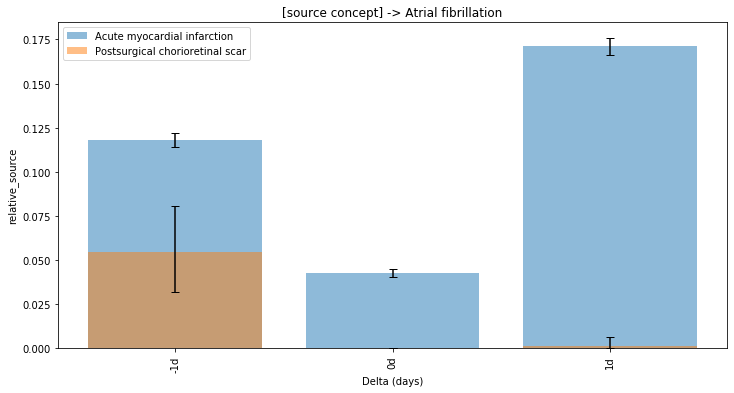

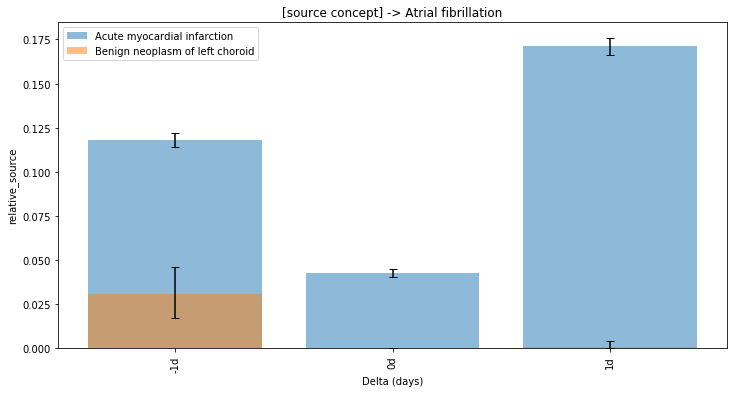

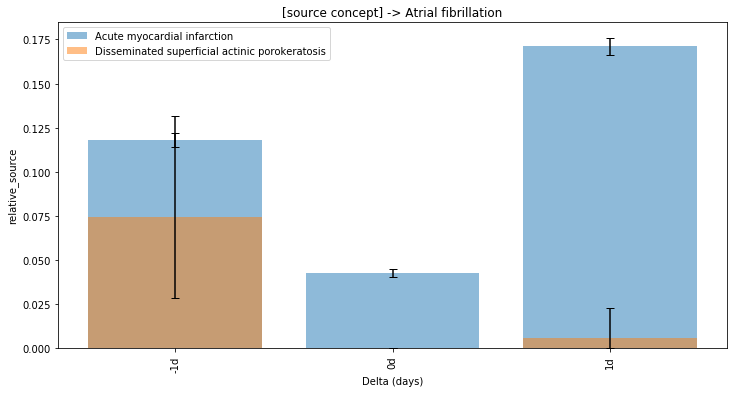

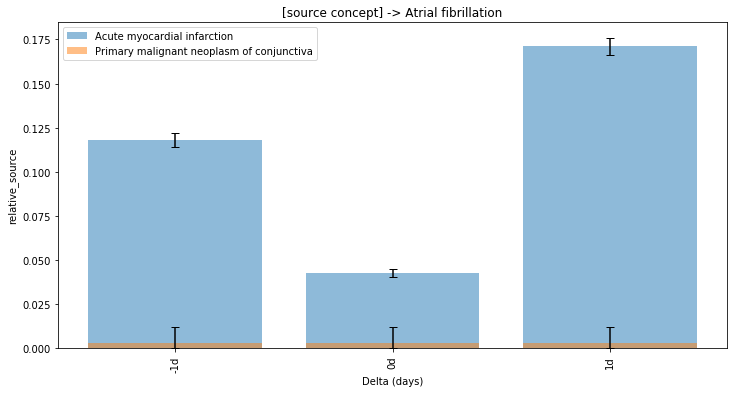

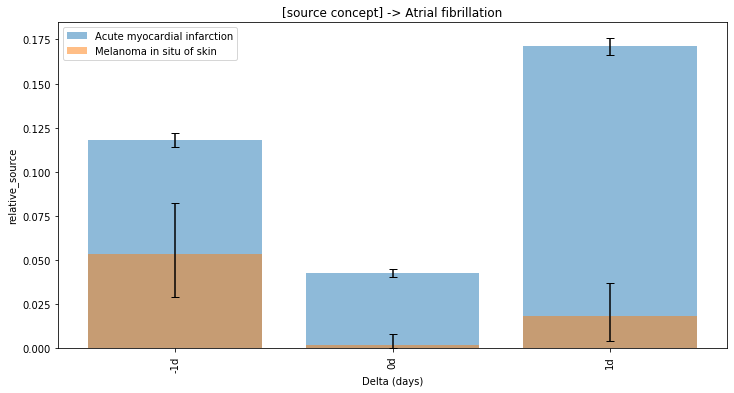

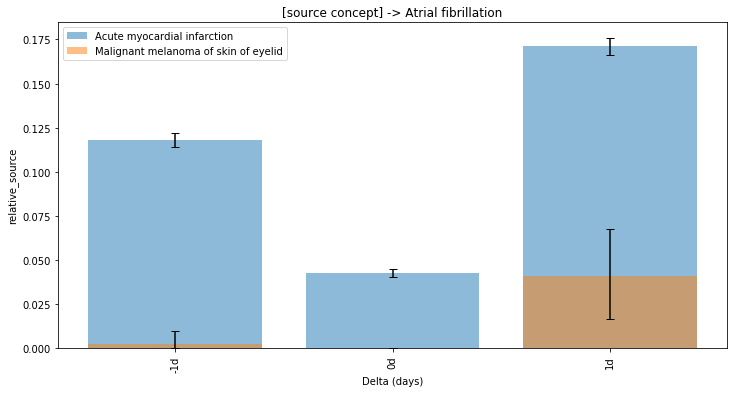

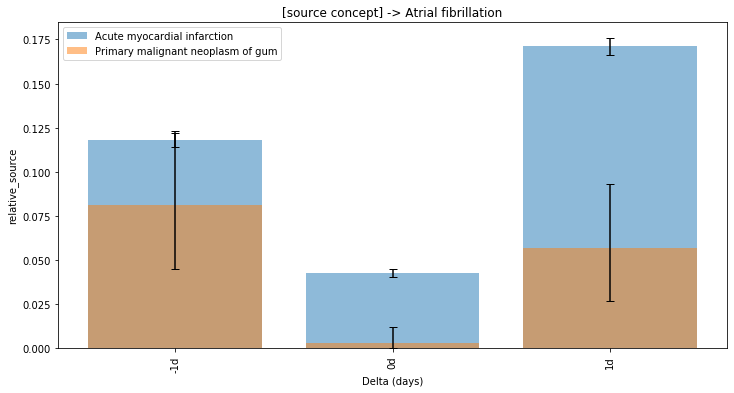

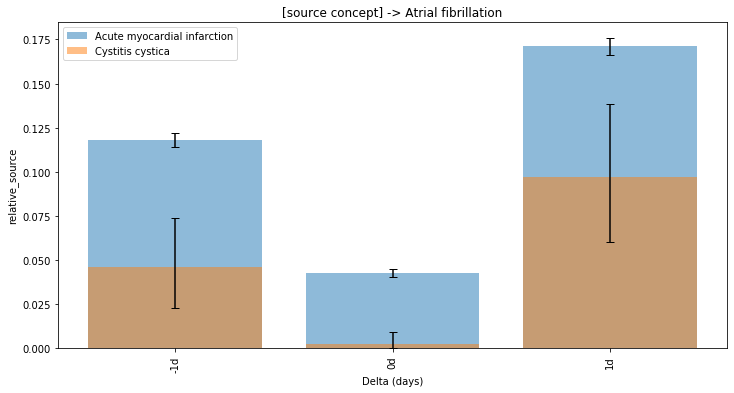

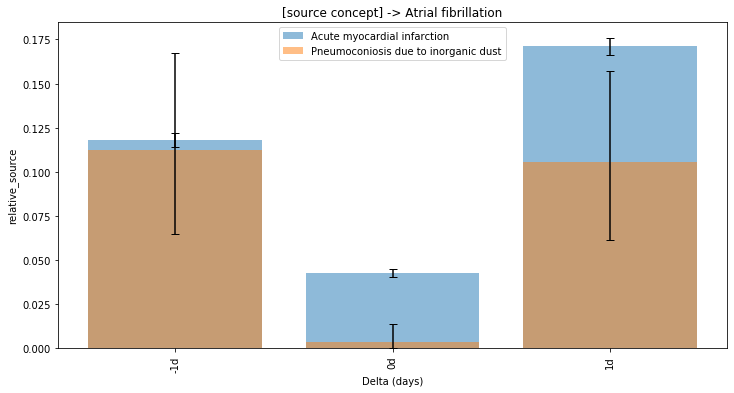

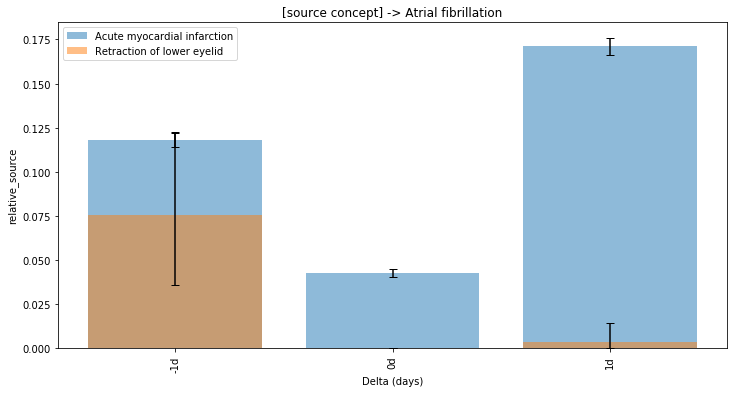

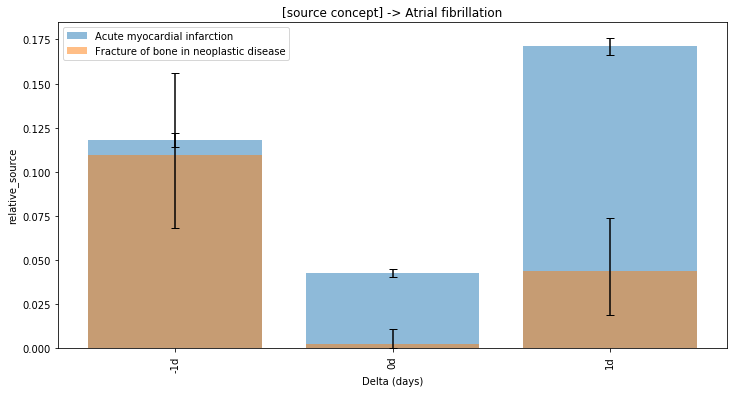

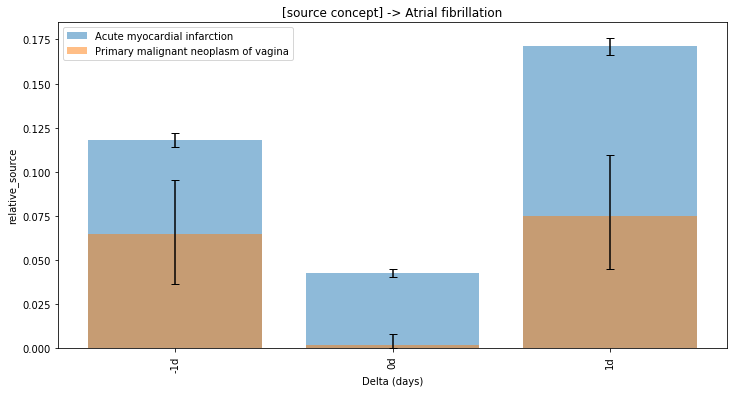

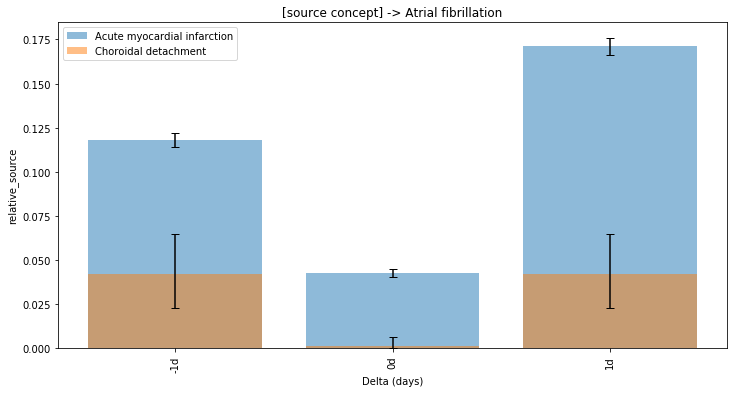

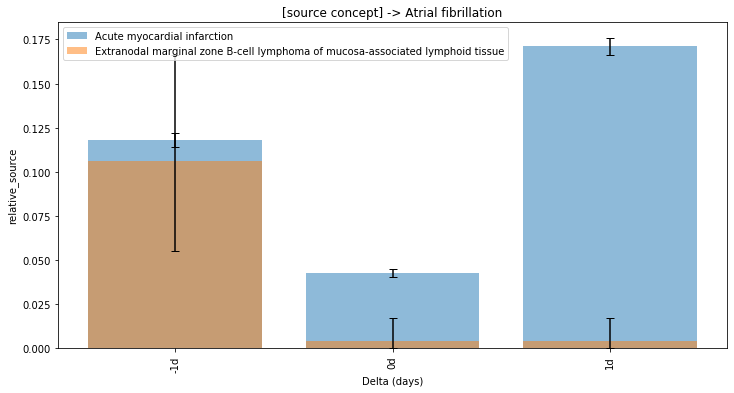

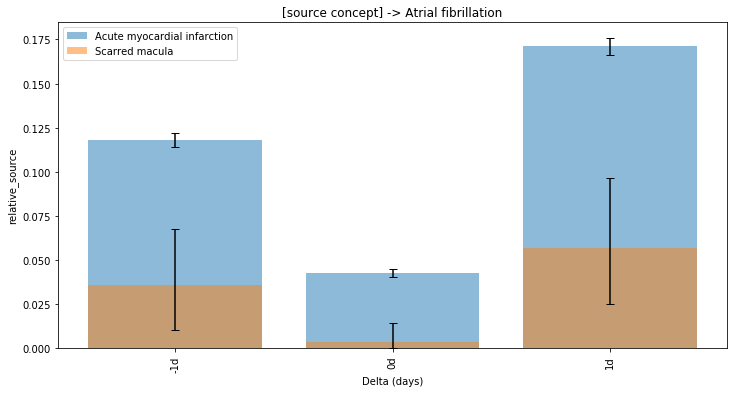

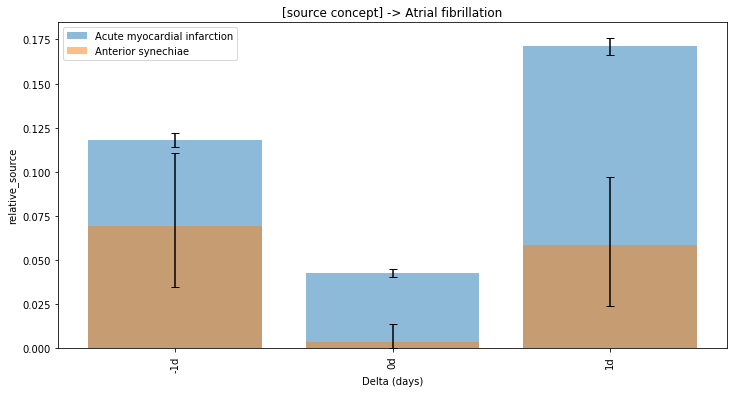

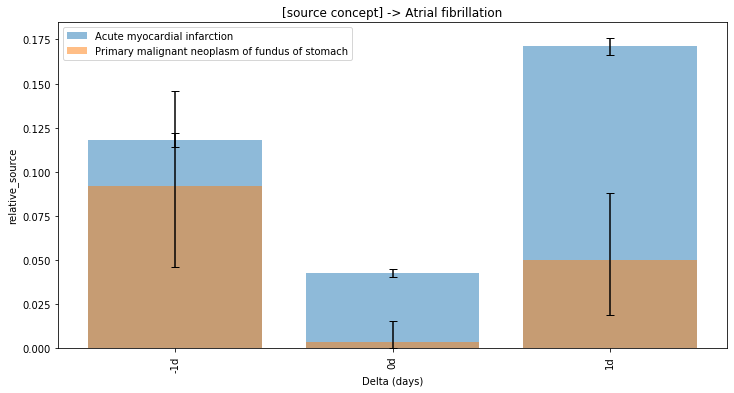

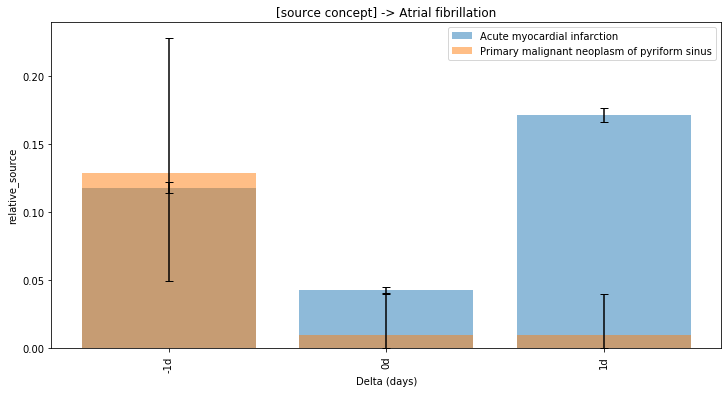

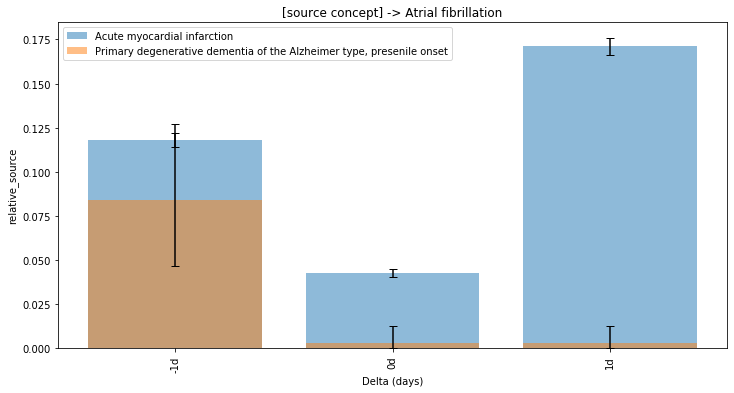

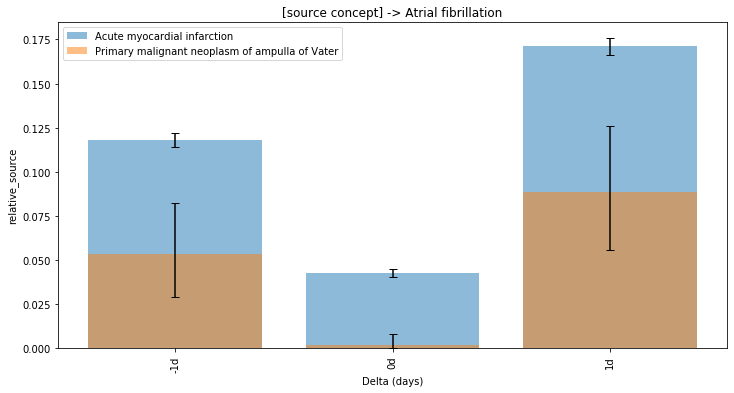

In [16]:
for bin_width in [1, 2, 4, 8, 16]:
    if bin_width not in source_comparison:
        continue
        
    sc_bin = source_comparison[bin_width]
    comparison_deltas = sc_bin[u'deltas']
    if len(comparison_deltas) == 0:
        continue
        
    delta_primary = queried_pair[bin_width]
    
    for comparison_delta in comparison_deltas:
        # Plot each comparison concept against the delta
        plt.figure(figsize=(12,6))
        plot_delta(delta_primary, alpha=0.5, mode='relative_source', show_error_bars=True, show_plot=False)
        plot_delta(comparison_delta, alpha=0.5, mode='relative_source', show_error_bars=True, show_plot=False)
        plt.legend([delta_primary.source_concept_name, comparison_delta.source_concept_name])
        plt.title(f'[source concept] -> {delta_primary.target_concept_name}')
        plt.show()

### Compare the target concept with similar concepts

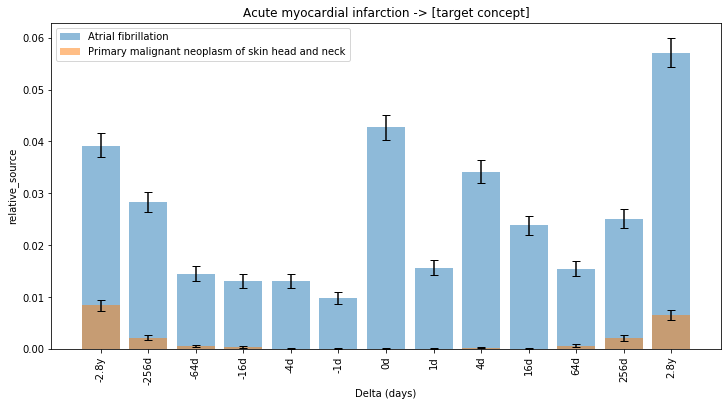

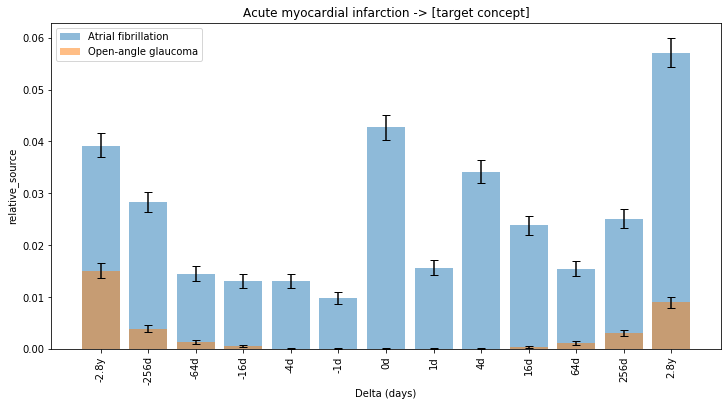

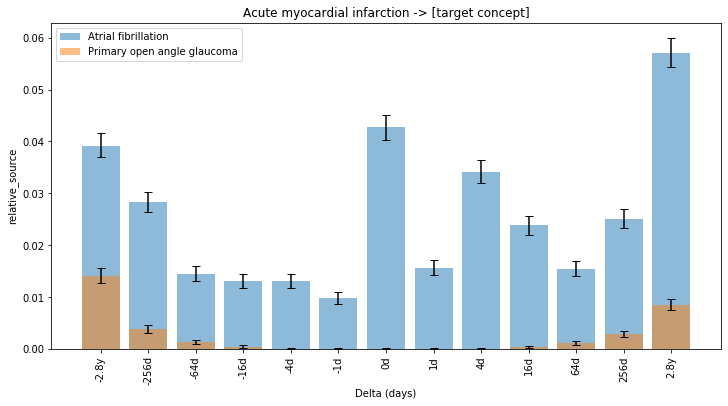

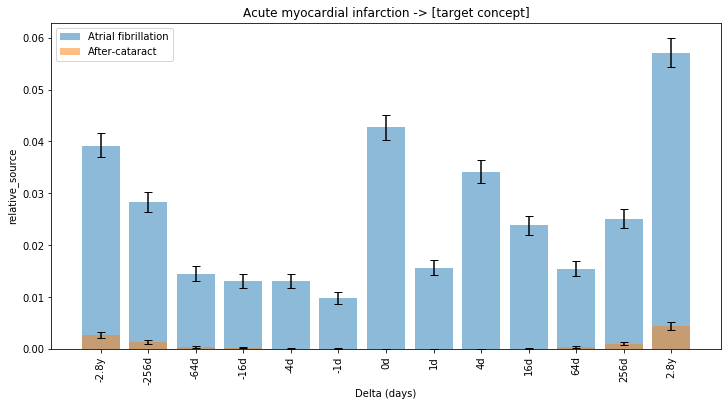

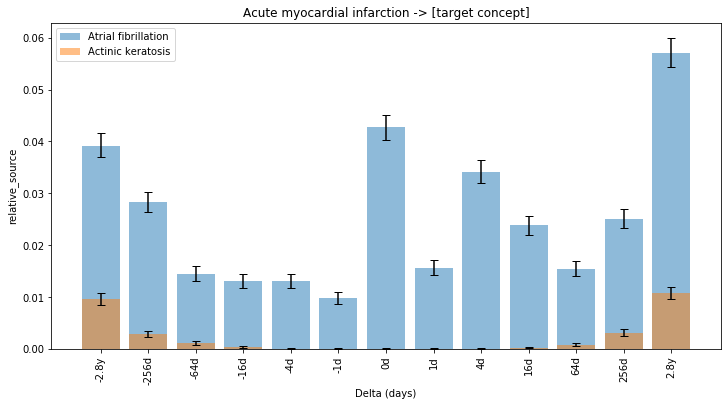

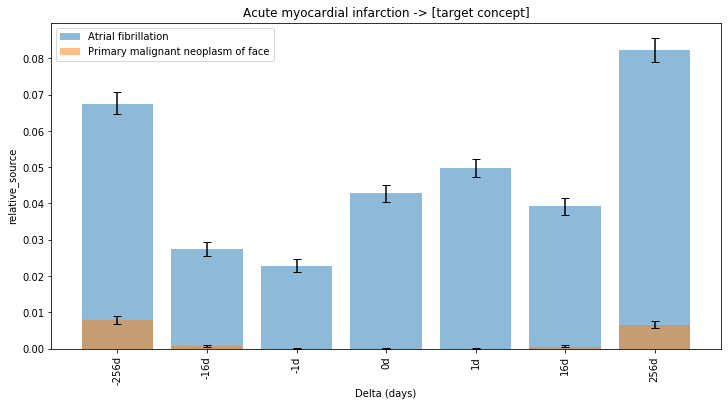

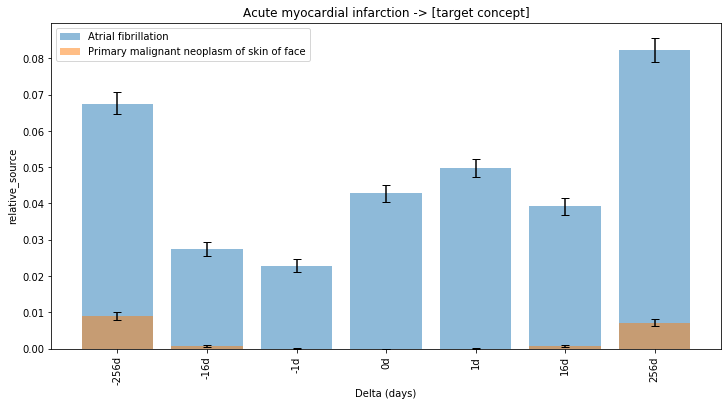

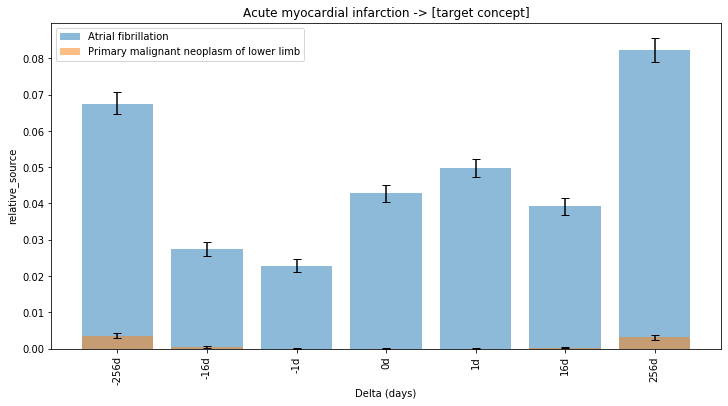

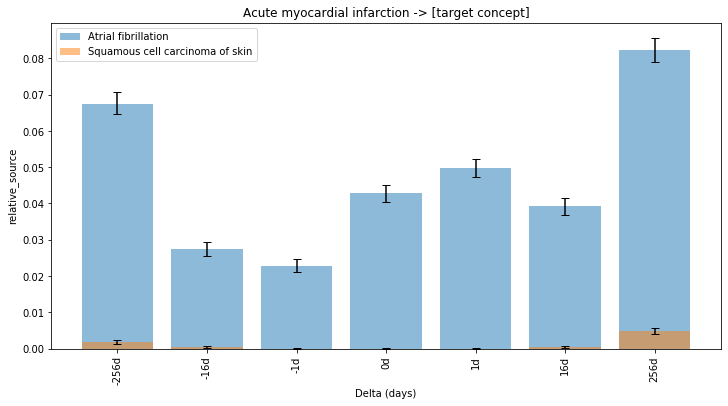

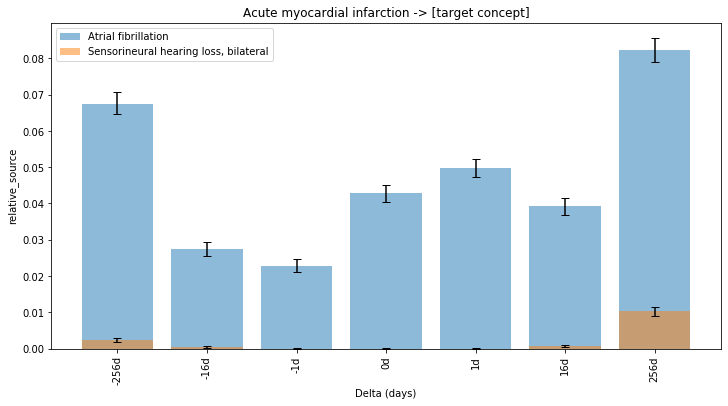

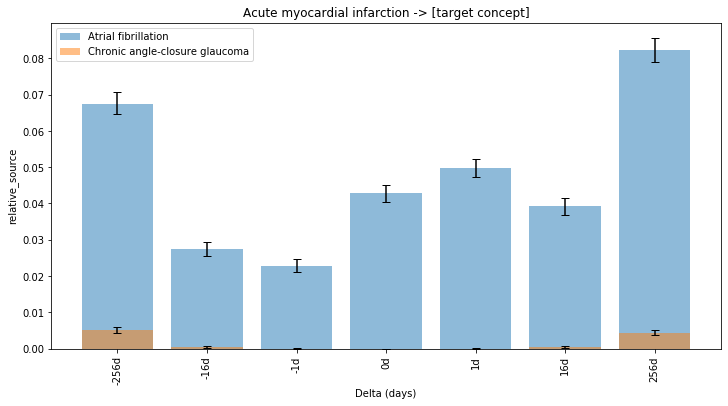

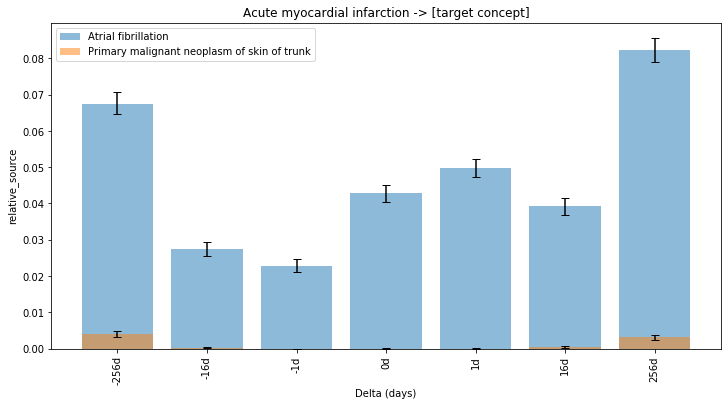

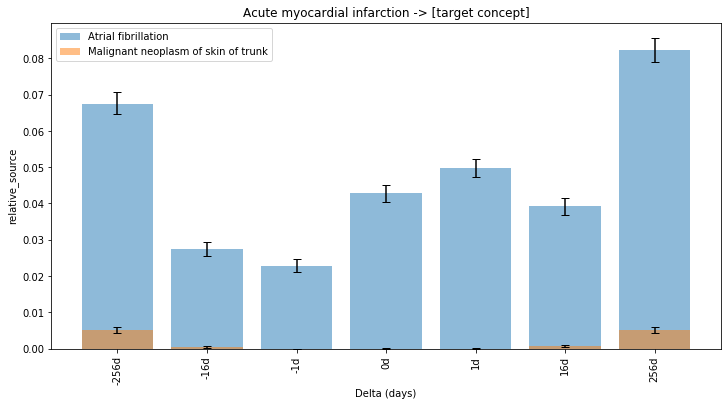

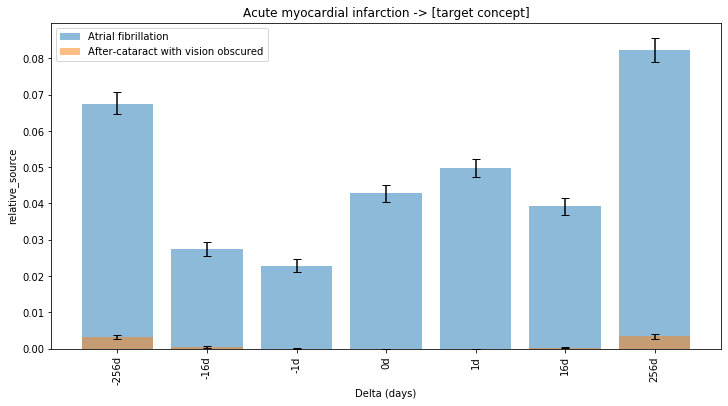

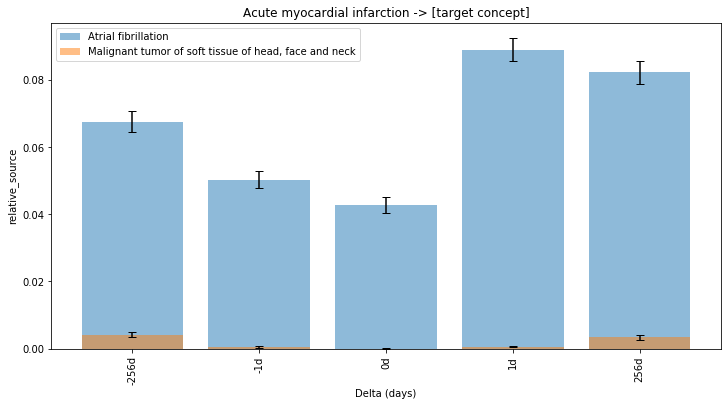

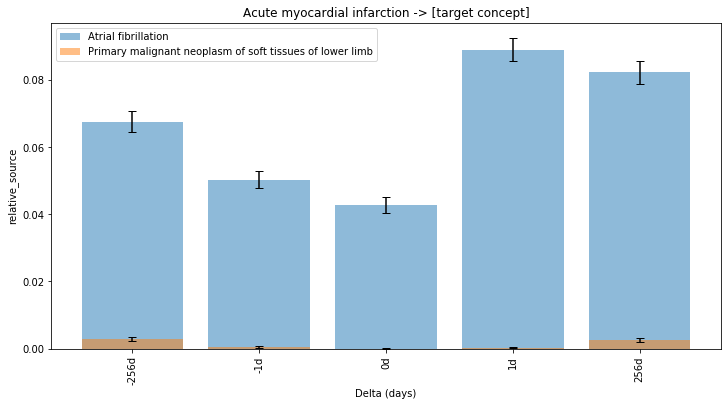

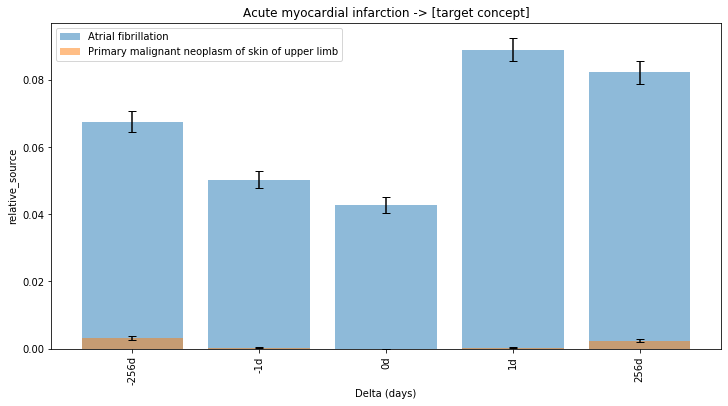

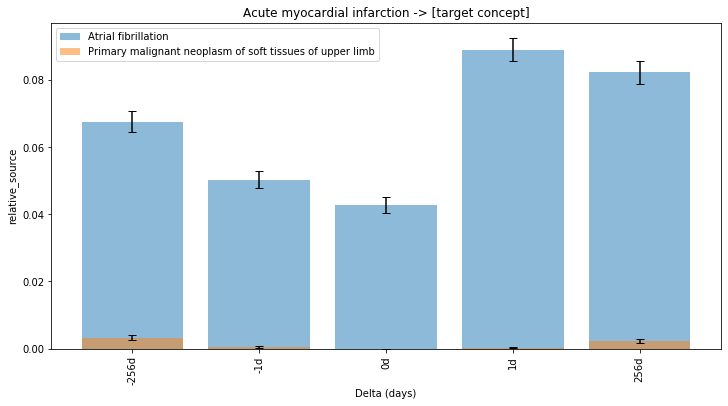

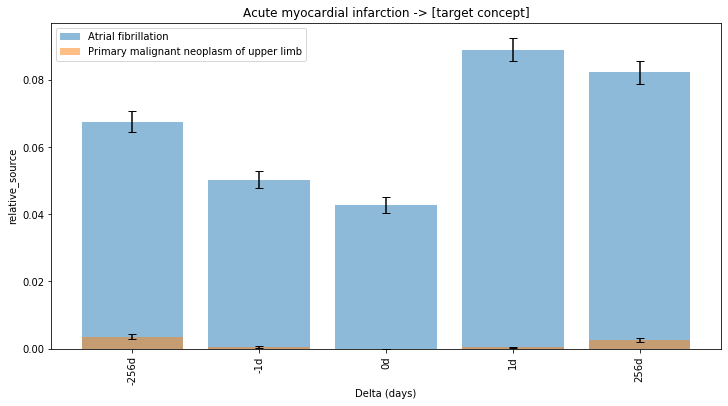

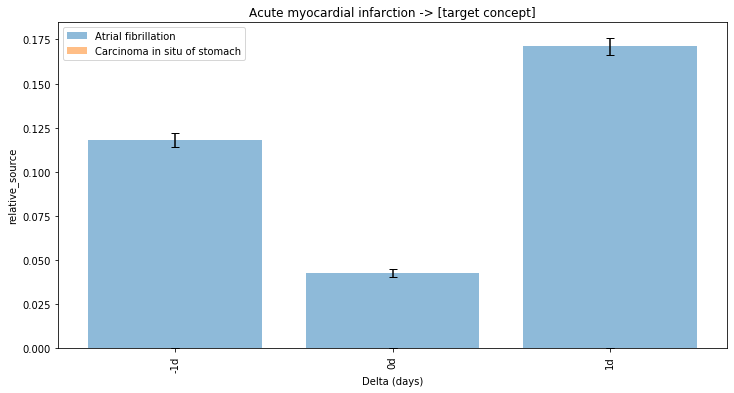

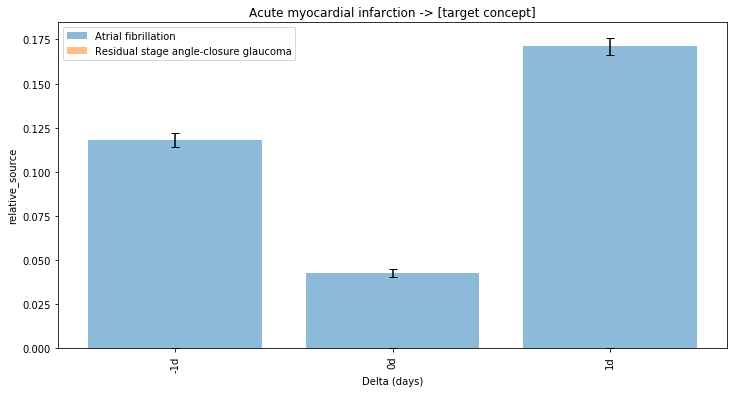

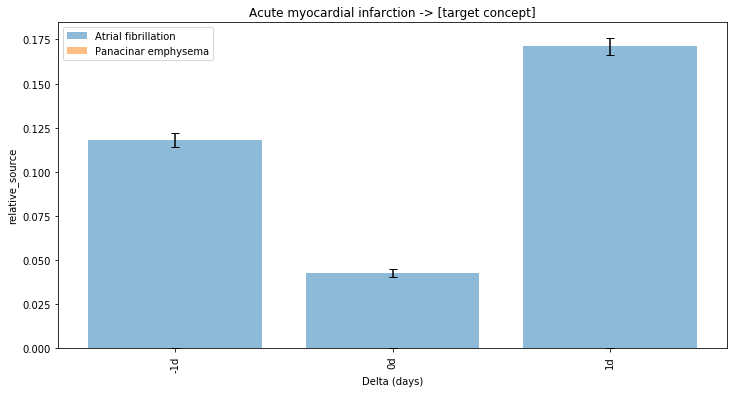

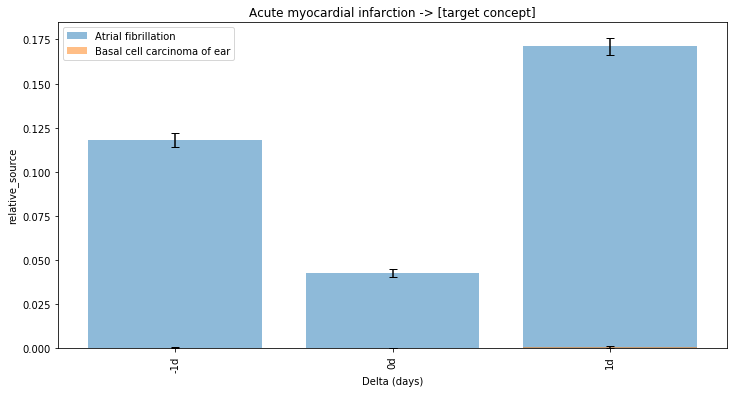

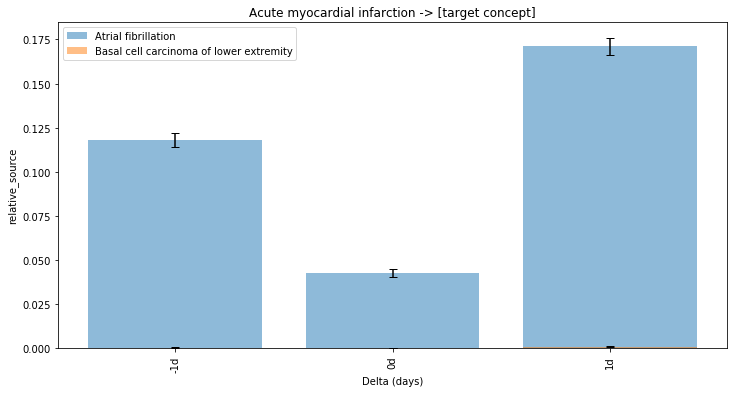

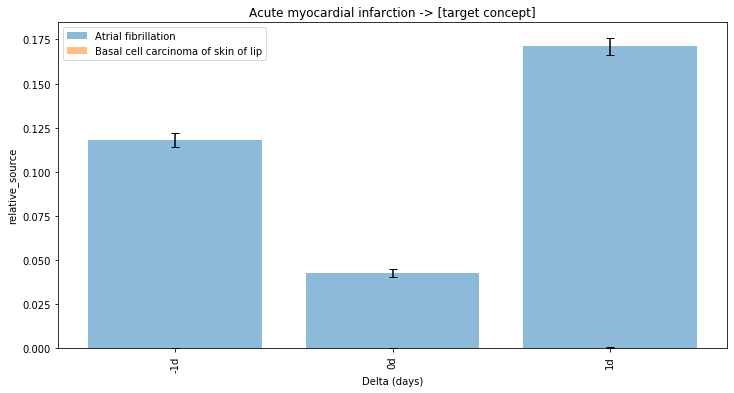

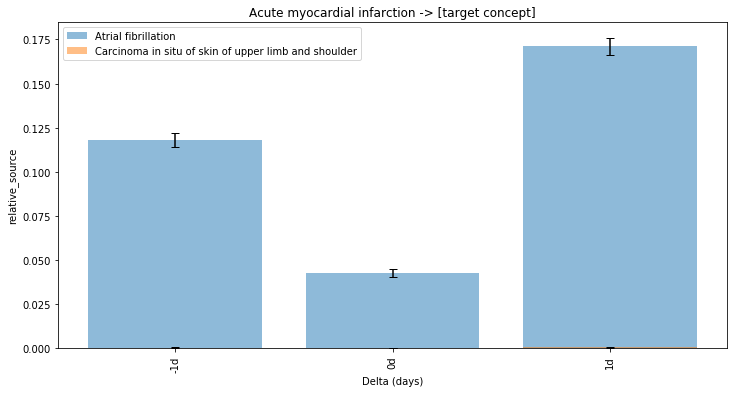

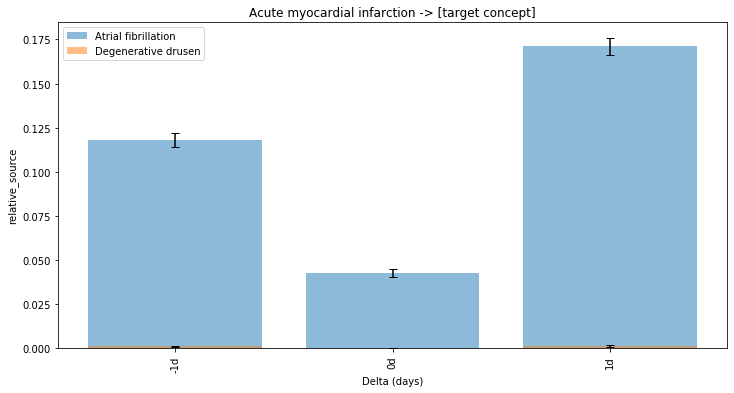

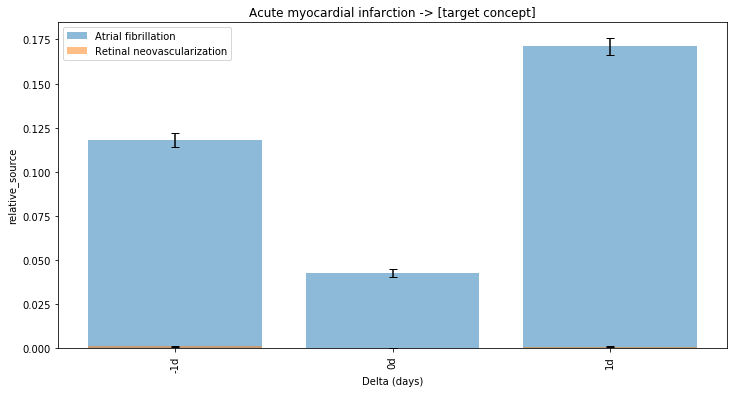

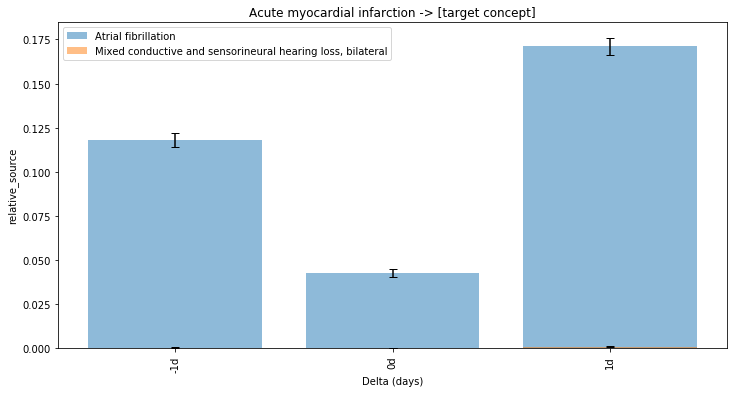

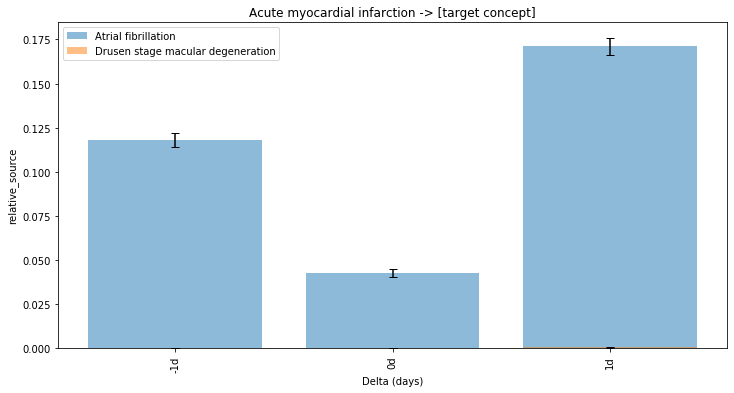

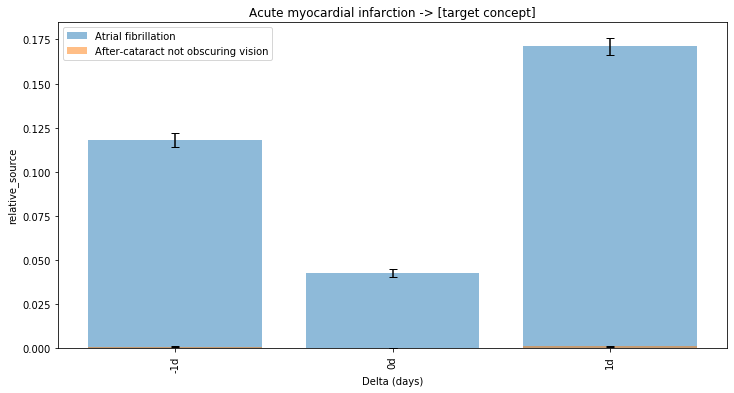

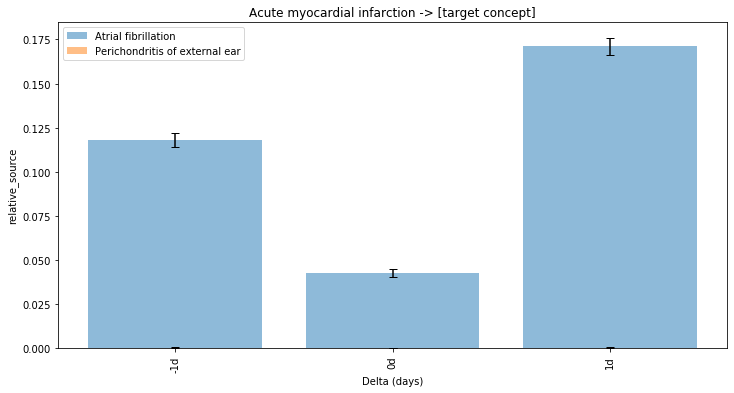

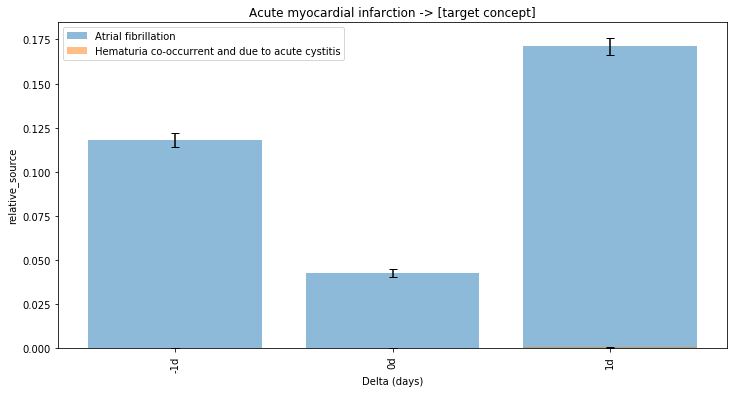

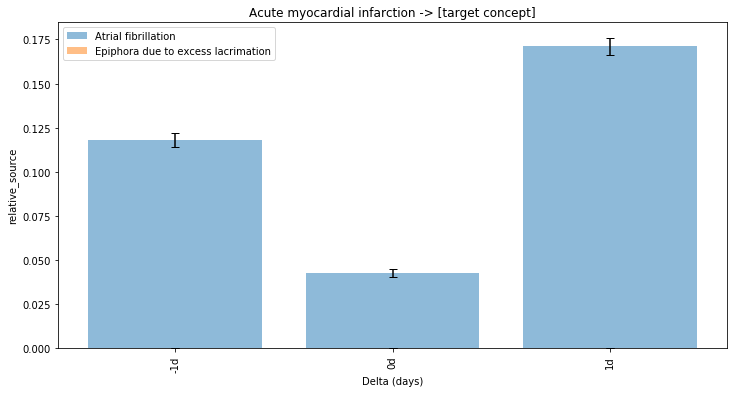

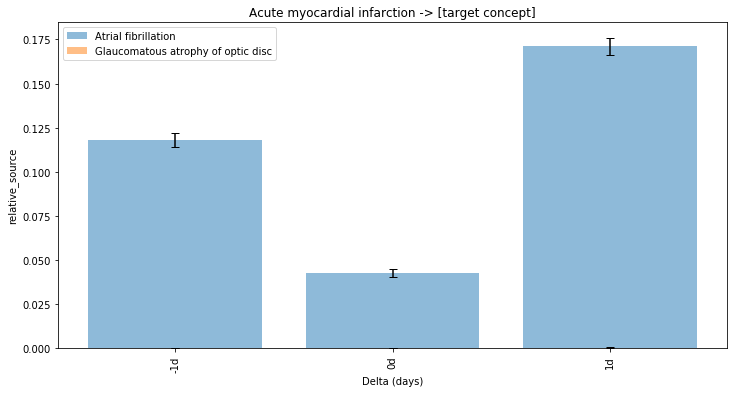

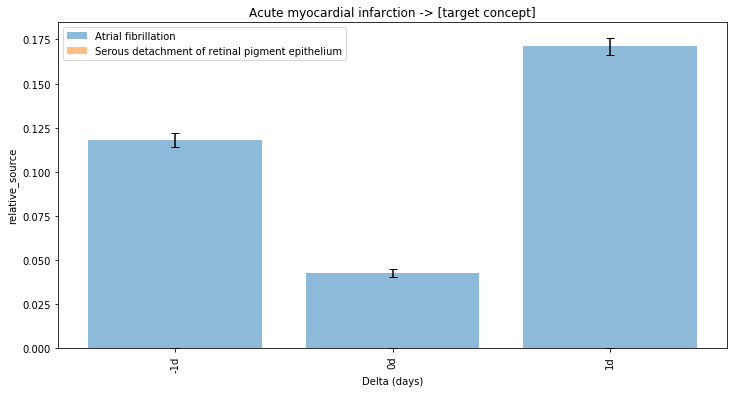

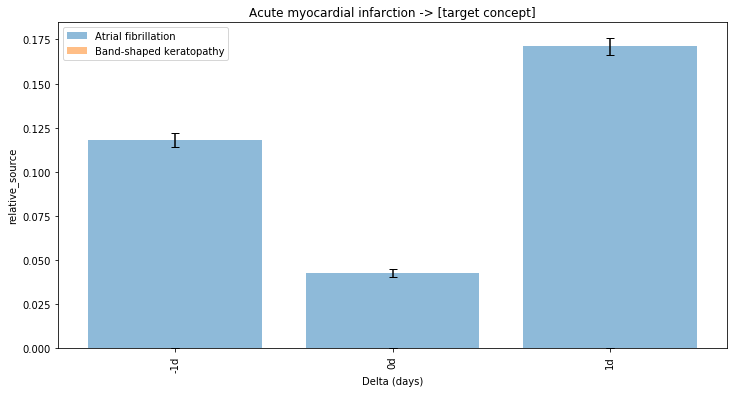

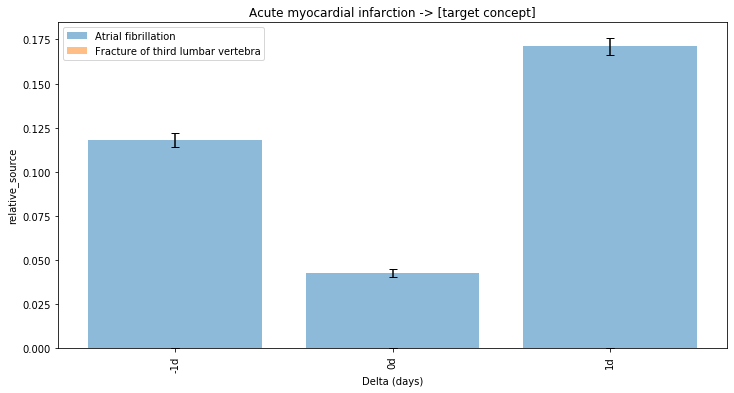

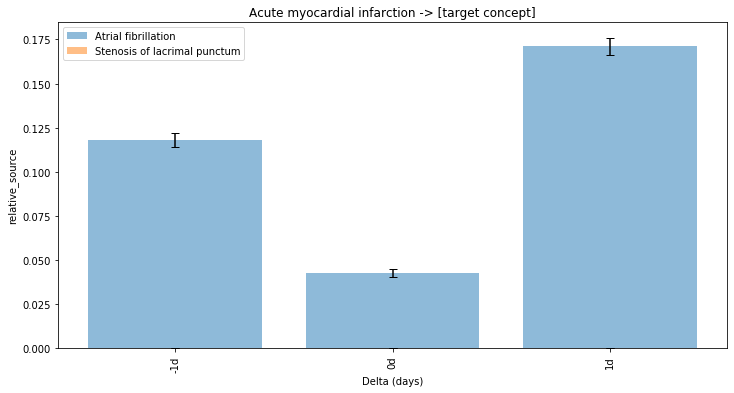

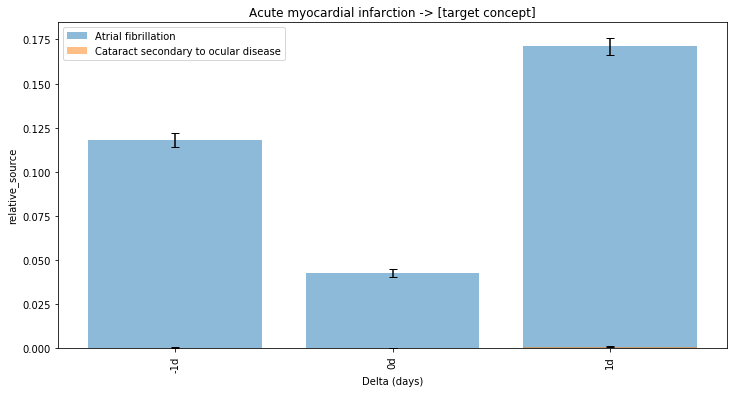

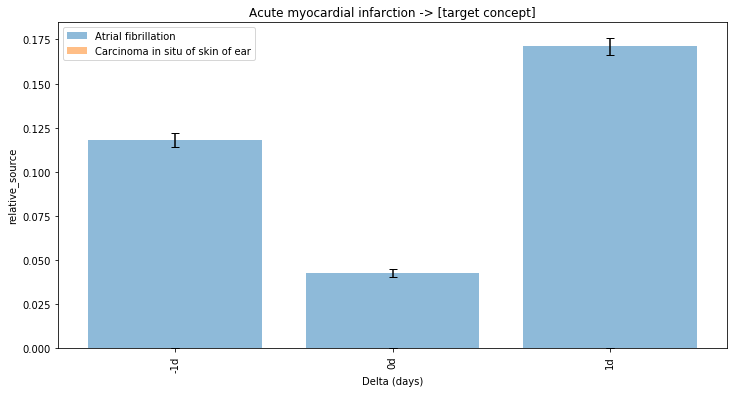

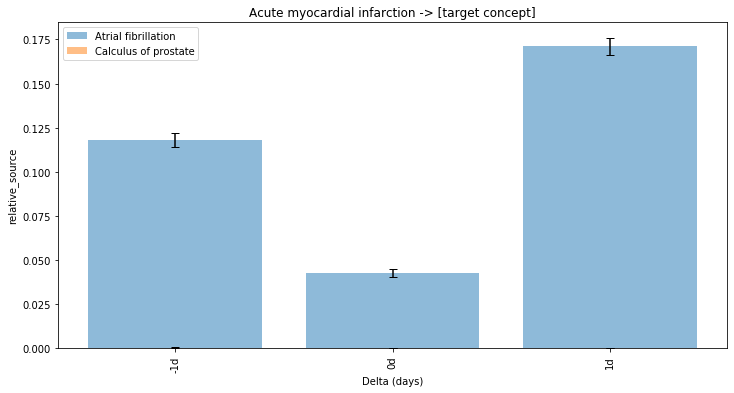

In [17]:
for bin_width in [1, 2, 4, 8, 16]:
    if bin_width not in target_comparison:
        continue
        
    tc_bin = target_comparison[bin_width]
    comparison_deltas = tc_bin[u'deltas']
    if len(comparison_deltas) == 0:
        continue
        
    delta_primary = queried_pair[bin_width]
    
    for comparison_delta in comparison_deltas:
        # Plot each comparison concept against the delta
        plt.figure(figsize=(12,6))
        plot_delta(delta_primary, alpha=0.5, mode='relative_source', show_error_bars=True, show_plot=False)
        plot_delta(comparison_delta, alpha=0.5, mode='relative_source', show_error_bars=True, show_plot=False)
        plt.legend([delta_primary.target_concept_name, comparison_delta.target_concept_name])
        plt.title(f'{delta_primary.source_concept_name} -> [target concept]')
        plt.show()


### Show the analysis from the combined results

1: Showing comparison distribution results from 7 comparison deltas.


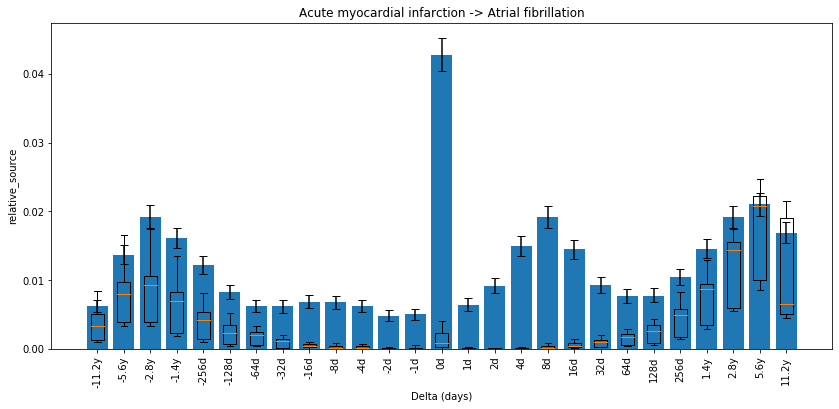

-11.2y  -5.6y -2.8y -1.4y -256d -128d  -64d  -32d  -16d   -8d  ...    8d  \
0  False  False  True  True  True  True  True  True  True  True  ...  True   

    16d   32d   64d  128d  256d  1.4y  2.8y   5.6y  11.2y  
0  True  True  True  True  True  True  True  False  False  

[1 rows x 27 columns]

2: Showing comparison distribution results from 12 comparison deltas.


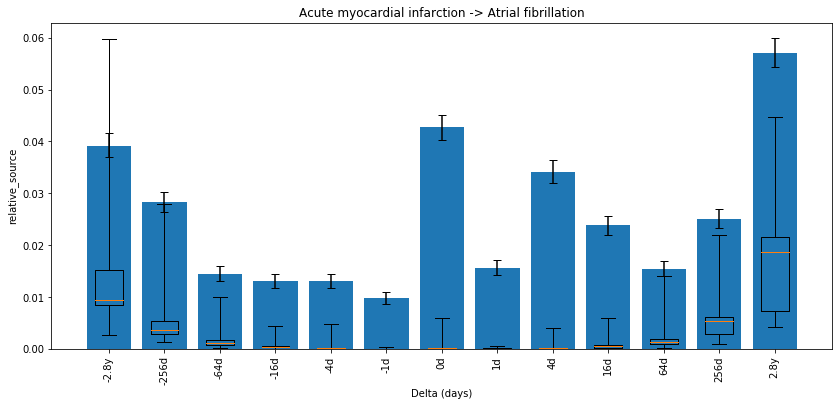

-2.8y  -256d  -64d  -16d   -4d   -1d    0d    1d    4d   16d    64d  256d  \
0  False  False  True  True  True  True  True  True  True  True  False  True   

   2.8y  
0  True

4: Showing comparison distribution results from 24 comparison deltas.


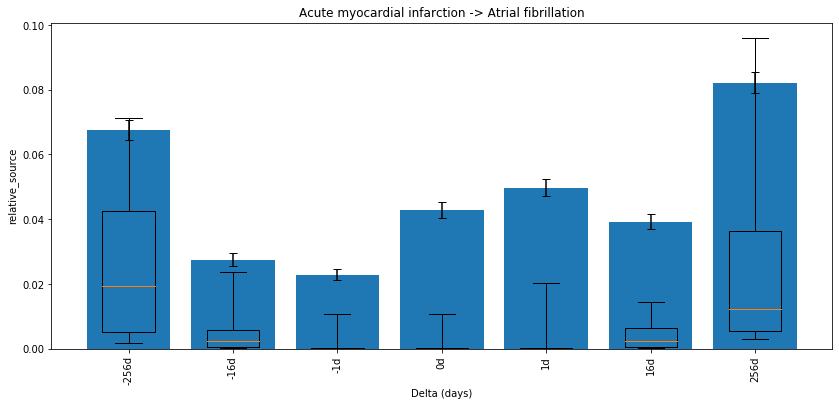

-256d  -16d   -1d    0d    1d   16d   256d
0  False  True  True  True  True  True  False

8: Showing comparison distribution results from 28 comparison deltas.


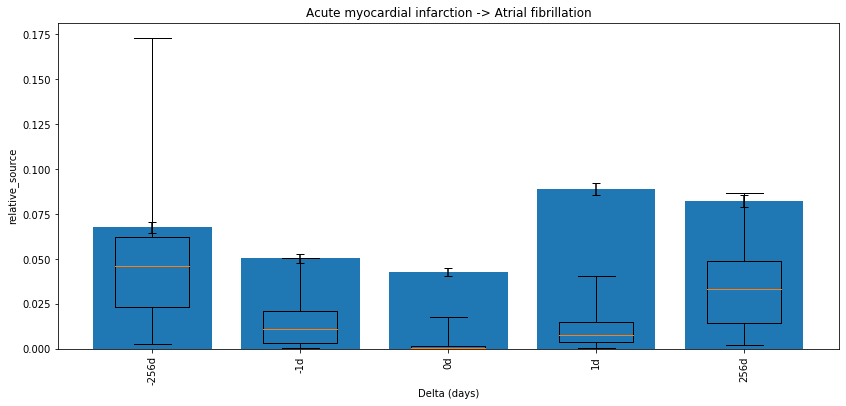

-256d    -1d    0d    1d   256d
0  False  False  True  True  False

16: Showing comparison distribution results from 87 comparison deltas.


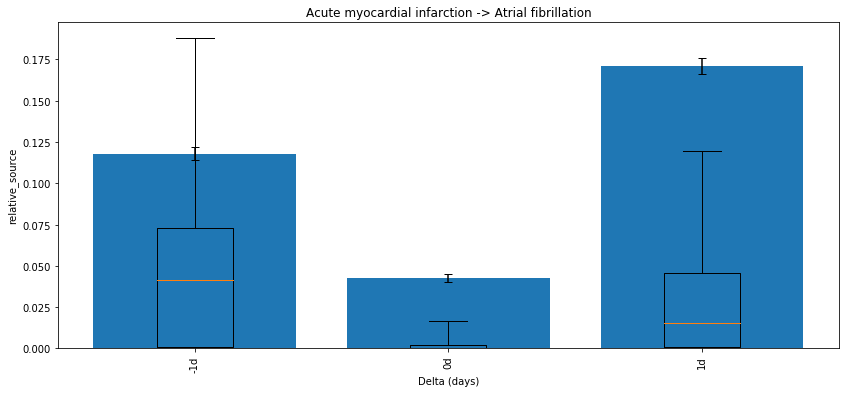

-1d    0d    1d
0  False  True  True

In [18]:
for bin_width in [1, 2, 4, 8, 16]:
    if bin_width not in queried_pair or bin_width not in combined_comparison:
        print(f'{bin_width}: No delta counts between the queried source and target concepts at bin_width={bin_width}')
        continue
            
    # Plot the queried concept pair's delta
    plt.figure(figsize=(14, 6))
    delta = queried_pair[bin_width]
    plot_delta(queried_pair[bin_width], mode='relative_source', show_error_bars=True, show_plot=False)

    # Plot distributions of the combined results
    distribution = combined_comparison[bin_width][u'distribution']
    if distribution is None or len(distribution) == 0:
        print(f'{bin_width}: Not enough data to create a comparison distribution (< 5 comparison deltas)')
        continue
        
    n_comparisons = len(source_comparison[bin_width][u'deltas']) if bin_width in source_comparison else 0
    n_comparisons += len(target_comparison[bin_width][u'deltas']) if bin_width in target_comparison else 0
    print(f'{bin_width}: Showing comparison distribution results from {n_comparisons} comparison deltas.')
        
    # Create a boxplot showing the median, IQR, and 95% CI
    stats = [{
        "whislo": d[0],  
        "q1": d[1],
        "med": d[2],        
        "q3": d[3],        
        "whishi": d[4],  
        } for d in distribution.T]
    plt.gca().bxp(stats, showfliers=False, positions=delta.x(), manage_ticks=False)
    plt.show()
    
    df = pd.DataFrame(columns=delta.bin_labels_mixed())
    df.loc[0] = combined_comparison[bin_width][u'significance']
    display(df)

# Translator

## Translator Reasoner Standard API

In [4]:
query_response = translator_query(
    node_1_curie="DOID:9053",
    node_2_type="biolink:Drug",
    max_results=10,
    dataset_id=3,
    confidence_interval=0.99,
    min_cooccurrence=50,
    threshold=0.5,
    local_oxo=True,
    ontology_targets={
      'biolink:Disease': ['MONDO', 'DOID', 'OMIM', 'ORPHANET', 'ORPHA', 'EFO', 'UMLS', 'MESH', 'MEDDRA', 'NCIT', 'SNOMEDCT', 'medgen', 'ICD10', 'ICD9', 'ICD0', 'HP', 'MP'],
      'biolink:Drug': ['RxNorm'],
      'biolink:Procedure': ['ICD10PCS', 'SNOMEDCT'],
      '_DEFAULT': []
    }
)
display(query_response)

{'code_description': '10 result(s) found',
 'context': 'https://biolink.github.io/biolink-model/context.jsonld',
 'datetime': '2020-09-22 14:57:14',
 'knowledge_graph': {'edges': [{'attributes': [{'name': 'confidence_interval',
      'source': 'COHD',
      'type': 'EDAM:data_0951',
      'value': [3.959550079368646, 4.687788579739862]},
     {'name': 'dataset_id',
      'source': 'COHD',
      'type': 'EDAM:data_1048',
      'value': 3},
     {'name': 'expected_count',
      'source': 'COHD',
      'type': 'EDAM:operation_3438',
      'value': 1.0680148141475803},
     {'name': 'ln_ratio',
      'source': 'COHD',
      'type': 'EDAM:data_1772',
      'value': 4.365015187476811},
     {'name': 'observed_count',
      'source': 'COHD',
      'type': 'EDAM:data_0006',
      'value': 84}],
    'id': 'ke000000',
    'source_id': 'OMOP:192855',
    'target_id': 'OMOP:40166448',
    'type': 'association'},
   {'attributes': [{'name': 'confidence_interval',
      'source': 'COHD',
      'type